In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d jl8771/2022-us-airlines-domestic-departure-data

Dataset URL: https://www.kaggle.com/datasets/jl8771/2022-us-airlines-domestic-departure-data
License(s): CC0-1.0
 99% 297M/299M [00:16<00:00, 26.5MB/s]
100% 299M/299M [00:16<00:00, 19.4MB/s]


In [9]:
!unzip 2022-us-airlines-domestic-departure-data.zip

Archive:  2022-us-airlines-domestic-departure-data.zip
  inflating: ActiveWeather.csv       
  inflating: Cancellation.csv        
  inflating: Carriers.csv            
  inflating: CompleteData.csv        
  inflating: Stations.csv            


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
Whether_data = pd.read_csv("ActiveWeather.csv")
Whether_data

STATUS                                WEATHER_DESCRIPTION
0       0                          No weather events present
1       1                           Weather event(s) present
2       2  Significant weather event(s) present (Volcanic...

In [12]:
Whether_data['WEATHER_DESCRIPTION'].unique()

array(['No weather events present', 'Weather event(s) present',
       'Significant weather event(s) present (Volcanic ash, Thunderstorm, Dust/sandstorm, Tornado, Freezing Precipitation)'],
      dtype=object)

In [13]:
Cancellation_data=pd.read_csv("Cancellation.csv")
Cancellation_data.head()

STATUS               CANCELLATION_REASON
0       0                     Not Cancelled
1       1              Carrier Cancellation
2       2              Weather Cancellation
3       3  National Air System Cancellation
4       4             Security Cancellation

In [14]:
Carriers_data=pd.read_csv("Carriers.csv")
Carriers_data.head()

CODE                    DESCRIPTION
0   9E              Endeavor Air Inc.
1   AA         American Airlines Inc.
2   AS           Alaska Airlines Inc.
3   B6                JetBlue Airways
4   C5  CommuteAir LLC dba CommuteAir

In [15]:
Stations_data=pd.read_csv("Stations.csv")
Stations_data.head()

AIRPORT_ID AIRPORT                 DISPLAY_AIRPORT_NAME  \
0       14256     PSG           Petersburg James A Johnson   
1       10299     ANC  Ted Stevens Anchorage International   
2       12819     KTN              Ketchikan International   
3       13873     OME                         Nome Airport   
4       10551     BET                       Bethel Airport   

  DISPLAY_AIRPORT_CITY_NAME_FULL AIRPORT_STATE_NAME AIRPORT_STATE_CODE  \
0                 Petersburg, AK             Alaska                 AK   
1                  Anchorage, AK             Alaska                 AK   
2                  Ketchikan, AK             Alaska                 AK   
3                       Nome, AK             Alaska                 AK   
4                     Bethel, AK             Alaska                 AK   

    LATITUDE  LONGITUDE  ELEVATION  ICAO IATA  FAA MESONET_STATION  
0  56.801388 -132.94610        111  PAPG  PSG  PSG            PAPG  
1  61.174168 -149.99806        152  PANC  ANC  ANC            PANC  
2  55.354168 -131.71110         89  PAKT  KTN  KTN            PAKT  
3  64.510560 -165.44472         37  PAOM  OME  OME            PAOM  
4  60.778610 -161.83722        126  PABE  BET  BET            PABE

In [16]:
Stations_data['AIRPORT_STATE_NAME'].unique()


array(['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
       'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana',
       'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire',
       'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'U.S. Pacific Trust Territories and Possessions', 'Texas', 'Utah',
       'Virginia', 'U.S. Virgin Islands', 'Vermont', 'Washington',
       'Wisconsin', 'West Virginia', 'Wyoming'], dtype=object)

In [17]:
data=pd.read_csv("CompleteData.csv")

In [18]:
data.head()

FL_DATE  DEP_HOUR MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM  \
0  2022-01-01         6                 AA                   1   
1  2022-01-01         8                 AA                  10   
2  2022-01-01         0                 AA                1003   
3  2022-01-01         9                 AA                1004   
4  2022-01-01        23                 AA                1007   

  OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM TAIL_NUM ORIGIN DEST  \
0                AA                  1   N106NN    JFK  LAX   
1                AA                 10   N101NN    LAX  JFK   
2                AA               1003   N830NN    STL  ORD   
3                AA               1004   N805NN    ORD  FLL   
4                AA               1007   N870NN    CLT  STL   

              DEP_TIME  ... DEW_POINT  REL_HUMIDITY  ALTIMETER  \
0  2022-01-01 06:57:00  ...      8.89         96.69      29.92   
1  2022-01-01 08:57:00  ...      0.61         44.92      29.87   
2  2022-01-01 00:00:00  ...       NaN           NaN        NaN   
3  2022-01-01 09:37:00  ...      0.61         89.09      29.75   
4  2022-01-01 23:00:00  ...     18.28         89.81      29.79   

   LOWEST_CLOUD_LAYER  N_CLOUD_LAYER  LOW_LEVEL_CLOUD  MID_LEVEL_CLOUD  \
0               300.0            2.0              1.0              0.0   
1              4800.0            1.0              1.0              0.0   
2                 NaN            NaN              NaN              NaN   
3               500.0            1.0              1.0              0.0   
4              1500.0            3.0              1.0              0.0   

   HIGH_LEVEL_CLOUD  CLOUD_COVER ACTIVE_WEATHER  
0               0.0          4.0            0.0  
1               0.0          2.0            0.0  
2               NaN          NaN            NaN  
3               0.0          4.0            1.0  
4               1.0          3.0            0.0  

[5 rows x 40 columns]

In [19]:
data.shape

(6954636, 40)

In [20]:
data.columns

Index(['FL_DATE', 'DEP_HOUR', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'CRS_DEP_TIME', 'TAXI_OUT', 'DEP_DELAY', 'AIR_TIME',
       'DISTANCE', 'CANCELLED', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'MESONET_STATION', 'YEAR OF MANUFACTURE', 'MANUFACTURER', 'ICAO TYPE',
       'RANGE', 'WIDTH', 'WIND_DIR', 'WIND_SPD', 'WIND_GUST', 'VISIBILITY',
       'TEMPERATURE', 'DEW_POINT', 'REL_HUMIDITY', 'ALTIMETER',
       'LOWEST_CLOUD_LAYER', 'N_CLOUD_LAYER', 'LOW_LEVEL_CLOUD',
       'MID_LEVEL_CLOUD', 'HIGH_LEVEL_CLOUD', 'CLOUD_COVER', 'ACTIVE_WEATHER'],
      dtype='object')

In [21]:
data.CANCELLED.value_counts()

CANCELLED
0    6806806
2      78022
1      55186
3      14495
4        127
Name: count, dtype: int64

In [22]:
total_cancellation_count=len(data.CANCELLED)
Not_Cancelled_count=len(data[data['CANCELLED']==0])
Carrier_Cancellation_count=len(data[data['CANCELLED']==1])
Weather_Cancellation_count=len(data[data['CANCELLED']==2])
National_Air_System_Cancellation_count=len(data[data['CANCELLED']==3])
Security_Cancellation_count=len(data[data['CANCELLED']==4])
print('Total cancellation :',total_cancellation_count)
print ('Not Cancelled Count :',Not_Cancelled_count)
print ('Carrier Cancellation Count :',Carrier_Cancellation_count)
print ('Weather Cancellation Count :',Weather_Cancellation_count)
print ('National Air System Cancellation Count :',National_Air_System_Cancellation_count)
print ('Security Cancellation Count :',Security_Cancellation_count)


Total cancellation : 6954636
Not Cancelled Count : 6806806
Carrier Cancellation Count : 55186
Weather Cancellation Count : 78022
National Air System Cancellation Count : 14495
Security Cancellation Count : 127


In [23]:
sample_size = 100000
sample_data = data.sample(n=sample_size, random_state=2)

In [24]:
sample_data.shape

(100000, 40)

In [25]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 3288261 to 3495870
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   FL_DATE              100000 non-null  object 
 1   DEP_HOUR             100000 non-null  int64  
 2   MKT_UNIQUE_CARRIER   100000 non-null  object 
 3   MKT_CARRIER_FL_NUM   100000 non-null  int64  
 4   OP_UNIQUE_CARRIER    100000 non-null  object 
 5   OP_CARRIER_FL_NUM    100000 non-null  int64  
 6   TAIL_NUM             100000 non-null  object 
 7   ORIGIN               100000 non-null  object 
 8   DEST                 100000 non-null  object 
 9   DEP_TIME             100000 non-null  object 
 10  CRS_DEP_TIME         100000 non-null  object 
 11  TAXI_OUT             100000 non-null  int64  
 12  DEP_DELAY            100000 non-null  int64  
 13  AIR_TIME             100000 non-null  int64  
 14  DISTANCE             100000 non-null  int64  
 15  CANCELLED      

In [26]:
sample_data.isnull().sum()

FL_DATE                  0
DEP_HOUR                 0
MKT_UNIQUE_CARRIER       0
MKT_CARRIER_FL_NUM       0
OP_UNIQUE_CARRIER        0
OP_CARRIER_FL_NUM        0
TAIL_NUM                 0
ORIGIN                   0
DEST                     0
DEP_TIME                 0
CRS_DEP_TIME             0
TAXI_OUT                 0
DEP_DELAY                0
AIR_TIME                 0
DISTANCE                 0
CANCELLED                0
LATITUDE                 0
LONGITUDE                0
ELEVATION                0
MESONET_STATION          0
YEAR OF MANUFACTURE      0
MANUFACTURER             0
ICAO TYPE                0
RANGE                    0
WIDTH                    0
WIND_DIR               448
WIND_SPD               448
WIND_GUST              448
VISIBILITY             448
TEMPERATURE            448
DEW_POINT              448
REL_HUMIDITY           448
ALTIMETER              448
LOWEST_CLOUD_LAYER     448
N_CLOUD_LAYER          448
LOW_LEVEL_CLOUD        448
MID_LEVEL_CLOUD        448
HIGH_LEVEL_CLOUD       448
CLOUD_COVER            448
ACTIVE_WEATHER         448
dtype: int64

In [27]:
# Find rows with null values in any column
rows_with_null = sample_data[sample_data.isnull().any(axis=1)]

# Display the rows with null values
rows_with_null.sample(frac=0.01)

FL_DATE  DEP_HOUR MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM  \
3693649  2022-07-14         6                 G4                1240   
14353    2022-01-01         0                 WN                3105   
6373894  2022-11-30        15                 B6                 934   
3814693  2022-07-20        22                 UA                1848   

        OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM TAIL_NUM ORIGIN DEST  \
3693649                G4               1240   N287NV    AZA  PSC   
14353                  WN               3105   N946WN    BWI  PWM   
6373894                B6                934   N534JB    SJU  MCO   
3814693                UA               1848   N37506    MCO  SFO   

                    DEP_TIME  ... DEW_POINT  REL_HUMIDITY  ALTIMETER  \
3693649  2022-07-14 06:49:00  ...       NaN           NaN        NaN   
14353    2022-01-01 00:00:00  ...       NaN           NaN        NaN   
6373894  2022-11-30 15:14:00  ...       NaN           NaN        NaN   
3814693  2022-07-20 22:47:00  ...       NaN           NaN        NaN   

         LOWEST_CLOUD_LAYER  N_CLOUD_LAYER  LOW_LEVEL_CLOUD  MID_LEVEL_CLOUD  \
3693649                 NaN            NaN              NaN              NaN   
14353                   NaN            NaN              NaN              NaN   
6373894                 NaN            NaN              NaN              NaN   
3814693                 NaN            NaN              NaN              NaN   

         HIGH_LEVEL_CLOUD  CLOUD_COVER ACTIVE_WEATHER  
3693649               NaN          NaN            NaN  
14353                 NaN          NaN            NaN  
6373894               NaN          NaN            NaN  
3814693               NaN          NaN            NaN  

[4 rows x 40 columns]

In [28]:
sample_data.dropna(inplace=True)

In [29]:
sample_data.isnull().sum()

FL_DATE                0
DEP_HOUR               0
MKT_UNIQUE_CARRIER     0
MKT_CARRIER_FL_NUM     0
OP_UNIQUE_CARRIER      0
OP_CARRIER_FL_NUM      0
TAIL_NUM               0
ORIGIN                 0
DEST                   0
DEP_TIME               0
CRS_DEP_TIME           0
TAXI_OUT               0
DEP_DELAY              0
AIR_TIME               0
DISTANCE               0
CANCELLED              0
LATITUDE               0
LONGITUDE              0
ELEVATION              0
MESONET_STATION        0
YEAR OF MANUFACTURE    0
MANUFACTURER           0
ICAO TYPE              0
RANGE                  0
WIDTH                  0
WIND_DIR               0
WIND_SPD               0
WIND_GUST              0
VISIBILITY             0
TEMPERATURE            0
DEW_POINT              0
REL_HUMIDITY           0
ALTIMETER              0
LOWEST_CLOUD_LAYER     0
N_CLOUD_LAYER          0
LOW_LEVEL_CLOUD        0
MID_LEVEL_CLOUD        0
HIGH_LEVEL_CLOUD       0
CLOUD_COVER            0
ACTIVE_WEATHER         0
dtype: int64

In [30]:
# to check whether if any null values are present in our sample data
sample_data.isnull().values.any()

False

In [31]:
sample_data.shape

(99552, 40)

In [32]:
# convert 'FL_DATE' to datetime format
sample_data['FL_DATE'] = pd.to_datetime(sample_data['FL_DATE'], format='%Y-%m-%d')
print(sample_data['FL_DATE'].dtype)

datetime64[ns]


In [33]:
# Convert 'DEP_HOUR' to string format
sample_data['DEP_HOUR'] = sample_data['DEP_HOUR'].astype(str)
print(sample_data['DEP_HOUR'].dtype)

object


In [34]:
# Convert ' DEP_TIME ' into datetime format
sample_data['DEP_TIME'] = pd.to_datetime(sample_data['DEP_TIME'], format='%Y-%m-%d %H:%M:%S')
print(sample_data['DEP_TIME'].dtype)

datetime64[ns]


In [35]:
# Convert 'crs_ DEP_TIME ' into datetime format
sample_data['CRS_DEP_TIME'] = pd.to_datetime(sample_data['CRS_DEP_TIME'], format='%Y-%m-%d %H:%M:%S')
print(sample_data['CRS_DEP_TIME'].dtype)

datetime64[ns]


In [36]:
# converting 'N_CLOUD_LAYER	LOW_LEVEL_CLOUD	MID_LEVEL_CLOUD	HIGH_LEVEL_CLOUD	CLOUD_COVER	ACTIVE_WEATHER'
# into category
cloud_columns = ['N_CLOUD_LAYER', 'LOW_LEVEL_CLOUD', 'MID_LEVEL_CLOUD', 'HIGH_LEVEL_CLOUD', 'CLOUD_COVER', 'ACTIVE_WEATHER']
sample_data[cloud_columns] = sample_data[cloud_columns].astype('category')
print(sample_data[cloud_columns].dtypes)

N_CLOUD_LAYER       category
LOW_LEVEL_CLOUD     category
MID_LEVEL_CLOUD     category
HIGH_LEVEL_CLOUD    category
CLOUD_COVER         category
ACTIVE_WEATHER      category
dtype: object


In [37]:
#cancel_mapping = {0: 'Not Cancelled', 1: 'Carrier Cancellation', 2: 'Weather Cancellation', 3: 'National Air System Cancellation', 4: 'Security Cancellation'}

sample_data['CANCELLED'] = sample_data['CANCELLED'].astype('category').cat.codes
print(sample_data['CANCELLED'].dtype)

int8


In [38]:
sample_data.head(3)

FL_DATE DEP_HOUR MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM  \
3288261 2022-06-24       11                 AA                2846   
6410629 2022-12-02       20                 AS                 481   
1847215 2022-04-11       17                 AA                4721   

        OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM TAIL_NUM ORIGIN DEST  \
3288261                AA               2846   N978UY    DFW  SLC   
6410629                AS                481   N915AK    FLL  SAN   
1847215                YX               4721   N111HQ    MCI  DCA   

                   DEP_TIME  ... DEW_POINT  REL_HUMIDITY  ALTIMETER  \
3288261 2022-06-24 11:32:00  ...     17.78         52.93      29.88   
6410629 2022-12-02 20:52:00  ...     16.11         52.16      30.20   
1847215 2022-04-11 17:38:00  ...      1.72         42.24      29.91   

         LOWEST_CLOUD_LAYER  N_CLOUD_LAYER  LOW_LEVEL_CLOUD  MID_LEVEL_CLOUD  \
3288261             25000.0            1.0              0.0              0.0   
6410629              4700.0            1.0              1.0              0.0   
1847215              7000.0            3.0              0.0              1.0   

         HIGH_LEVEL_CLOUD  CLOUD_COVER ACTIVE_WEATHER  
3288261               1.0          1.0            0.0  
6410629               0.0          2.0            0.0  
1847215               0.0          3.0            0.0  

[3 rows x 40 columns]

In [39]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99552 entries, 3288261 to 3495870
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FL_DATE              99552 non-null  datetime64[ns]
 1   DEP_HOUR             99552 non-null  object        
 2   MKT_UNIQUE_CARRIER   99552 non-null  object        
 3   MKT_CARRIER_FL_NUM   99552 non-null  int64         
 4   OP_UNIQUE_CARRIER    99552 non-null  object        
 5   OP_CARRIER_FL_NUM    99552 non-null  int64         
 6   TAIL_NUM             99552 non-null  object        
 7   ORIGIN               99552 non-null  object        
 8   DEST                 99552 non-null  object        
 9   DEP_TIME             99552 non-null  datetime64[ns]
 10  CRS_DEP_TIME         99552 non-null  datetime64[ns]
 11  TAXI_OUT             99552 non-null  int64         
 12  DEP_DELAY            99552 non-null  int64         
 13  AIR_TIME             99552 n

In [42]:
sample_data.describe ().T.style.set_properties(**{'background-color': '#d3baf5','color': '#070157','border-color': 'white'})

In [43]:
sample_data.describe(include="object").T.style.set_properties(**{'background-color': '#d3baf5','color': '#070157','border-color': 'white'})

In [44]:
for col in sample_data.describe(include="object").columns:
    print(col)
    print(sample_data[col].unique())
    print("-"*50)

DEP_HOUR
['11' '20' '17' '18' '19' '15' '14' '8' '10' '0' '9' '21' '5' '7' '16' '6'
 '23' '2' '13' '22' '12' '1' '4' '3']
--------------------------------------------------
MKT_UNIQUE_CARRIER
['AA' 'AS' 'WN' 'NK' 'UA' 'F9' 'DL' 'G4' 'B6' 'HA']
--------------------------------------------------
OP_UNIQUE_CARRIER
['AA' 'AS' 'YX' 'WN' 'NK' 'UA' 'OO' 'F9' 'G7' 'DL' 'G4' 'QX' '9E' 'MQ'
 'C5' 'OH' 'ZW' 'B6' 'YV' 'PT' 'HA']
--------------------------------------------------
TAIL_NUM
['N978UY' 'N915AK' 'N111HQ' ... 'N29961' 'N825AA' 'N8827Q']
--------------------------------------------------
ORIGIN
['DFW' 'FLL' 'MCI' 'MCO' 'LAX' 'DEN' 'STT' 'ORD' 'CMH' 'CKB' 'RDU' 'EWR'
 'SLC' 'ATL' 'GEG' 'MSY' 'SRQ' 'MFR' 'RIC' 'PHL' 'SFB' 'LGA' 'SNA' 'SMF'
 'IAH' 'CAE' 'ALO' 'CLT' 'TYS' 'CLE' 'MSP' 'DCA' 'BOS' 'SAN' 'MDW' 'IND'
 'ORF' 'SFO' 'FAI' 'XWA' 'AUS' 'SYR' 'TPA' 'ATW' 'BUF' 'PDX' 'MBS' 'SBN'
 'LAS' 'BNA' 'SEA' 'JFK' 'PWM' 'VPS' 'DAY' 'DAL' 'DRO' 'ROA' 'PSC' 'SIT'
 'BWI' 'PSP' 'MIA' 'MDT' 'BUR' 'LCH'

In [45]:
sample_data.describe(include="category").T.style.set_properties(**{'background-color': '#d3baf5','color': '#070157','border-color': 'white'})


In [46]:
for col in sample_data.describe(include="category").columns:
    print(col)
    print(sample_data[col].unique())
    print("-"*50)

N_CLOUD_LAYER
[1.0, 3.0, 0.0, 2.0, 4.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]
--------------------------------------------------
LOW_LEVEL_CLOUD
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
--------------------------------------------------
MID_LEVEL_CLOUD
[0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
--------------------------------------------------
HIGH_LEVEL_CLOUD
[1.0, 0.0]
Categories (2, float64): [0.0, 1.0]
--------------------------------------------------
CLOUD_COVER
[1.0, 2.0, 3.0, 4.0, 0.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]
--------------------------------------------------
ACTIVE_WEATHER
[0.0, 1.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]
--------------------------------------------------


In [47]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c6f9881d19491a0c8b33ee676e32d6b3081449fda04bc9d0adade0965b8c42c3
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [50]:
from ydata_profiling import ProfileReport
x=ProfileReport(sample_data)
x

Output hidden; open in https://colab.research.google.com to view.

Exploratory Data Analysis and **Visualization**

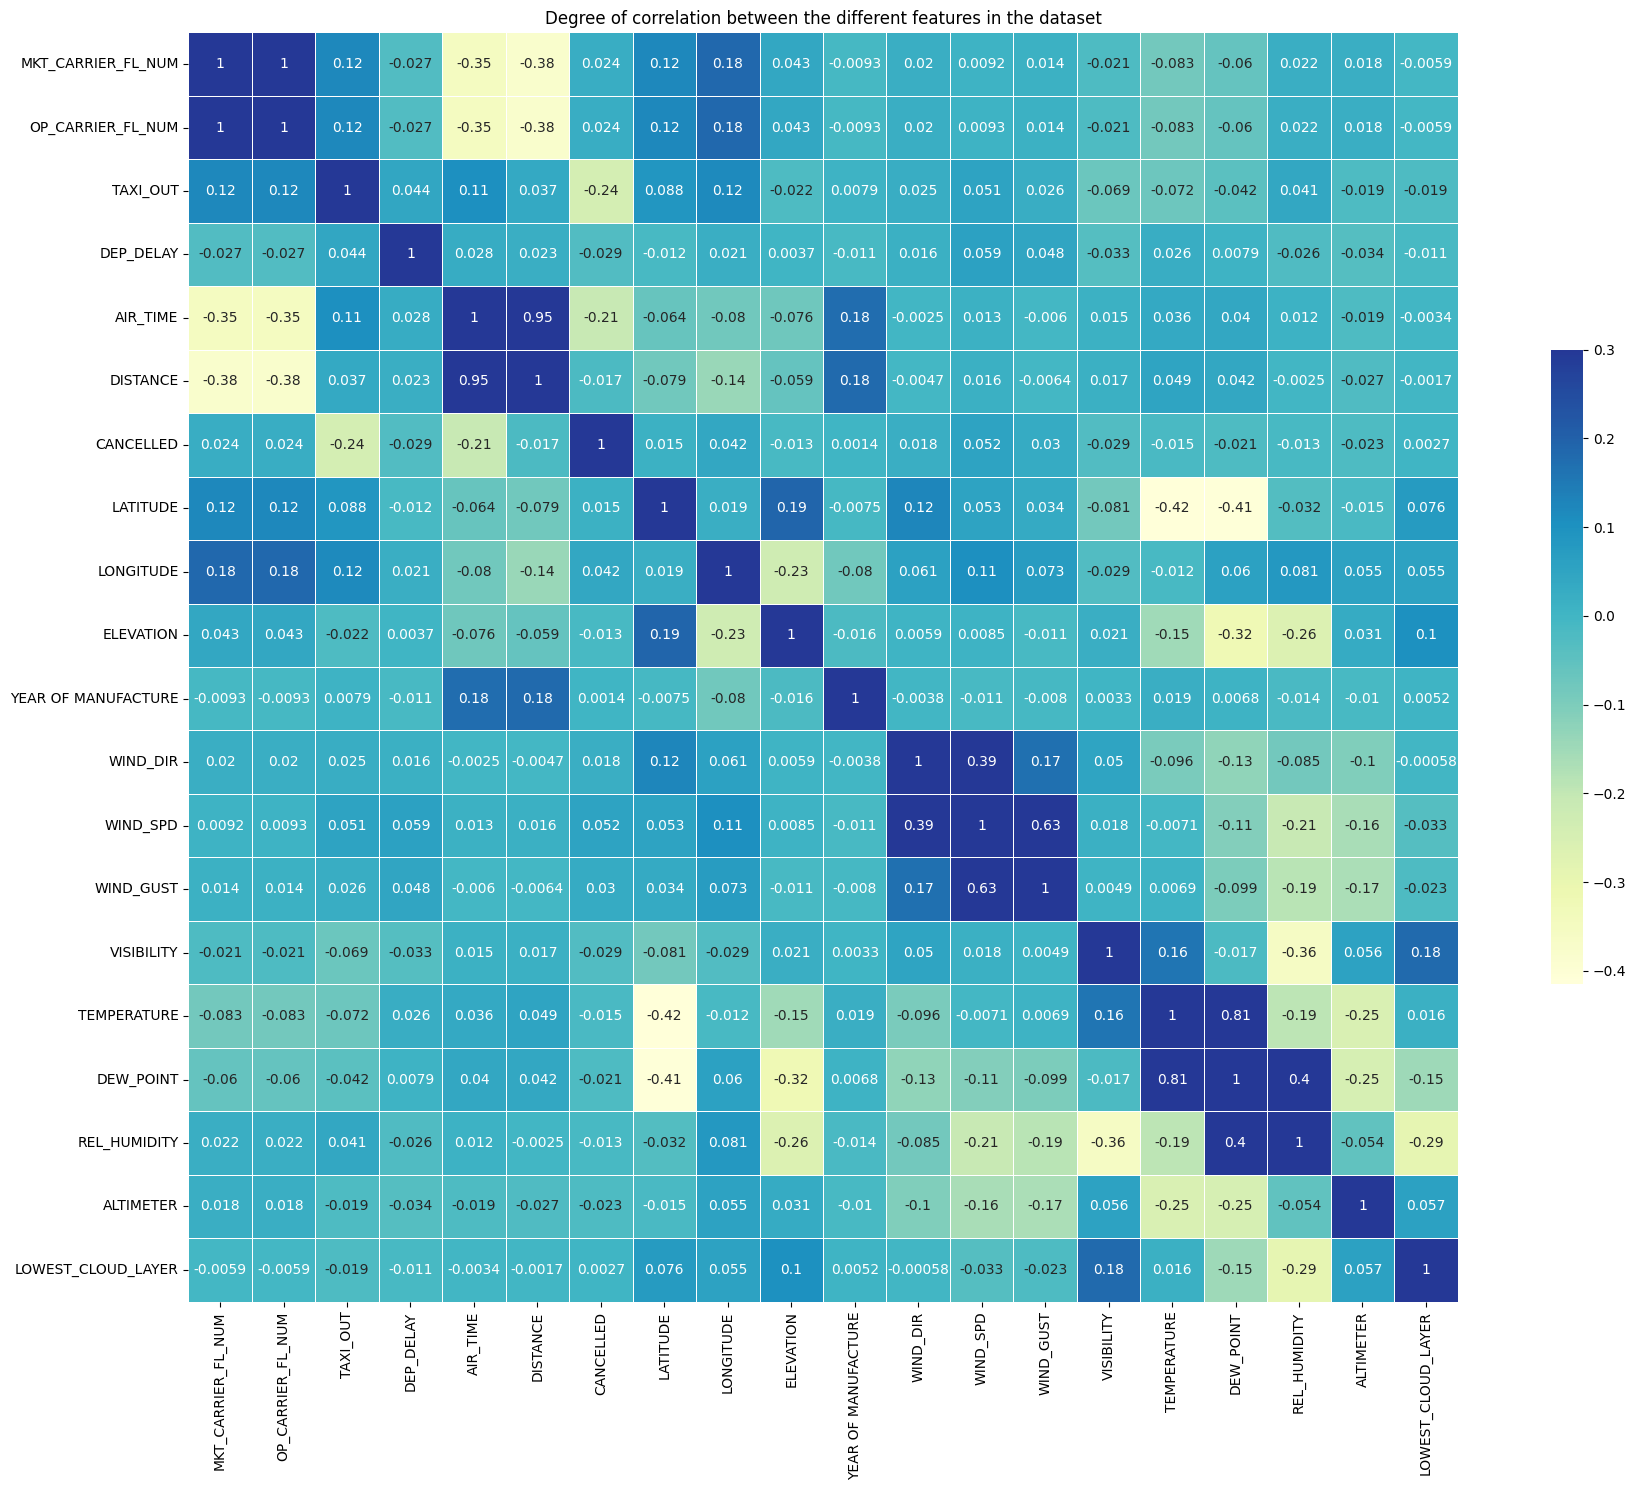

In [52]:
# Degree of correlation between the different features in the dataset.
plt.figure(figsize=(20,15))
numeric_columns = sample_data.select_dtypes(include=['number'])
sns.heatmap(numeric_columns.corr(),vmax=.3, center=0,cmap="YlGnBu",
 square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)
plt.title('Degree of correlation between the different features in the dataset')
plt.tight_layout()
plt.show()

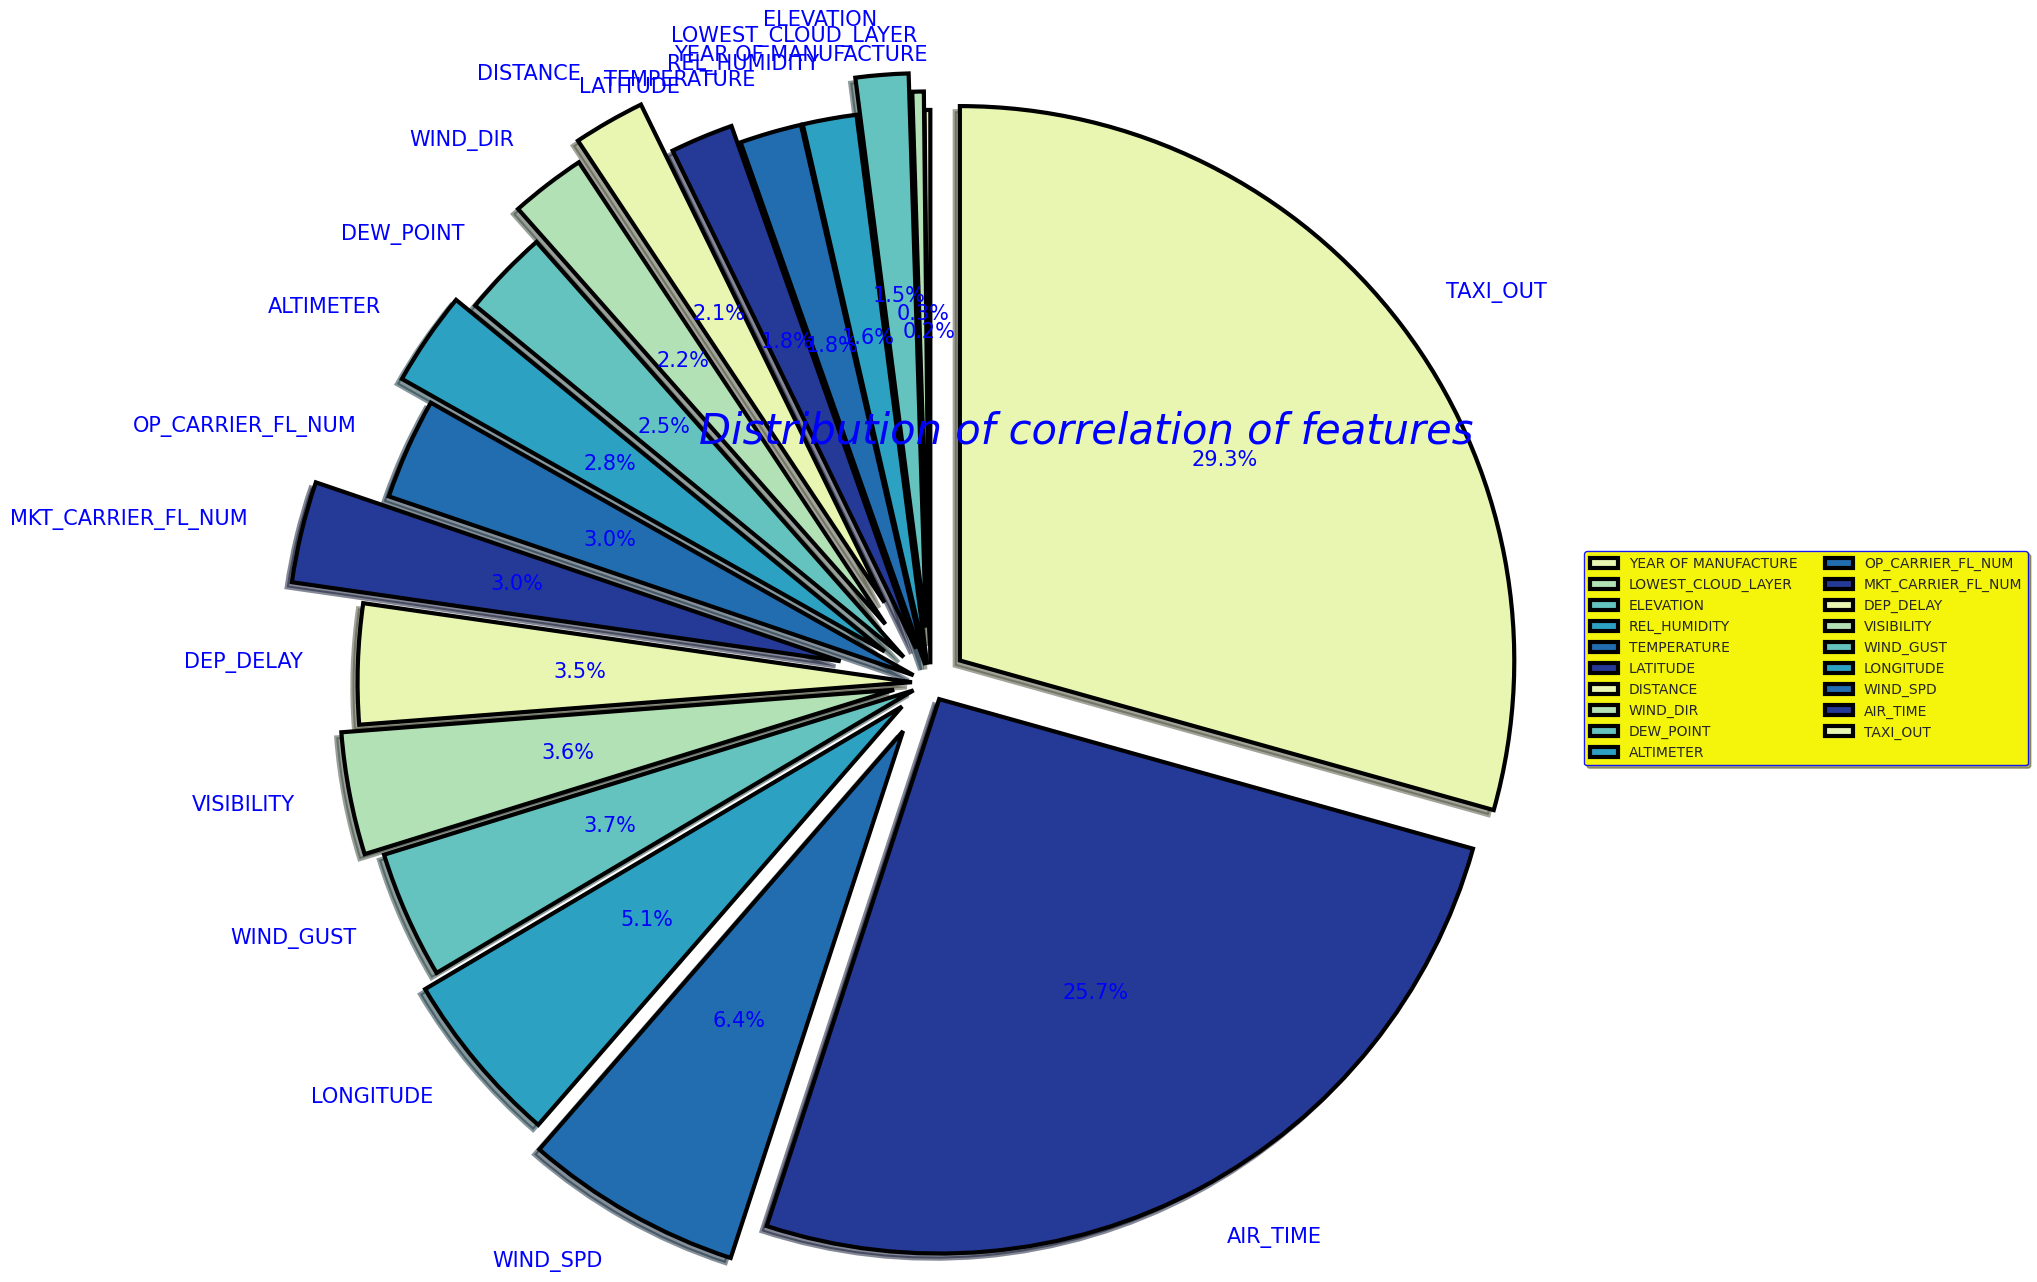

In [53]:
# To plot the correlation pie chart
sns.set_style('white')
sns.set_palette('YlGnBu')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features',fontsize=30,color="blue",pad='2.0',
        loc="left",fontstyle='italic')
pct=[0.1,0.2,0.3,0.1,0.1,0.2,0.5,0.4,0.2,0.3,0.1,0.5,0.1,0.2,0.1,0.2,0.3,0.1,0.2]
textprops = {'color':"blue","fontsize":15}
w={'edgecolor':"black",'linewidth':3,'antialiased':True}
abs(numeric_columns.corr()['CANCELLED']).sort_values()[:-1].plot.pie(explode=pct,autopct="%2.1f%%",shadow=True,startangle=90,
                                                             wedgeprops=w,textprops = textprops,radius=3.0)
plt.axis("off")
plt.legend(bbox_to_anchor=(1.9,0.8),ncol=2,facecolor="yellow",framealpha=0.9,shadow=True,edgecolor="blue",fancybox=True)

plt.show()

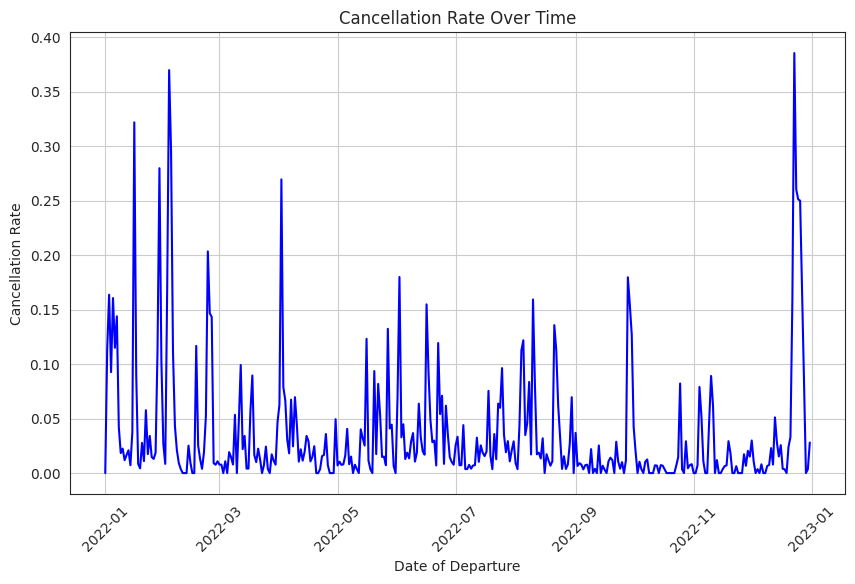

In [54]:
# Convert 'FL_DATE' column to datetime format
sample_data['FL_DATE'] = pd.to_datetime(sample_data['FL_DATE'], format='%Y-%m-%d')

# Calculate cancellation rate by date
date_cancellation_rate = sample_data.groupby('FL_DATE')['CANCELLED'].mean()

# Create a line plot to visualize the cancellation rate over years
plt.figure(figsize=(10, 6))
plt.plot(date_cancellation_rate.index, date_cancellation_rate.values,color='blue')
plt.xlabel('Date of Departure')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()



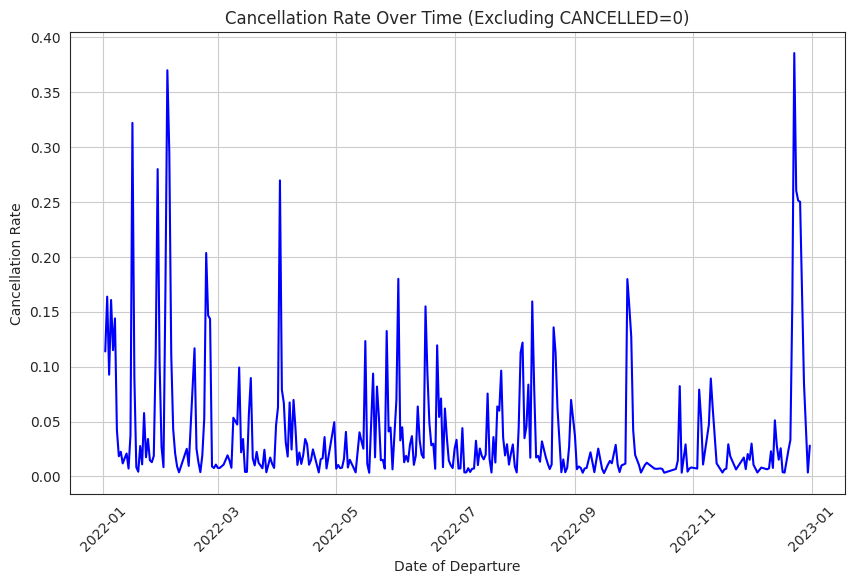

In [55]:
# Filter the date_cancellation_rate Series to exclude dates when CANCELLED = 0
date_cancellation_rate_filtered = date_cancellation_rate[date_cancellation_rate > 0]

# Create a line plot to visualize the cancellation rate over years (excluding CANCELLED=0)
plt.figure(figsize=(10, 6))
plt.plot(date_cancellation_rate_filtered.index, date_cancellation_rate_filtered.values,color='blue')
plt.xlabel('Date of Departure')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate Over Time (Excluding CANCELLED=0)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()



**Observation:**
*The line plot shows that flight cancellations were most prevalent in January 2023, with a significant increase observed in February and April 2022. These spikes indicate periods of heightened cancellation rates. The data suggests that specific time periods, especially early 2023 and mid-2022, experienced higher disruptions, warranting further investigation into potential contributing factors during those months.*

In [56]:
# Feature Engineering
# Assuming 'FL_DATE' column is in datetime format
sample_data['Month'] = sample_data['FL_DATE'].dt.month
sample_data['Day'] = sample_data['FL_DATE'].dt.day
sample_data.head(3)

FL_DATE DEP_HOUR MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM  \
3288261 2022-06-24       11                 AA                2846   
6410629 2022-12-02       20                 AS                 481   
1847215 2022-04-11       17                 AA                4721   

        OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM TAIL_NUM ORIGIN DEST  \
3288261                AA               2846   N978UY    DFW  SLC   
6410629                AS                481   N915AK    FLL  SAN   
1847215                YX               4721   N111HQ    MCI  DCA   

                   DEP_TIME  ... ALTIMETER  LOWEST_CLOUD_LAYER  N_CLOUD_LAYER  \
3288261 2022-06-24 11:32:00  ...     29.88             25000.0            1.0   
6410629 2022-12-02 20:52:00  ...     30.20              4700.0            1.0   
1847215 2022-04-11 17:38:00  ...     29.91              7000.0            3.0   

         LOW_LEVEL_CLOUD  MID_LEVEL_CLOUD  HIGH_LEVEL_CLOUD  CLOUD_COVER  \
3288261              0.0              0.0               1.0          1.0   
6410629              1.0              0.0               0.0          2.0   
1847215              0.0              1.0               0.0          3.0   

         ACTIVE_WEATHER  Month Day  
3288261             0.0      6  24  
6410629             0.0     12   2  
1847215             0.0      4  11  

[3 rows x 42 columns]

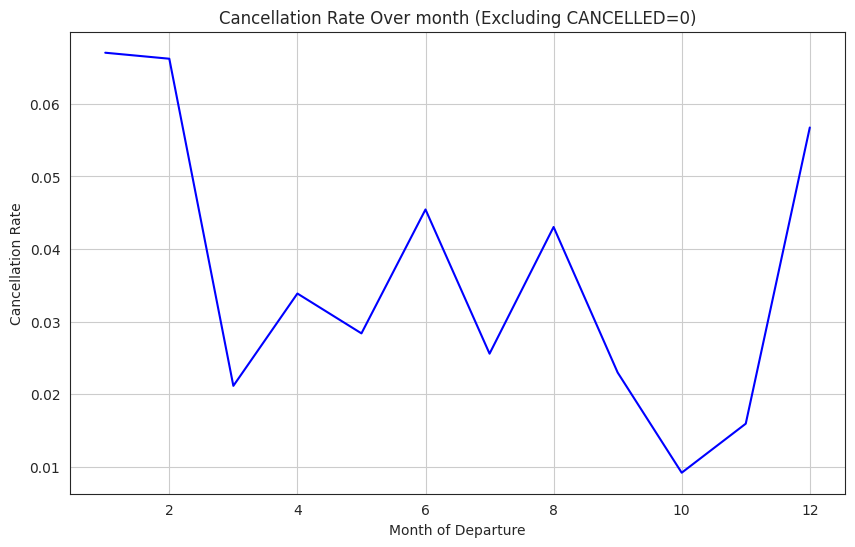

In [57]:
date_cancellation_rate = sample_data.groupby('Month')['CANCELLED'].mean()
date_cancellation_rate_filtered = date_cancellation_rate[date_cancellation_rate > 0]

# Create a line plot to visualize the cancellation rate over month (excluding CANCELLED=0)
plt.figure(figsize=(10, 6))
plt.plot(date_cancellation_rate_filtered.index, date_cancellation_rate_filtered.values,color='blue')
plt.xlabel('Month of Departure')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate Over month (Excluding CANCELLED=0)')
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

**Observation:**
*The analysis of the month versus flight cancellation graph reveals that the cancellation rate was notably higher in January, February, and December,(winter months in North America) indicating adverse weather conditions during these months leading to increased flight cancellations. Conversely, the flight cancellation rate was considerably lower in October,(USA weather in October is beautiful and have warm temperatures throughout the month with a few rain showers.) suggesting more favorable weather conditions in the US during that period.*

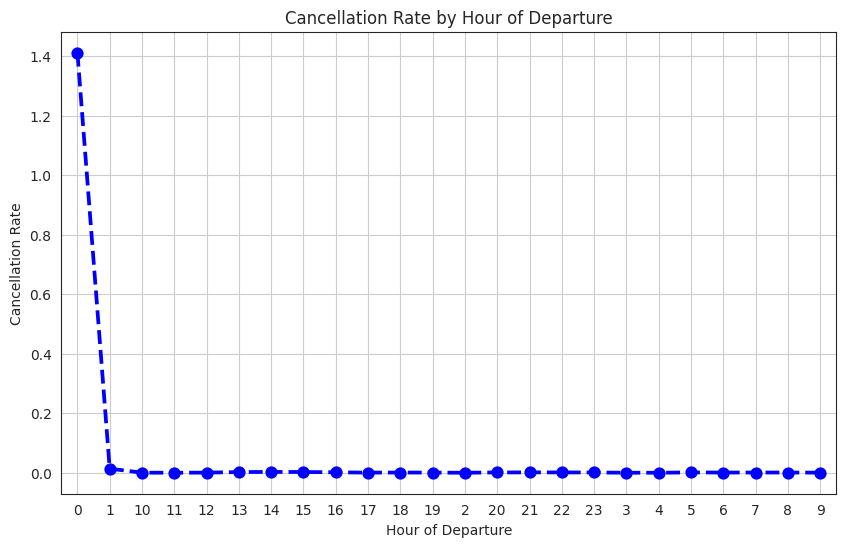

In [58]:
# Calculate cancellation rate by hour of departure
hour_cancellation_rate = sample_data.groupby('DEP_HOUR')['CANCELLED'].mean().reset_index()

# Create a point plot to visualize the cancellation rate by hour of departure
plt.figure(figsize=(10, 6))
sns.pointplot(x='DEP_HOUR', y='CANCELLED', data=hour_cancellation_rate, markers='o', linestyles='--',color='blue')
plt.xlabel('Hour of Departure')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Hour of Departure')
plt.grid(True)
plt.show()


**Observation:**
*Based on the data analysis, it is evident that flight cancellations are most likely to occur when the departure hour (DEP_HOUR) is '0' (midnight).*

In [59]:
# Select data where DEP_HOUR is '0'
dep_hour_0_data = sample_data[sample_data['DEP_HOUR'] == '0']

In [60]:
# Calculate the counts for each category of the 'CANCELLED' column in dep_hour_0_data
cancelled_counts = dep_hour_0_data['CANCELLED'].value_counts()

# Display the counts for each category
print(cancelled_counts)


CANCELLED
2    1060
1     815
0     408
3     180
4       1
Name: count, dtype: int64


<ipython-input-61-1c9eb9de2b36>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')


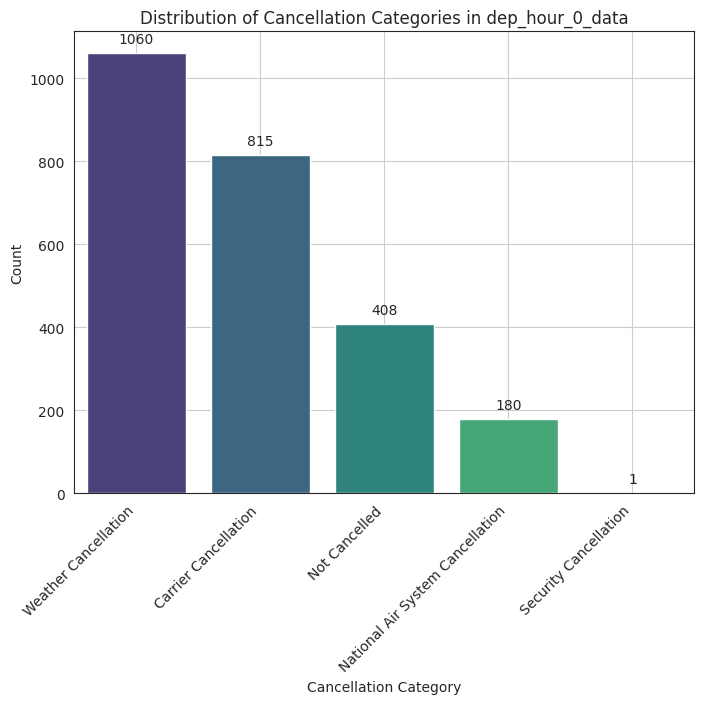

In [61]:
# Calculate the counts for each category of the 'CANCELLED' column in dep_hour_0_data
cancelled_counts = dep_hour_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'Not Cancelled',
    1: 'Carrier Cancellation',
    2: 'Weather Cancellation',
    3: 'National Air System Cancellation',
    4: 'Security Cancellation'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)

# Check if there are any rows in the DataFrame
if not cancelled_counts.empty:
    # Create the bar plot
    plt.figure(figsize=(8, 6))
    ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
    plt.xlabel('Cancellation Category')
    plt.ylabel('Count')
    plt.title('Distribution of Cancellation Categories in dep_hour_0_data')
    plt.grid(True)

    # Add text annotations on top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.show()
else:
    print("No data available for DEP_HOUR = 0")


**Observation:**
*it can be concluded that flight cancellations are most likely to happen due to weather conditions when the departure hour (DEP_HOUR) is '0' (midnight). The substantial increase in weather-related cancellations during this hour suggests that DEP_HOUR is a significant predictor for weather-induced flight cancellations in the dataset. Therefore, the time of day when a flight is scheduled to depart, especially at midnight, has a notable influence on the likelihood of weather-related cancellations.*

<ipython-input-64-46835a78e7c8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MKT_UNIQUE_CARRIER', y='CANCELLED', data=carrier_cancellation_rate,palette='inferno')


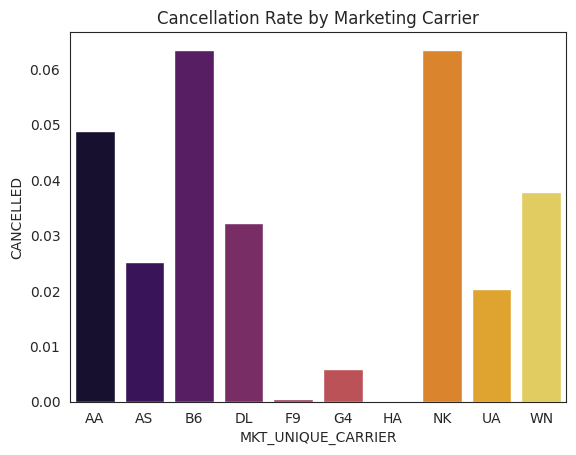

In [64]:
# Analyzing cancellation rate by marketing carrier
carrier_cancellation_rate = sample_data.groupby('MKT_UNIQUE_CARRIER')['CANCELLED'].mean().reset_index()
sns.barplot(x='MKT_UNIQUE_CARRIER', y='CANCELLED', data=carrier_cancellation_rate,palette='inferno')
plt.title('Cancellation Rate by Marketing Carrier')
plt.show()

<ipython-input-65-8110c2650736>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-65-8110c2650736>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-65-8110c2650736>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-65-8110c2650736>:106: FutureWarning: 

Passing `palette

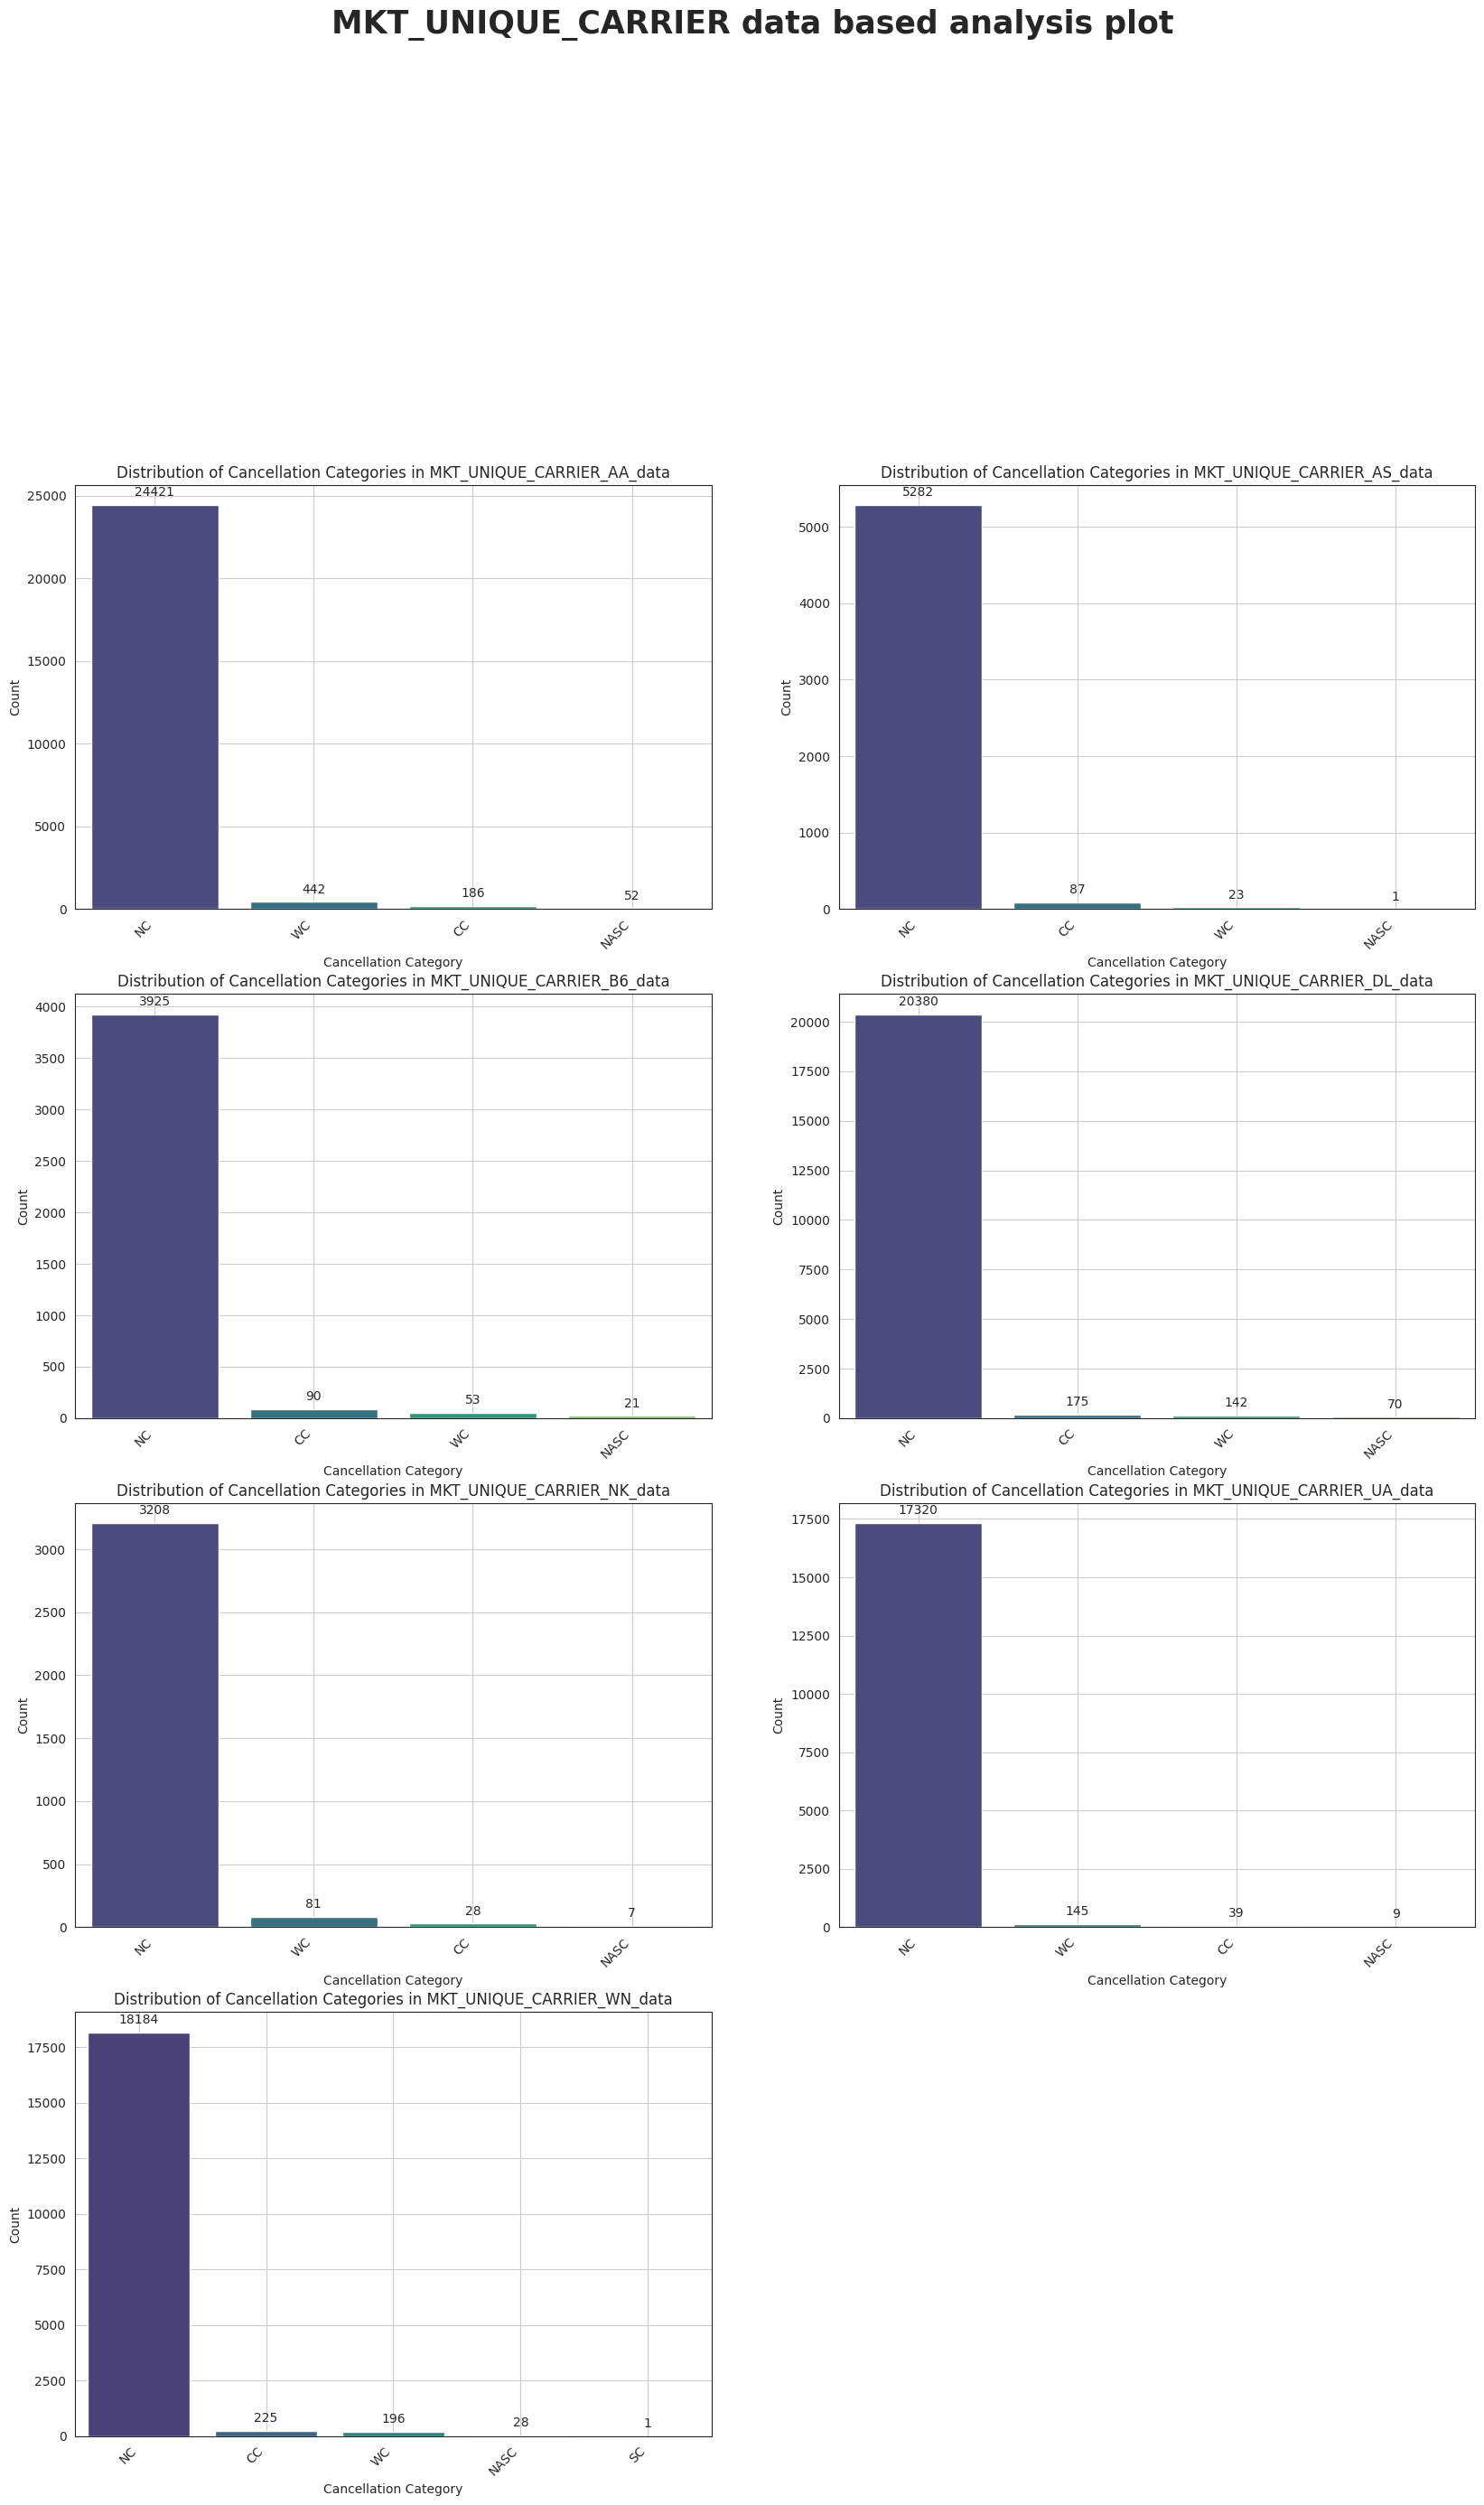

In [65]:
fig=plt.figure(figsize=(20,50))
plt.suptitle("MKT_UNIQUE_CARRIER data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(7,2,1)

MKT_UNIQUE_CARRIER_AA_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'AA']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MKT_UNIQUE_CARRIER_AA_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_AA_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.subplot(7,2,2)

MKT_UNIQUE_CARRIER_AS_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'AS']
cancelled_counts = MKT_UNIQUE_CARRIER_AS_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_AS_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')


plt.subplot(7,2,3)

MKT_UNIQUE_CARRIER_B6_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'B6']
cancelled_counts = MKT_UNIQUE_CARRIER_B6_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_B6_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')

plt.subplot(7,2,4)

MKT_UNIQUE_CARRIER_DL_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'DL']
cancelled_counts = MKT_UNIQUE_CARRIER_DL_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_DL_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')


plt.subplot(7,2,5)

MKT_UNIQUE_CARRIER_NK_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'NK']
cancelled_counts = MKT_UNIQUE_CARRIER_NK_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_NK_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')


plt.subplot(7,2,6)

MKT_UNIQUE_CARRIER_UA_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'UA']
cancelled_counts = MKT_UNIQUE_CARRIER_UA_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_UA_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')




plt.subplot(7,2,7)

MKT_UNIQUE_CARRIER_WN_data = sample_data[sample_data['MKT_UNIQUE_CARRIER'] == 'WN']
cancelled_counts = MKT_UNIQUE_CARRIER_WN_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MKT_UNIQUE_CARRIER_WN_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')



plt.show()


note:









1.   NC-->Not Cancelled
2.   CC-->Carrier Cancellation
3.  WC-->Weather Cancellation
4.  NASC-->National Air System Cancellation
5. SC-->Security Cancellation












**Observation:**
*Upon analyzing the MKT_UNIQUE_CARRIER column, it was evident that flight cancellations due to weather conditions or carrier-related issues are infrequent and occur very rarely.*

<ipython-input-67-529f8c36a53a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OP_UNIQUE_CARRIER', y='CANCELLED', data=carrier_cancellation_rate,palette="inferno")


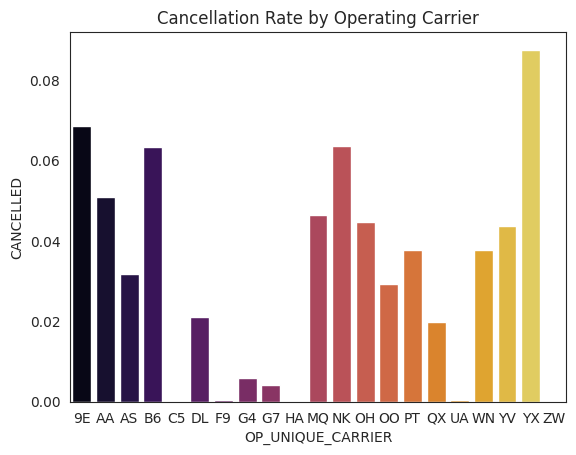

In [67]:
# Analyzing cancellation rate by operating carrier
carrier_cancellation_rate = sample_data.groupby('OP_UNIQUE_CARRIER')['CANCELLED'].mean().reset_index()
sns.barplot(x='OP_UNIQUE_CARRIER', y='CANCELLED', data=carrier_cancellation_rate,palette="inferno")
plt.title('Cancellation Rate by Operating Carrier')
plt.show()

<ipython-input-68-72f6b317f891>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-68-72f6b317f891>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-68-72f6b317f891>:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-68-72f6b317f891>:106: FutureWarning: 

Passing `palette

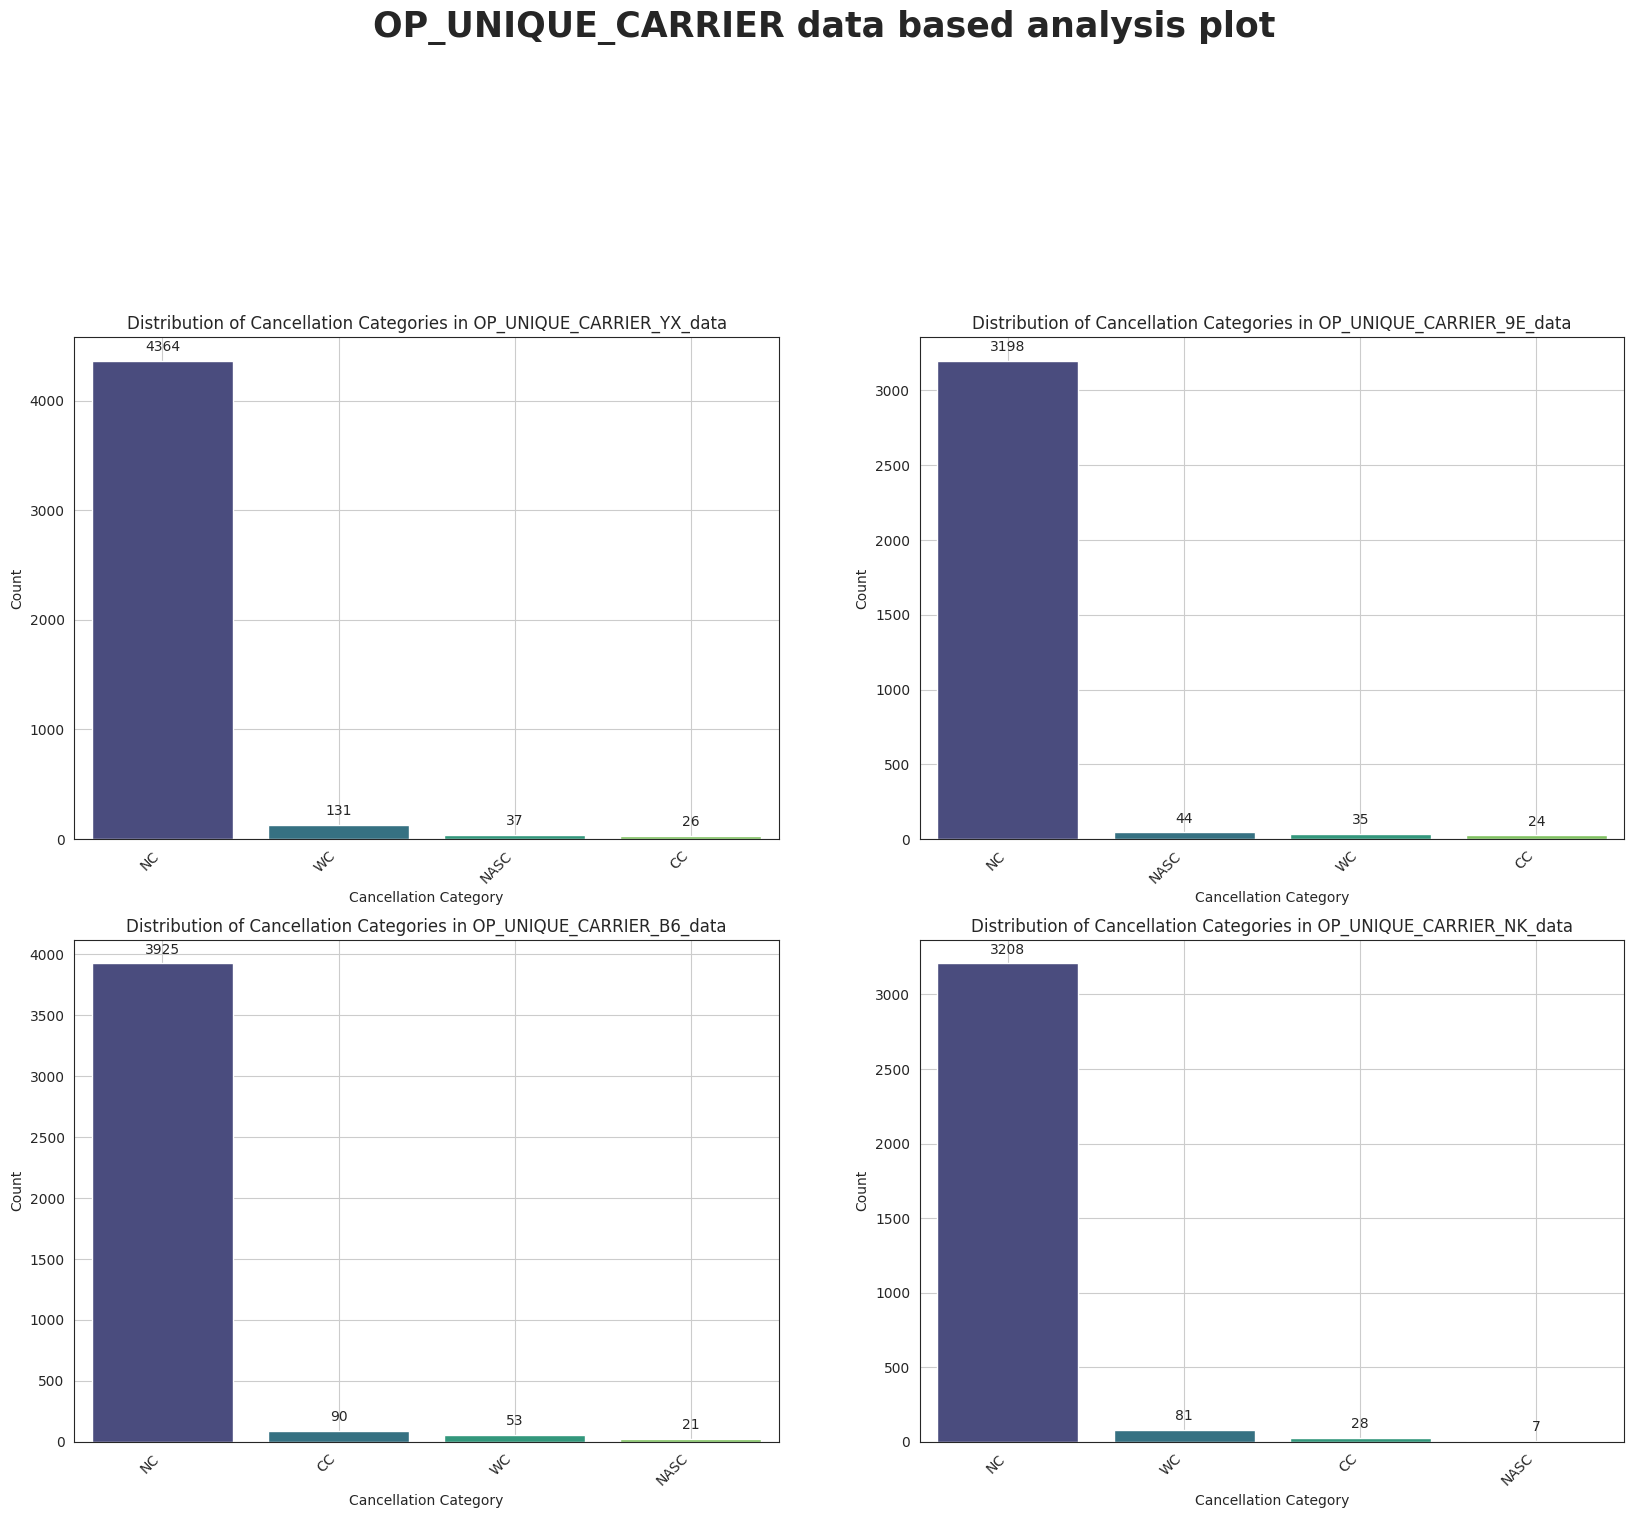

In [68]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("OP_UNIQUE_CARRIER data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

OP_UNIQUE_CARRIER_YX_data = sample_data[sample_data['OP_UNIQUE_CARRIER'] == 'YX']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = OP_UNIQUE_CARRIER_YX_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in OP_UNIQUE_CARRIER_YX_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability


plt.subplot(4,2,2)

OP_UNIQUE_CARRIER_9E_data = sample_data[sample_data['OP_UNIQUE_CARRIER'] == '9E']
cancelled_counts = OP_UNIQUE_CARRIER_9E_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in OP_UNIQUE_CARRIER_9E_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')


plt.subplot(4,2,3)

OP_UNIQUE_CARRIER_B6_data = sample_data[sample_data['OP_UNIQUE_CARRIER'] == 'B6']
cancelled_counts = OP_UNIQUE_CARRIER_B6_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in OP_UNIQUE_CARRIER_B6_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')

plt.subplot(4,2,4)

OP_UNIQUE_CARRIER_NK_data = sample_data[sample_data['OP_UNIQUE_CARRIER'] == 'NK']
cancelled_counts = OP_UNIQUE_CARRIER_NK_data['CANCELLED'].value_counts()
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

cancelled_counts.index = cancelled_counts.index.map(category_names)
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in OP_UNIQUE_CARRIER_NK_data')
plt.grid(True)

# Add text annotations on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')
plt.show()

**Observation:**
*The OP_UNIQUE_CARRIER column shows a similar trend like MKT_UNIQUE_CARRIER, with flight cancellations due to weather or carrier issues (which is being rare). The airline demonstrates reliability and efficient operations, resulting in fewer disruptions and a positive impact on customer experience.*

In [69]:
#Feature Engineering
origin_to_region_state = Stations_data[['AIRPORT', 'AIRPORT_STATE_NAME']].copy()

In [70]:
origin_to_region_state_map = origin_to_region_state.set_index('AIRPORT')['AIRPORT_STATE_NAME'].to_dict()

In [71]:
sample_data['AIRPORT_STATE_NAME'] = sample_data['ORIGIN'].map(origin_to_region_state_map)

In [72]:
sample_data.head(3)

FL_DATE DEP_HOUR MKT_UNIQUE_CARRIER  MKT_CARRIER_FL_NUM  \
3288261 2022-06-24       11                 AA                2846   
6410629 2022-12-02       20                 AS                 481   
1847215 2022-04-11       17                 AA                4721   

        OP_UNIQUE_CARRIER  OP_CARRIER_FL_NUM TAIL_NUM ORIGIN DEST  \
3288261                AA               2846   N978UY    DFW  SLC   
6410629                AS                481   N915AK    FLL  SAN   
1847215                YX               4721   N111HQ    MCI  DCA   

                   DEP_TIME  ... LOWEST_CLOUD_LAYER  N_CLOUD_LAYER  \
3288261 2022-06-24 11:32:00  ...            25000.0            1.0   
6410629 2022-12-02 20:52:00  ...             4700.0            1.0   
1847215 2022-04-11 17:38:00  ...             7000.0            3.0   

         LOW_LEVEL_CLOUD  MID_LEVEL_CLOUD  HIGH_LEVEL_CLOUD  CLOUD_COVER  \
3288261              0.0              0.0               1.0          1.0   
6410629              1.0              0.0               0.0          2.0   
1847215              0.0              1.0               0.0          3.0   

         ACTIVE_WEATHER  Month  Day AIRPORT_STATE_NAME  
3288261             0.0      6   24              Texas  
6410629             0.0     12    2            Florida  
1847215             0.0      4   11           Missouri  

[3 rows x 43 columns]

<ipython-input-74-5dcf95e63c02>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_cancellation_rate.index, y=region_cancellation_rate.values,palette='inferno')


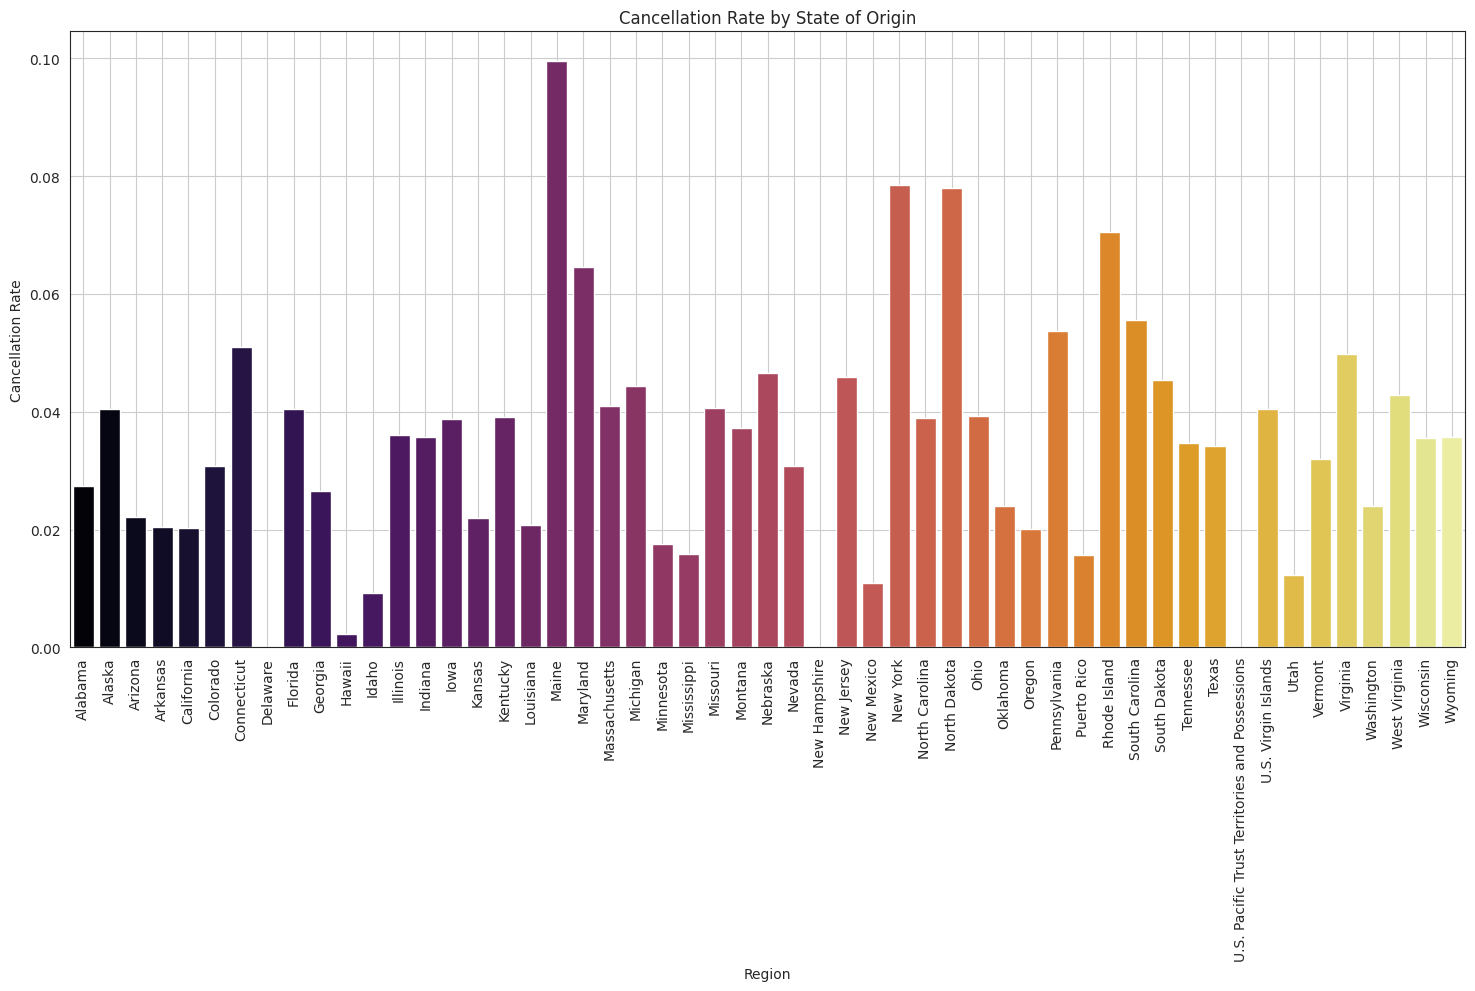

In [74]:
#  Calculate cancellation rate for each State
region_cancellation_rate = sample_data.groupby('AIRPORT_STATE_NAME')['CANCELLED'].mean()

#  Plot the relationship between regions and cancellation rate
plt.figure(figsize=(18, 8))
sns.barplot(x=region_cancellation_rate.index, y=region_cancellation_rate.values,palette='inferno')
plt.xlabel('Region')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by State of Origin')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

<ipython-input-75-5346f7b5e2d2>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-75-5346f7b5e2d2>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-75-5346f7b5e2d2>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-75-5346f7b5e2d2>:100: FutureWarning: 

Passing `palette

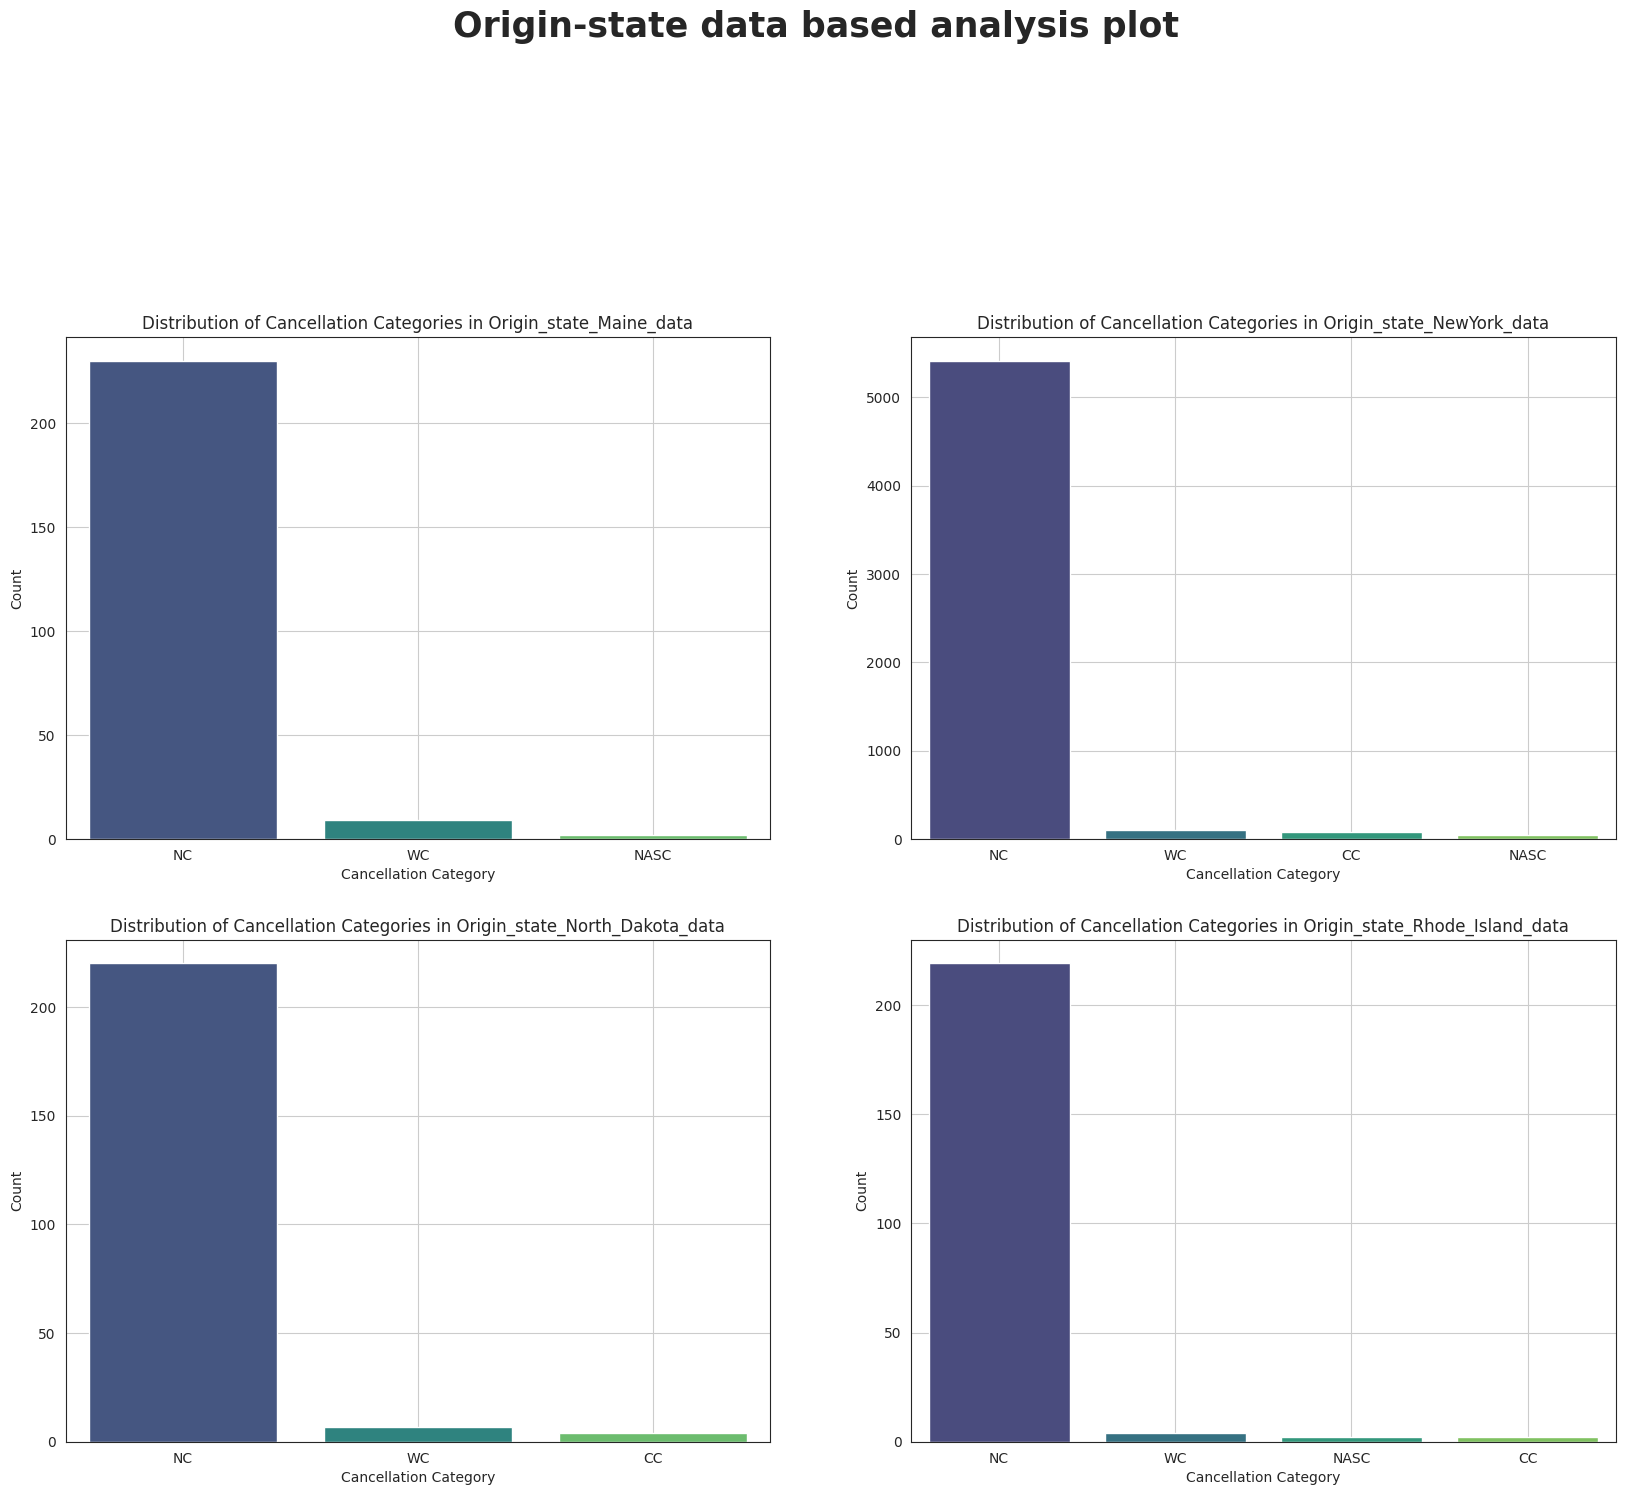

In [75]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("Origin-state data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

Origin_state_Maine_data = sample_data[sample_data['AIRPORT_STATE_NAME'] == 'Maine']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Origin_state_Maine_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Origin_state_Maine_data')
plt.grid(True)


plt.subplot(4,2,2)

Origin_state_NewYork_data = sample_data[sample_data['AIRPORT_STATE_NAME'] == 'New York']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Origin_state_NewYork_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Origin_state_NewYork_data')
plt.grid(True)



plt.subplot(4,2,3)

Origin_state_North_Dakota_data = sample_data[sample_data['AIRPORT_STATE_NAME'] == 'North Dakota']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Origin_state_North_Dakota_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Origin_state_North_Dakota_data')
plt.grid(True)



plt.subplot(4,2,4)

Origin_state_Rhode_Island_data = sample_data[sample_data['AIRPORT_STATE_NAME'] == 'Rhode Island']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Origin_state_Rhode_Island_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Origin_state_Rhode_Island_data')
plt.grid(True)



plt.show()

**Observation:**
*The analysis of the Cancellation Rate by State of Origin revealed that Maine, New York, North Dakota, and Rhode Island have the highest cancellation rates. Interestingly, when examining the distribution of cancellation categories in these states, rare occurrences of weather and carrier cancellations were observed, while security cancellations were notably absent.*


In [76]:
# Filter the rows where TAXI_OUT values are between 4 and 75 (inclusive)
taxi_out_data = sample_data[(sample_data['TAXI_OUT'] >= 4) & (sample_data['TAXI_OUT'] <= 30)]


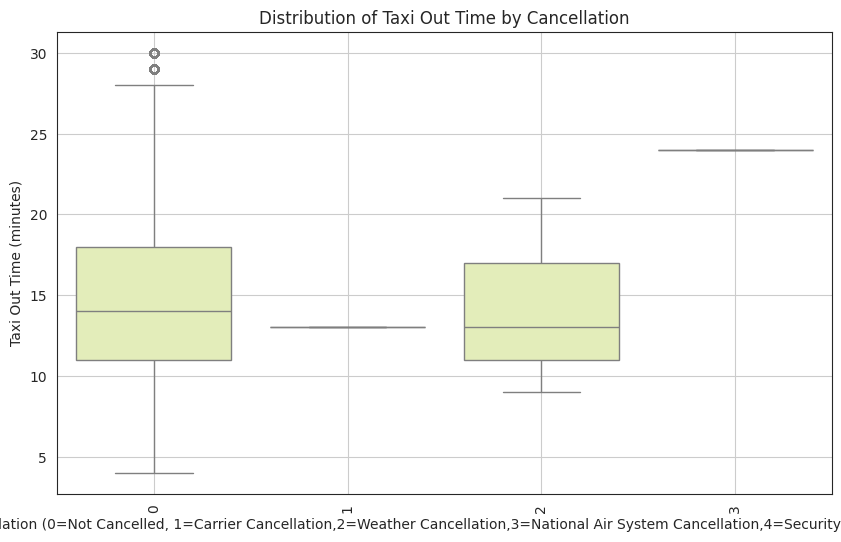

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='TAXI_OUT', data=taxi_out_data)
plt.xlabel('Cancellation (0=Not Cancelled, 1=Carrier Cancellation,2=Weather Cancellation,3=National Air System Cancellation,4=Security Cancellation)')
plt.ylabel('Taxi Out Time (minutes)')
plt.title('Distribution of Taxi Out Time by Cancellation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()


In [78]:
correlation_coefficient = taxi_out_data['TAXI_OUT'].corr(taxi_out_data['CANCELLED'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: 0.002571307133714665


**Observation:**
*A correlation coefficient of 0.002571307133714665 indicates a very weak correlation between TAXI_OUT time and flight cancellations. A value close to zero suggests that there is almost no linear relationship between these two variables.*

*In this case, the small correlation coefficient suggests that the length of TAXI_OUT time is not a strong predictor of flight cancellations.*


In [79]:
dep_delay_data = sample_data[(sample_data['DEP_DELAY'] >= -10) & (sample_data['DEP_DELAY'] <= 10)]

<ipython-input-81-bb2db3da9259>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CANCELLED', y='DEP_DELAY', data=dep_delay_data,palette='inferno')


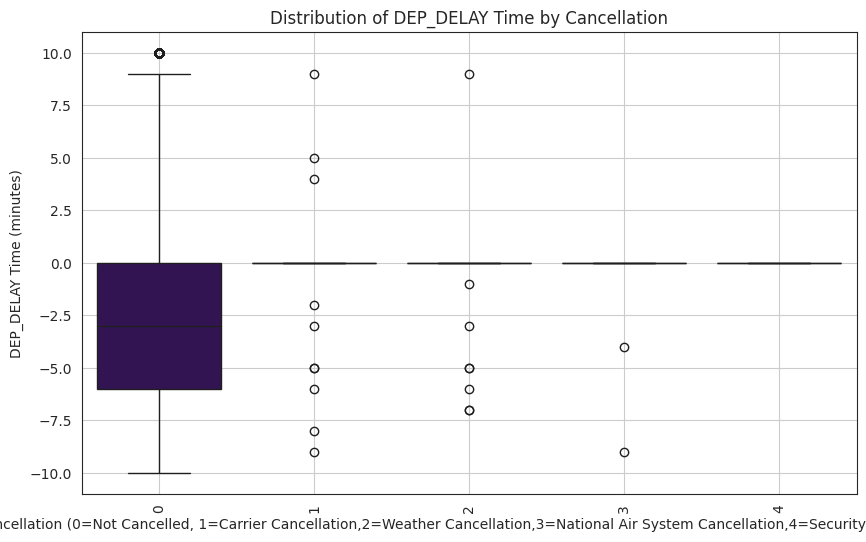

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='DEP_DELAY', data=dep_delay_data,palette='inferno')
plt.xlabel('Cancellation (0=Not Cancelled, 1=Carrier Cancellation,2=Weather Cancellation,3=National Air System Cancellation,4=Security Cancellation)')
plt.ylabel('DEP_DELAY Time (minutes)')
plt.title('Distribution of DEP_DELAY Time by Cancellation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [82]:
correlation_coefficient = sample_data['DEP_DELAY'].corr(sample_data['CANCELLED'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.02859132010848413


**Observation:**
*A correlation coefficient  between DEP_DELAY and flight cancellation indicates an extremely weak correlation. The negative sign of the coefficient suggests a very slight tendency for flights with longer departure delays to have slightly lower chances of cancellation. However, the value is very close to zero, which implies that there is almost no linear relationship between DEP_DELAY and flight cancellations.*


In [83]:
air_time_data = sample_data[(sample_data['AIR_TIME'] >= 0) & (sample_data['AIR_TIME'] <= 250)]

<ipython-input-85-f697c08caf9e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CANCELLED', y='AIR_TIME', data=air_time_data,palette='inferno')


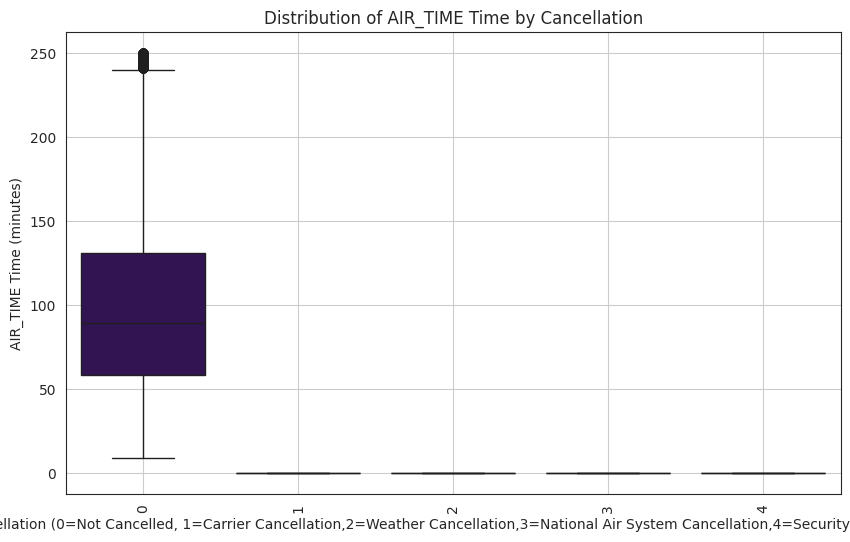

In [85]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='AIR_TIME', data=air_time_data,palette='inferno')
plt.xlabel('Cancellation (0=Not Cancelled, 1=Carrier Cancellation,2=Weather Cancellation,3=National Air System Cancellation,4=Security Cancellation)')
plt.ylabel('AIR_TIME Time (minutes)')
plt.title('Distribution of AIR_TIME Time by Cancellation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

In [86]:
correlation_coefficient = air_time_data['AIR_TIME'].corr(air_time_data['CANCELLED'])
print("Correlation Coefficient:", correlation_coefficient)

Correlation Coefficient: -0.26092469581508493


**Observation:**
*A correlation coefficient  between AIR_TIME and flight cancellation indicates a very weak negative correlation. The negative sign of the coefficient suggests a slight tendency for flights with longer air times to have slightly lower chances of cancellation. However, the value is very close to zero, which means that there is almost no linear relationship between AIR_TIME and flight cancellations.*

<ipython-input-87-f3689b437198>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='CANCELLED', y='DISTANCE', data=distance_data,palette='inferno')


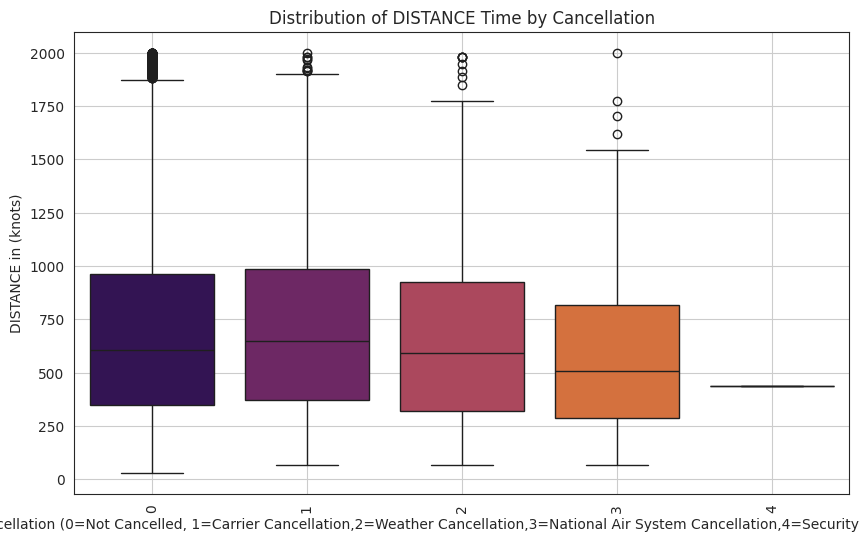

In [87]:
distance_data = sample_data[(sample_data['DISTANCE'] >= 0) & (sample_data['DISTANCE'] <= 2000)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='CANCELLED', y='DISTANCE', data=distance_data,palette='inferno')
plt.xlabel('Cancellation (0=Not Cancelled, 1=Carrier Cancellation,2=Weather Cancellation,3=National Air System Cancellation,4=Security Cancellation)')
plt.ylabel('DISTANCE in (knots)')
plt.title('Distribution of DISTANCE Time by Cancellation')
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

**Observation:**
*Based on the analysis of the distance plot, it can be inferred that flight cancellations due to weather , Carrier cancellation and National Air System Cancellation are relatively frequent for flights with smaller distances, specifically in the range of 300 to 1000.*

<ipython-input-88-8a287ddc3549>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_latitude = sample_data.groupby(latitude_bins)['CANCELLED'].mean()


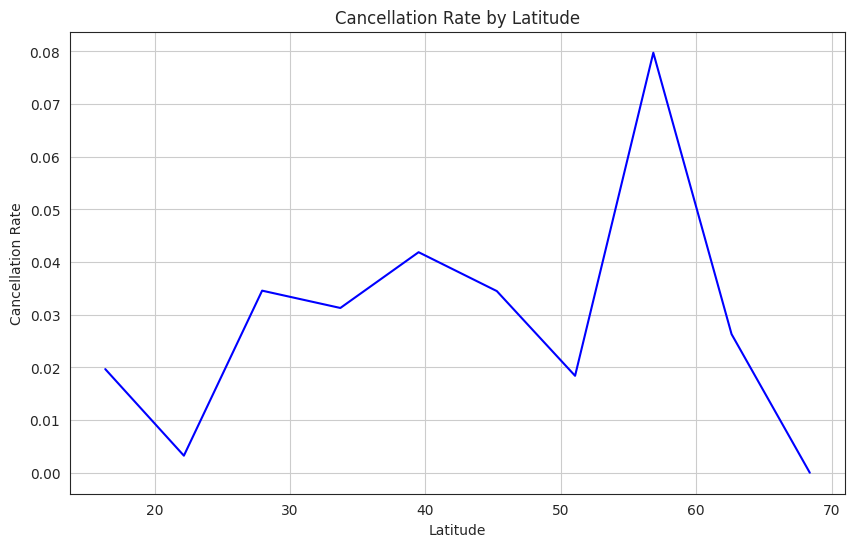

In [88]:
# Create bins for LATITUDE
num_bins = 10
latitude_bins = pd.cut(sample_data['LATITUDE'], bins=num_bins)

# Calculate cancellation rate for each latitude bin
cancellation_rate_by_latitude = sample_data.groupby(latitude_bins)['CANCELLED'].mean()

# Calculate midpoints of latitude bins
latitude_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_latitude.index]

# Plot the cancellation rate by latitude
plt.figure(figsize=(10, 6))
plt.plot(latitude_midpoints, cancellation_rate_by_latitude.values,color='blue')
plt.xlabel('Latitude')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Latitude')
plt.grid(True)
plt.show()

**Observation:**
*The plot reveals a noticeable trend in flight cancellations, indicating a higher cancellation rate occurring within the latitude range of 50 to 70.*  


<ipython-input-89-49eb7c7f52c0>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_LONGITUDE = filtered_data.groupby(LONGITUDE_bins)['CANCELLED'].mean()


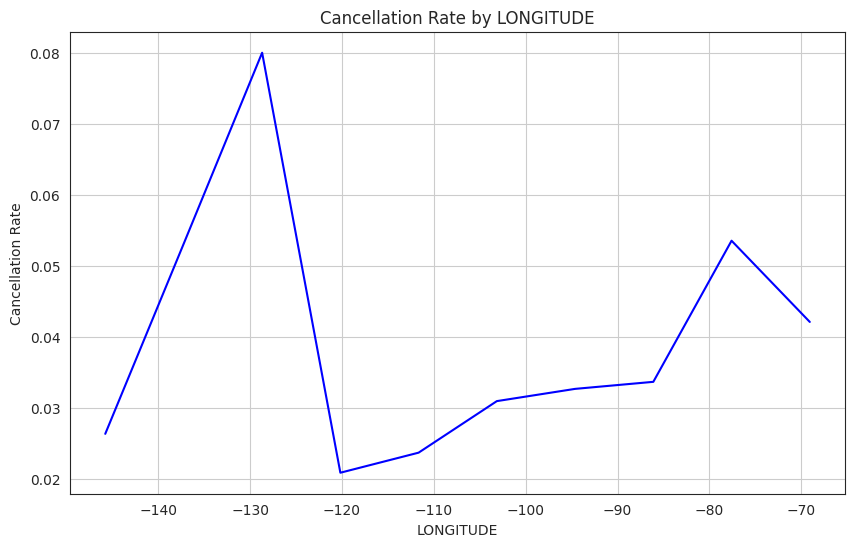

In [89]:
filtered_data = sample_data[(sample_data['LONGITUDE'] >= -150) & (sample_data['LONGITUDE'] <= -50)]
# Create bins for LONGITUDE
num_bins = 10
LONGITUDE_bins = pd.cut(filtered_data['LONGITUDE'], bins=num_bins)

# Calculate cancellation rate for each LONGITUDE bin
cancellation_rate_by_LONGITUDE = filtered_data.groupby(LONGITUDE_bins)['CANCELLED'].mean()

# Calculate midpoints of LONGITUDE bins
LONGITUDE_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_LONGITUDE.index]

# Plot the cancellation rate by LONGITUDE
plt.figure(figsize=(10, 6))
plt.plot(LONGITUDE_midpoints, cancellation_rate_by_LONGITUDE.values,color='blue')
plt.xlabel('LONGITUDE')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by LONGITUDE')
plt.grid(True)
plt.show()

**Observation:**
*The plotted data displays a distinct pattern in flight cancellations, indicating an elevated cancellation rate within the longitude range of -150 to -120.*

<ipython-input-90-23155b56529b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_ELEVATION = sample_data.groupby(ELEVATION_bins)['CANCELLED'].mean()


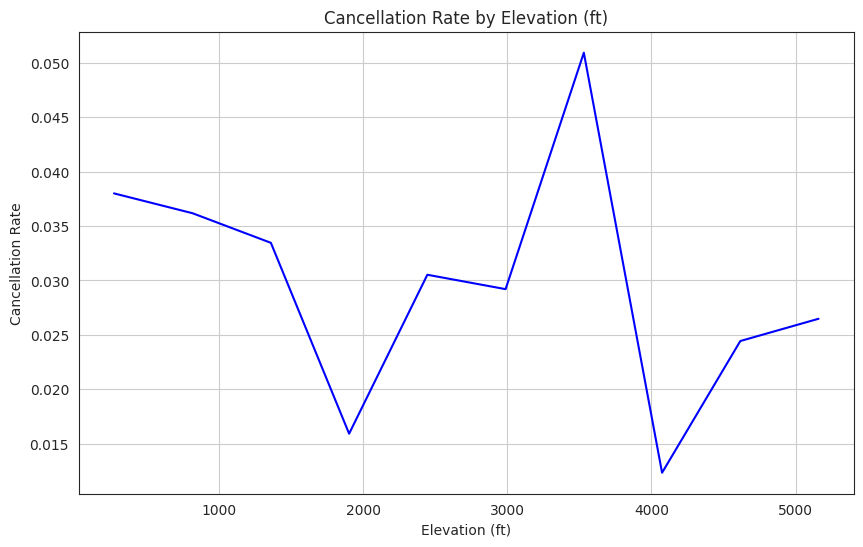

In [90]:
ELEVATION_data = sample_data[(sample_data['ELEVATION'] >= 0) & (sample_data['ELEVATION'] <= 5500)]

# Create bins for ELEVATION
num_bins = 10
ELEVATION_bins = pd.cut(ELEVATION_data['ELEVATION'], bins=num_bins)

# Calculate cancellation rate for each ELEVATION bin
cancellation_rate_by_ELEVATION = sample_data.groupby(ELEVATION_bins)['CANCELLED'].mean()

# Calculate midpoints of ELEVATION bins
ELEVATION_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_ELEVATION.index]

# Plot the cancellation rate by ELEVATION
plt.figure(figsize=(10, 6))
plt.plot(ELEVATION_midpoints, cancellation_rate_by_ELEVATION.values,color='blue')
plt.xlabel('Elevation (ft)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Elevation (ft)')
plt.grid(True)
plt.show()

**Observation:**
*Upon analyzing the data, no substantial evidence supports the notion that elevation significantly affects flight cancellations. The absence of a prominent correlation suggests that elevation may not be a key factor contributing to flight cancellations.*

<ipython-input-92-52ff82d3bc2e>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='YEAR OF MANUFACTURE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-92-52ff82d3bc2e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='YEAR OF MANUFACTURE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


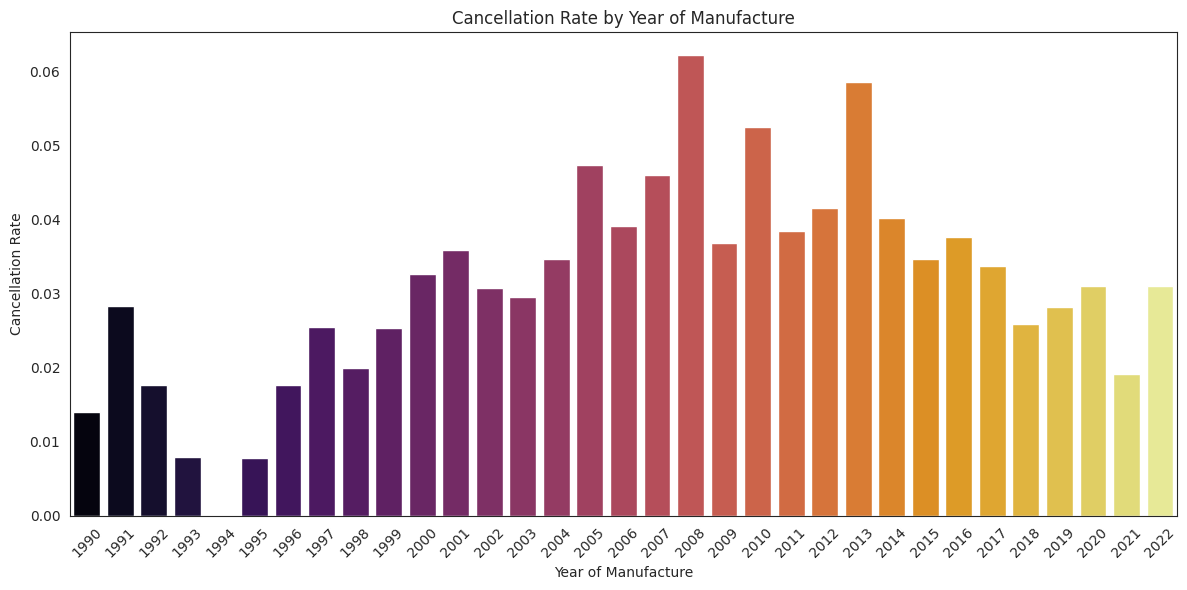

In [92]:
# Create a bar plot to show the distribution of cancellation categories for each year of manufacture
plt.figure(figsize=(12, 6))
sns.barplot(x='YEAR OF MANUFACTURE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('Year of Manufacture')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Year of Manufacture')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-93-1bc8e39cc37d>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-93-1bc8e39cc37d>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-93-1bc8e39cc37d>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-93-1bc8e39cc37d>:98: FutureWarning: 

Passing `palette`

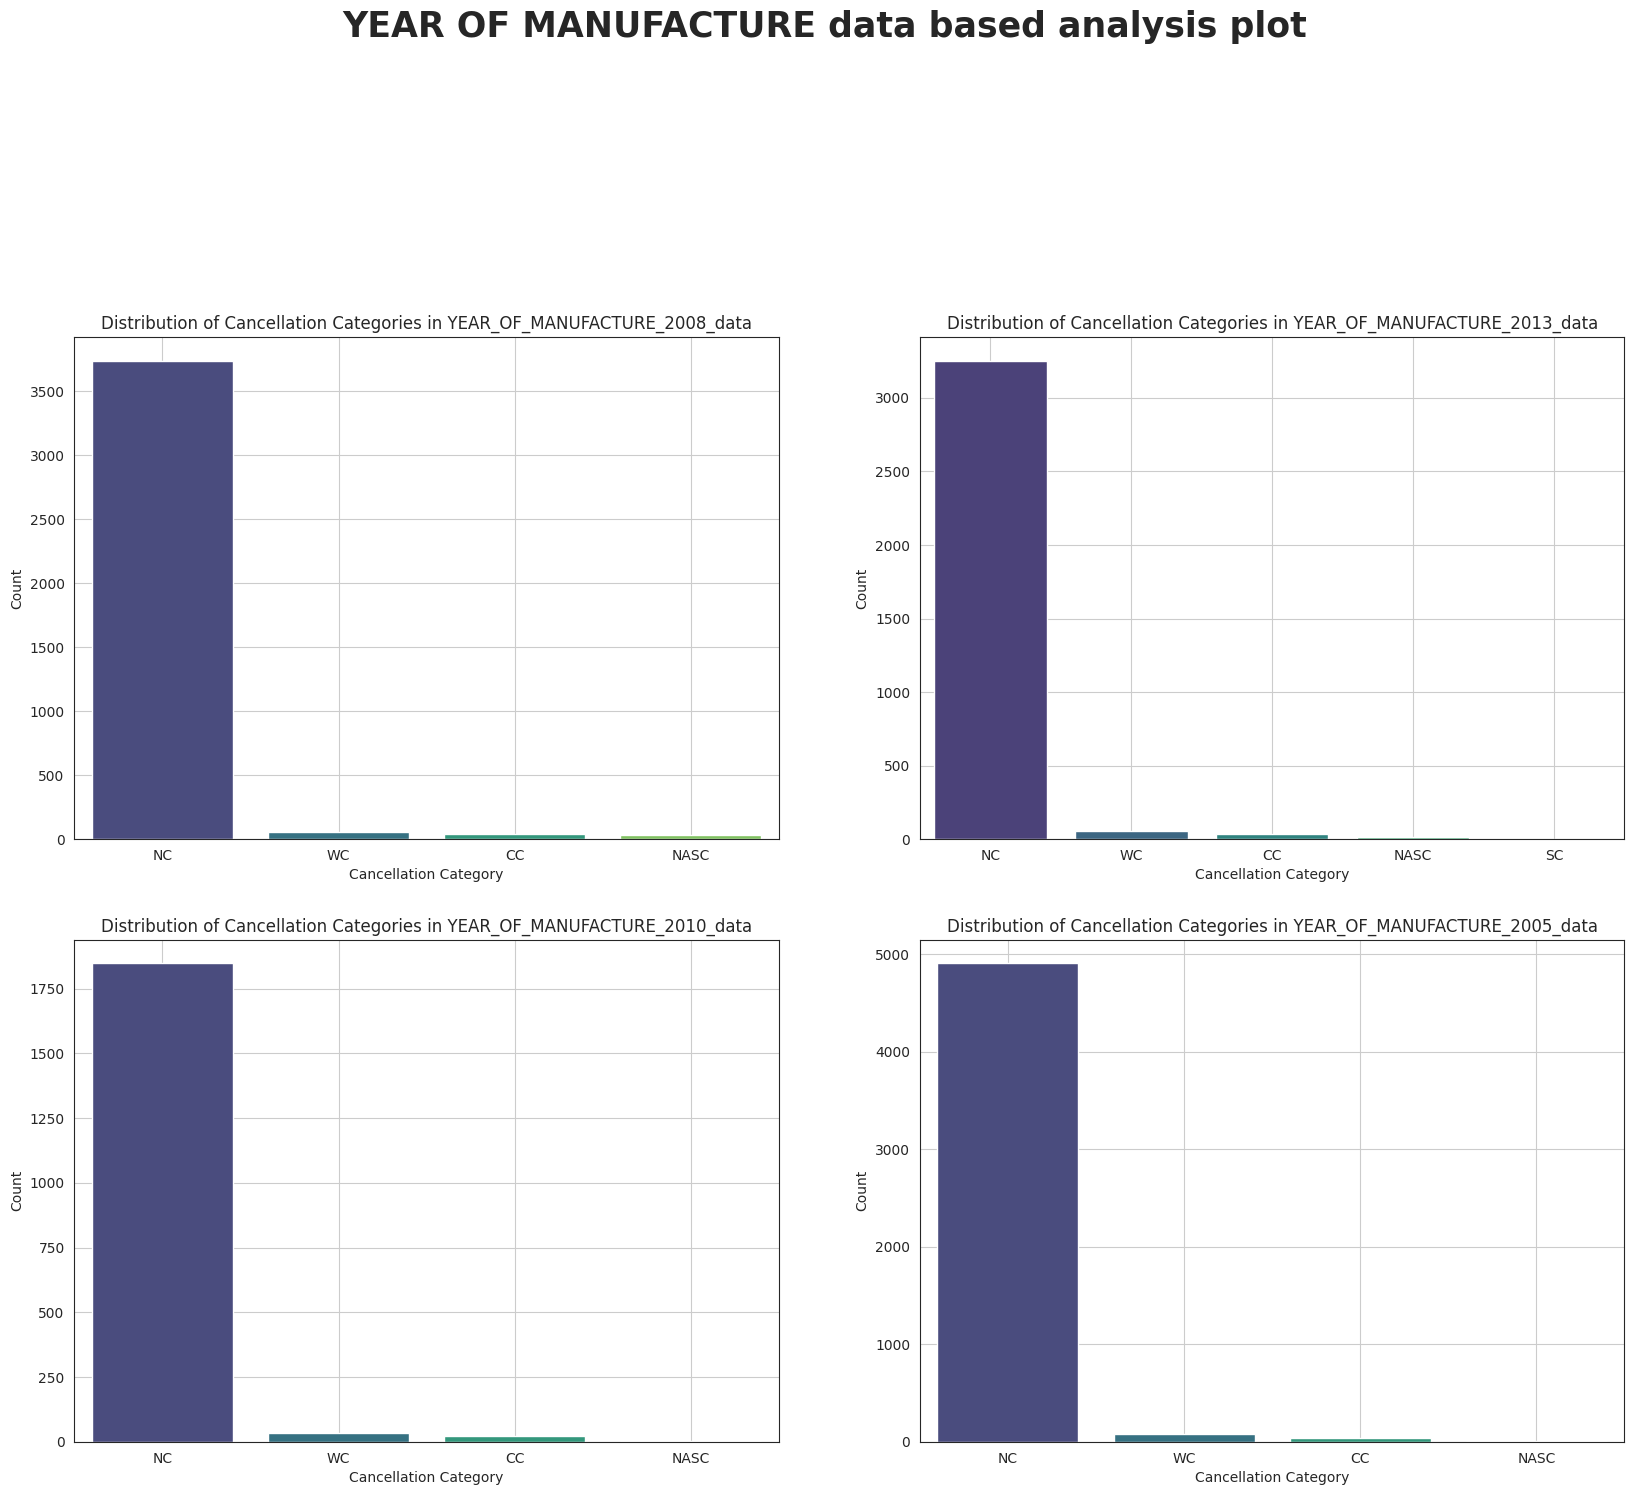

In [93]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("YEAR OF MANUFACTURE data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

YEAR_OF_MANUFACTURE_2008_data = sample_data[sample_data['YEAR OF MANUFACTURE'] == 2008]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = YEAR_OF_MANUFACTURE_2008_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in YEAR_OF_MANUFACTURE_2008_data')
plt.grid(True)


plt.subplot(4,2,2)

YEAR_OF_MANUFACTURE_2013_data = sample_data[sample_data['YEAR OF MANUFACTURE'] == 2013]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = YEAR_OF_MANUFACTURE_2013_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in YEAR_OF_MANUFACTURE_2013_data')
plt.grid(True)


plt.subplot(4,2,3)

YEAR_OF_MANUFACTURE_2010_data = sample_data[sample_data['YEAR OF MANUFACTURE'] == 2010]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = YEAR_OF_MANUFACTURE_2010_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in YEAR_OF_MANUFACTURE_2010_data')
plt.grid(True)


plt.subplot(4,2,4)

YEAR_OF_MANUFACTURE_2005_data = sample_data[sample_data['YEAR OF MANUFACTURE'] == 2005]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = YEAR_OF_MANUFACTURE_2005_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in YEAR_OF_MANUFACTURE_2005_data')
plt.grid(True)




plt.show()

**Observation:**
*The analysis does not reveal any significant connection between the year of manufacture and cancellation rate. The absence of a prominent relationship suggests that the year of manufacture may not substantially influence the occurrence of flight cancellations. *


<ipython-input-94-ff940797f75c>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MANUFACTURER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-94-ff940797f75c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MANUFACTURER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


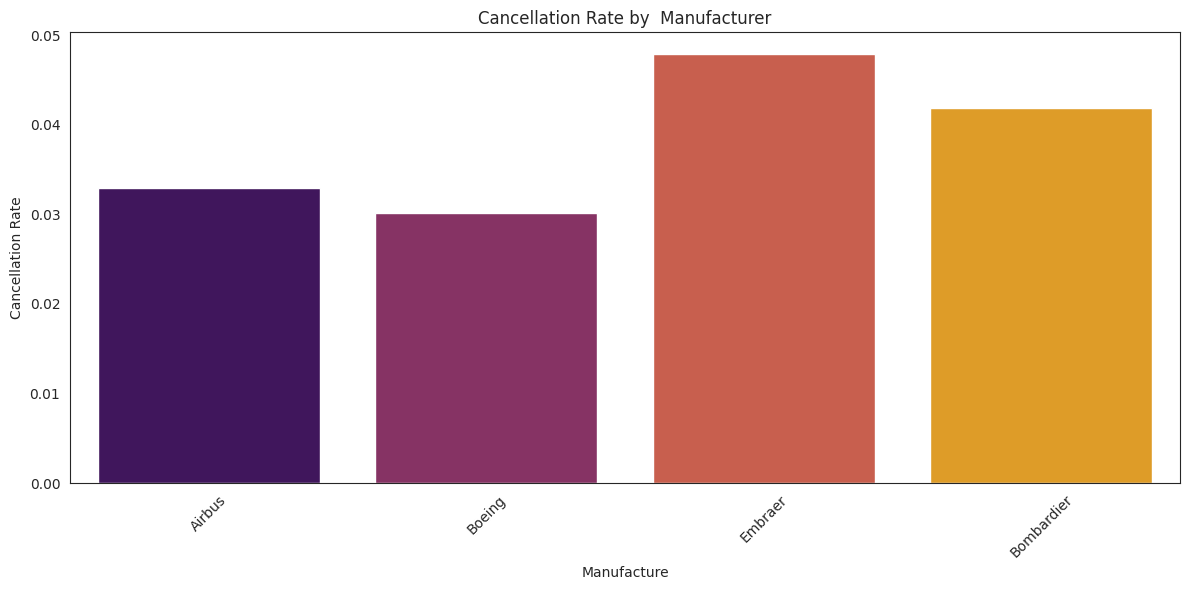

In [94]:
# Create a bar plot to show the distribution of cancellation categories for manufacturer
plt.figure(figsize=(12, 6))
sns.barplot(x='MANUFACTURER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('Manufacture')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-95-81a961355980>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-95-81a961355980>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-95-81a961355980>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-95-81a961355980>:98: FutureWarning: 

Passing `palette`

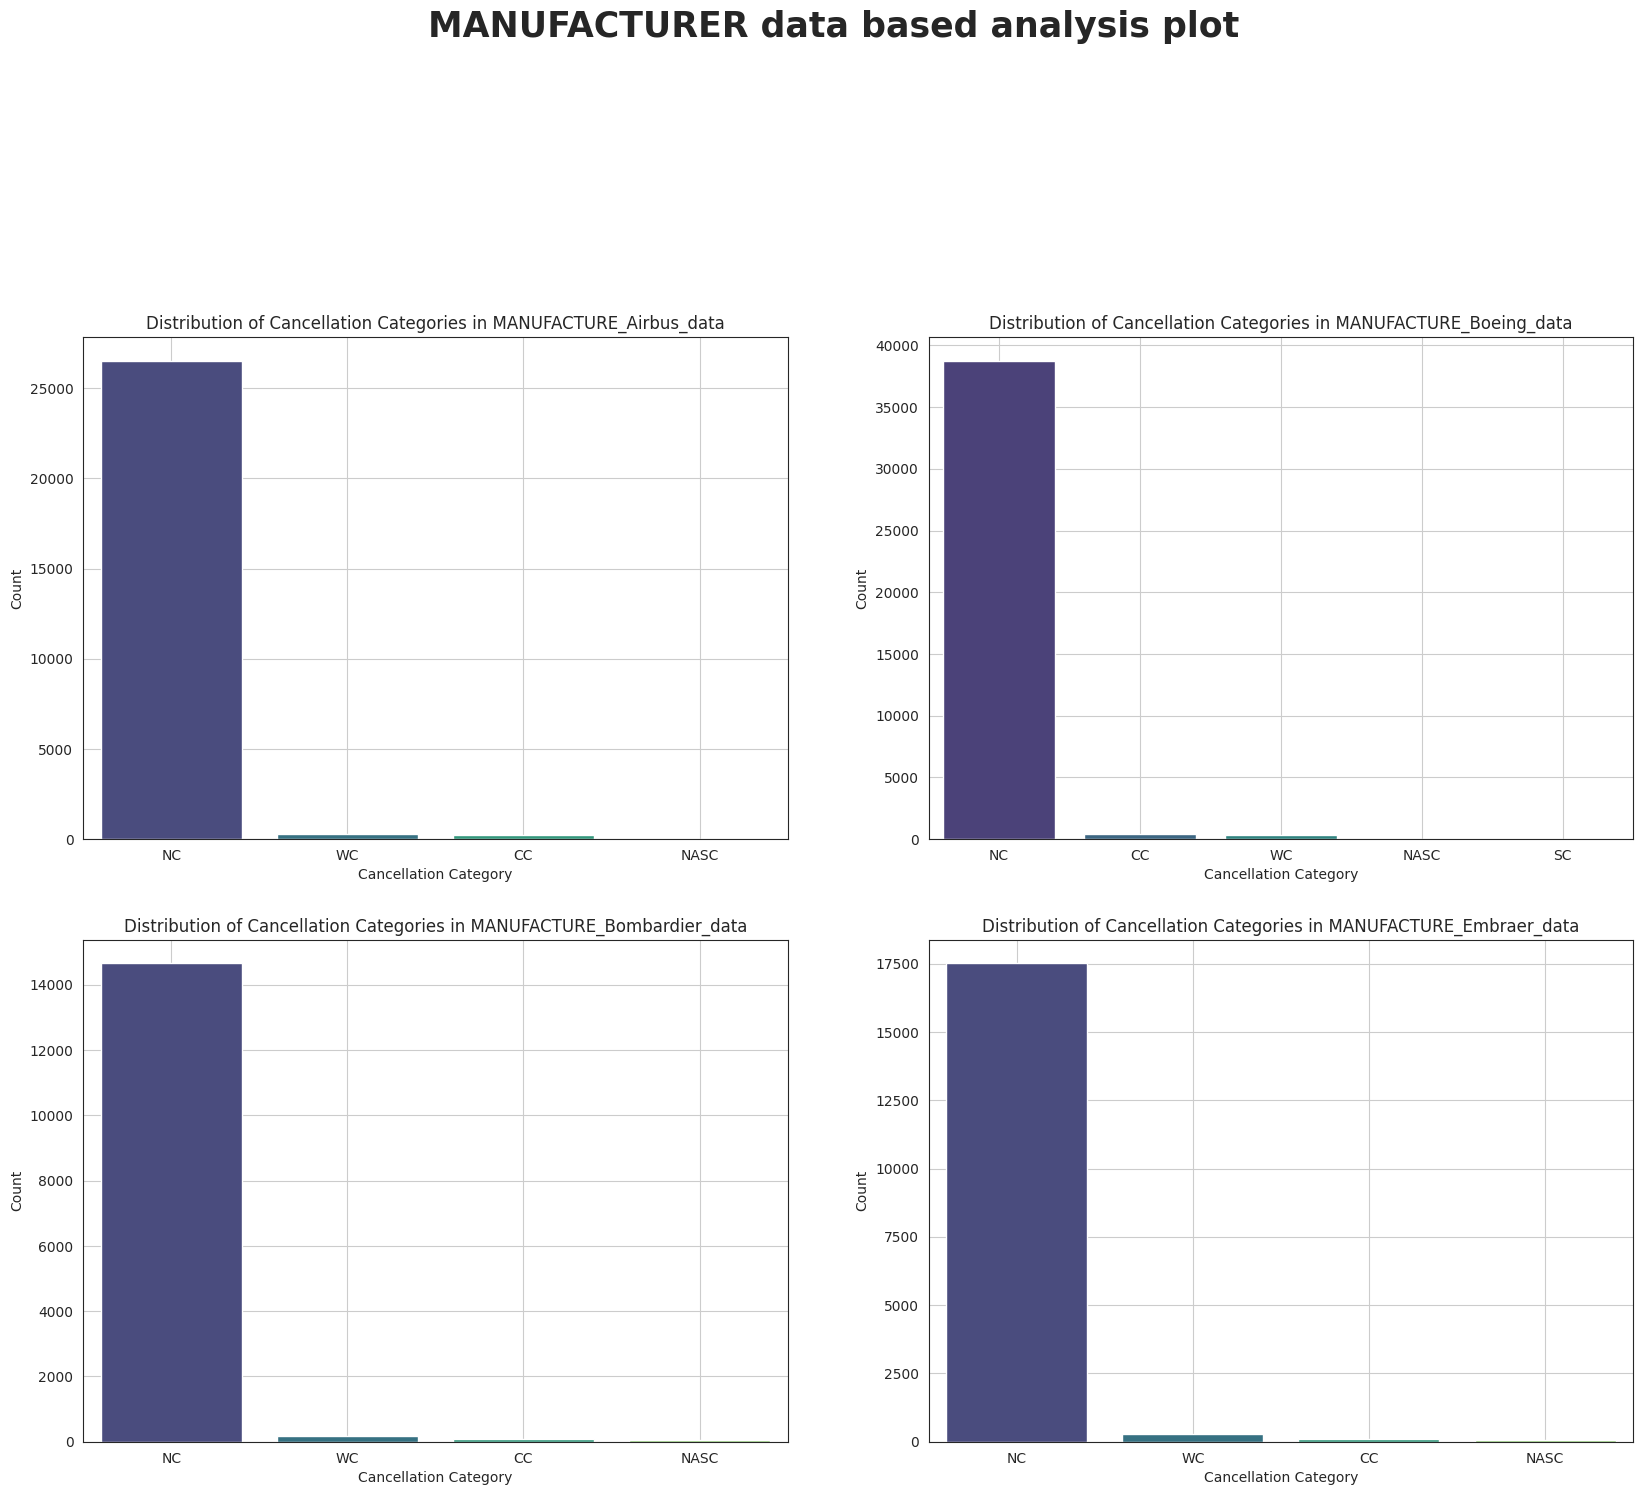

In [95]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("MANUFACTURER data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

MANUFACTURE_Airbus_data = sample_data[sample_data['MANUFACTURER'] == "Airbus"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MANUFACTURE_Airbus_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MANUFACTURE_Airbus_data')
plt.grid(True)


plt.subplot(4,2,2)

MANUFACTURE_Boeing_data = sample_data[sample_data['MANUFACTURER'] == 'Boeing']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MANUFACTURE_Boeing_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MANUFACTURE_Boeing_data')
plt.grid(True)


plt.subplot(4,2,3)

MANUFACTURE_Bombardier_data = sample_data[sample_data['MANUFACTURER'] == 'Bombardier']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MANUFACTURE_Bombardier_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MANUFACTURE_Bombardier_data')
plt.grid(True)


plt.subplot(4,2,4)

MANUFACTURE_Embraer_data = sample_data[sample_data['MANUFACTURER'] == 'Embraer']
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MANUFACTURE_Embraer_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MANUFACTURE_Embraer_data')
plt.grid(True)




plt.show()

**Observation:**
*No substantial correlation between manufacturer and cancellation rate is apparent in the analysis. The absence of a noteworthy relationship indicates that the manufacturer of an aircraft may not significantly impact the likelihood of flight cancellations.*

<ipython-input-96-898b4a914ee3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ICAO TYPE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-96-898b4a914ee3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ICAO TYPE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


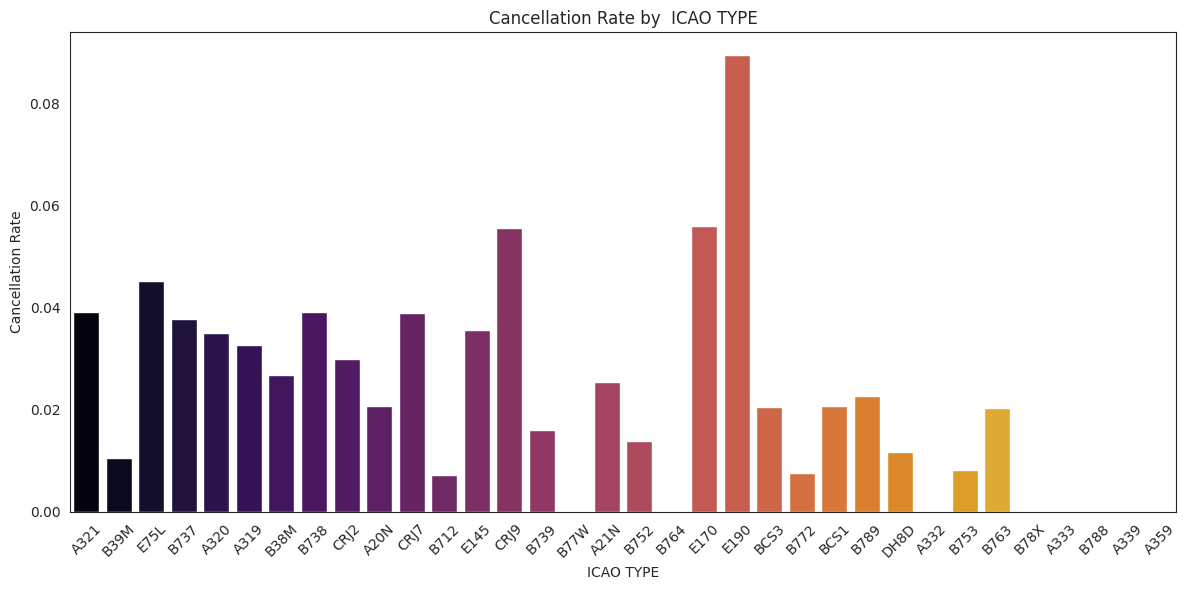

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x='ICAO TYPE', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('ICAO TYPE')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  ICAO TYPE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-97-d4edfc2adf37>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-97-d4edfc2adf37>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-97-d4edfc2adf37>:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-97-d4edfc2adf37>:97: FutureWarning: 

Passing `palette`

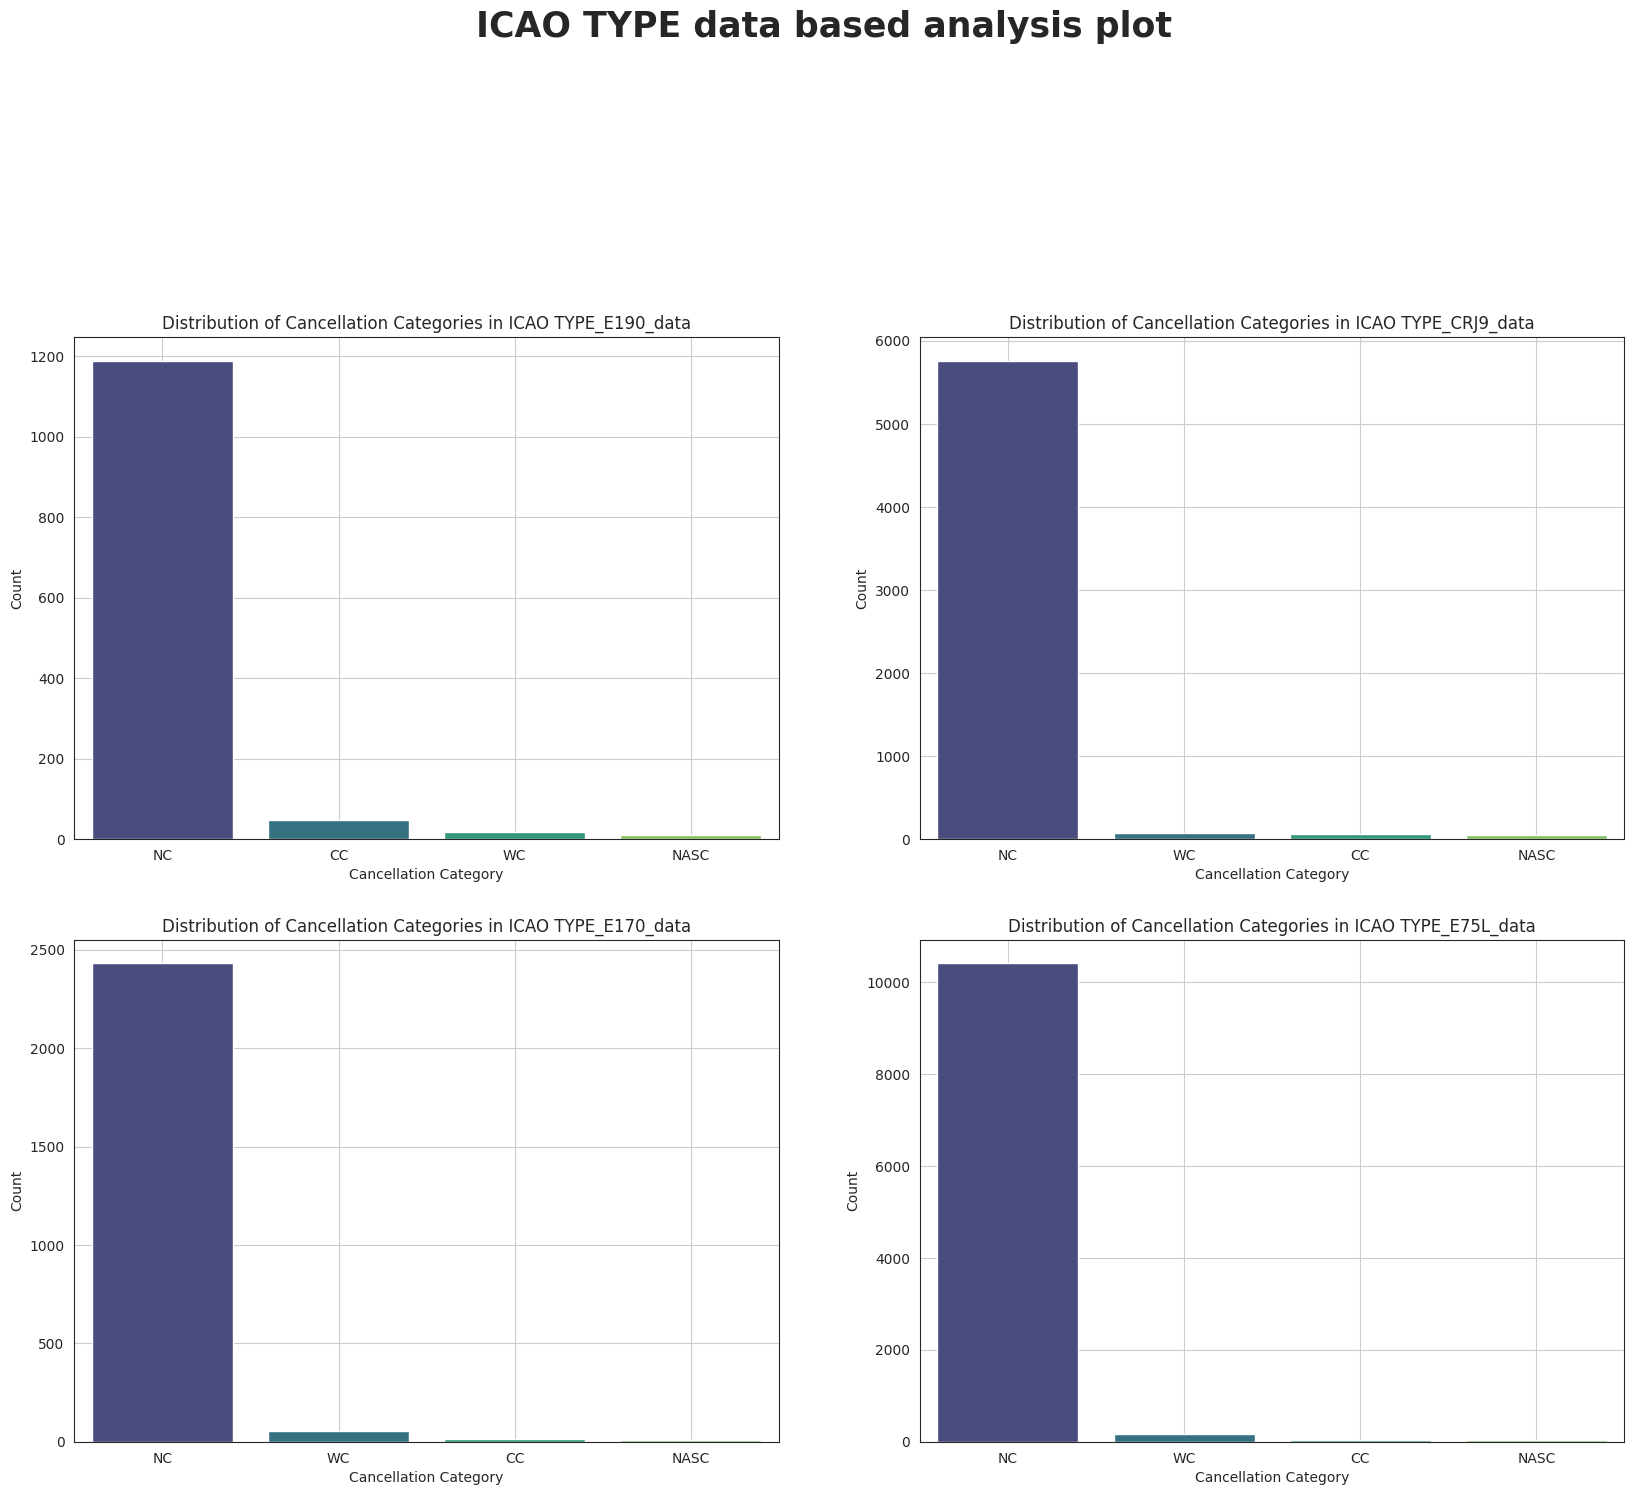

In [97]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("ICAO TYPE data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

ICAO_TYPE_E190_data = sample_data[sample_data['ICAO TYPE'] == "E190"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ICAO_TYPE_E190_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ICAO TYPE_E190_data')
plt.grid(True)


plt.subplot(4,2,2)

ICAO_TYPE_CRJ9_data = sample_data[sample_data['ICAO TYPE'] == "CRJ9"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ICAO_TYPE_CRJ9_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ICAO TYPE_CRJ9_data')
plt.grid(True)


plt.subplot(4,2,3)

ICAO_TYPE_E170_data = sample_data[sample_data['ICAO TYPE'] == "E170"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ICAO_TYPE_E170_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ICAO TYPE_E170_data')
plt.grid(True)

plt.subplot(4,2,4)

ICAO_TYPE_E75L_data = sample_data[sample_data['ICAO TYPE'] == "E75L"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ICAO_TYPE_E75L_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ICAO TYPE_E75L_data')
plt.grid(True)

plt.show()

**Observation:**
*The ICAO type E190 exhibits a higher cancellation rate compared to other types. Upon closer analysis, it becomes evident that there is a higher frequency of both carrier and weather-related cancellations associated with this type.*  

<ipython-input-79-e78c80d4cb57>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='RANGE', y='CANCELLED', data=sample_data, ci=None)


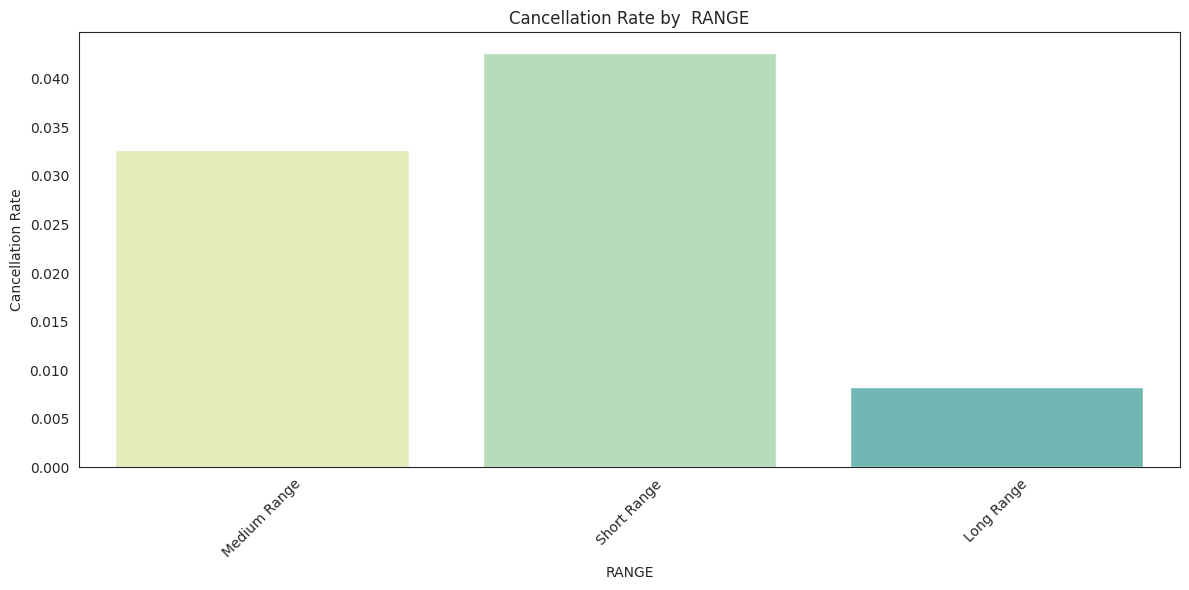

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='RANGE', y='CANCELLED', data=sample_data, ci=None)
plt.xlabel('RANGE')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  RANGE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [98]:
sample_data['RANGE'].unique()

array(['Medium Range', 'Short Range', 'Long Range'], dtype=object)

<ipython-input-99-3fe642b73410>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-99-3fe642b73410>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-99-3fe642b73410>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')


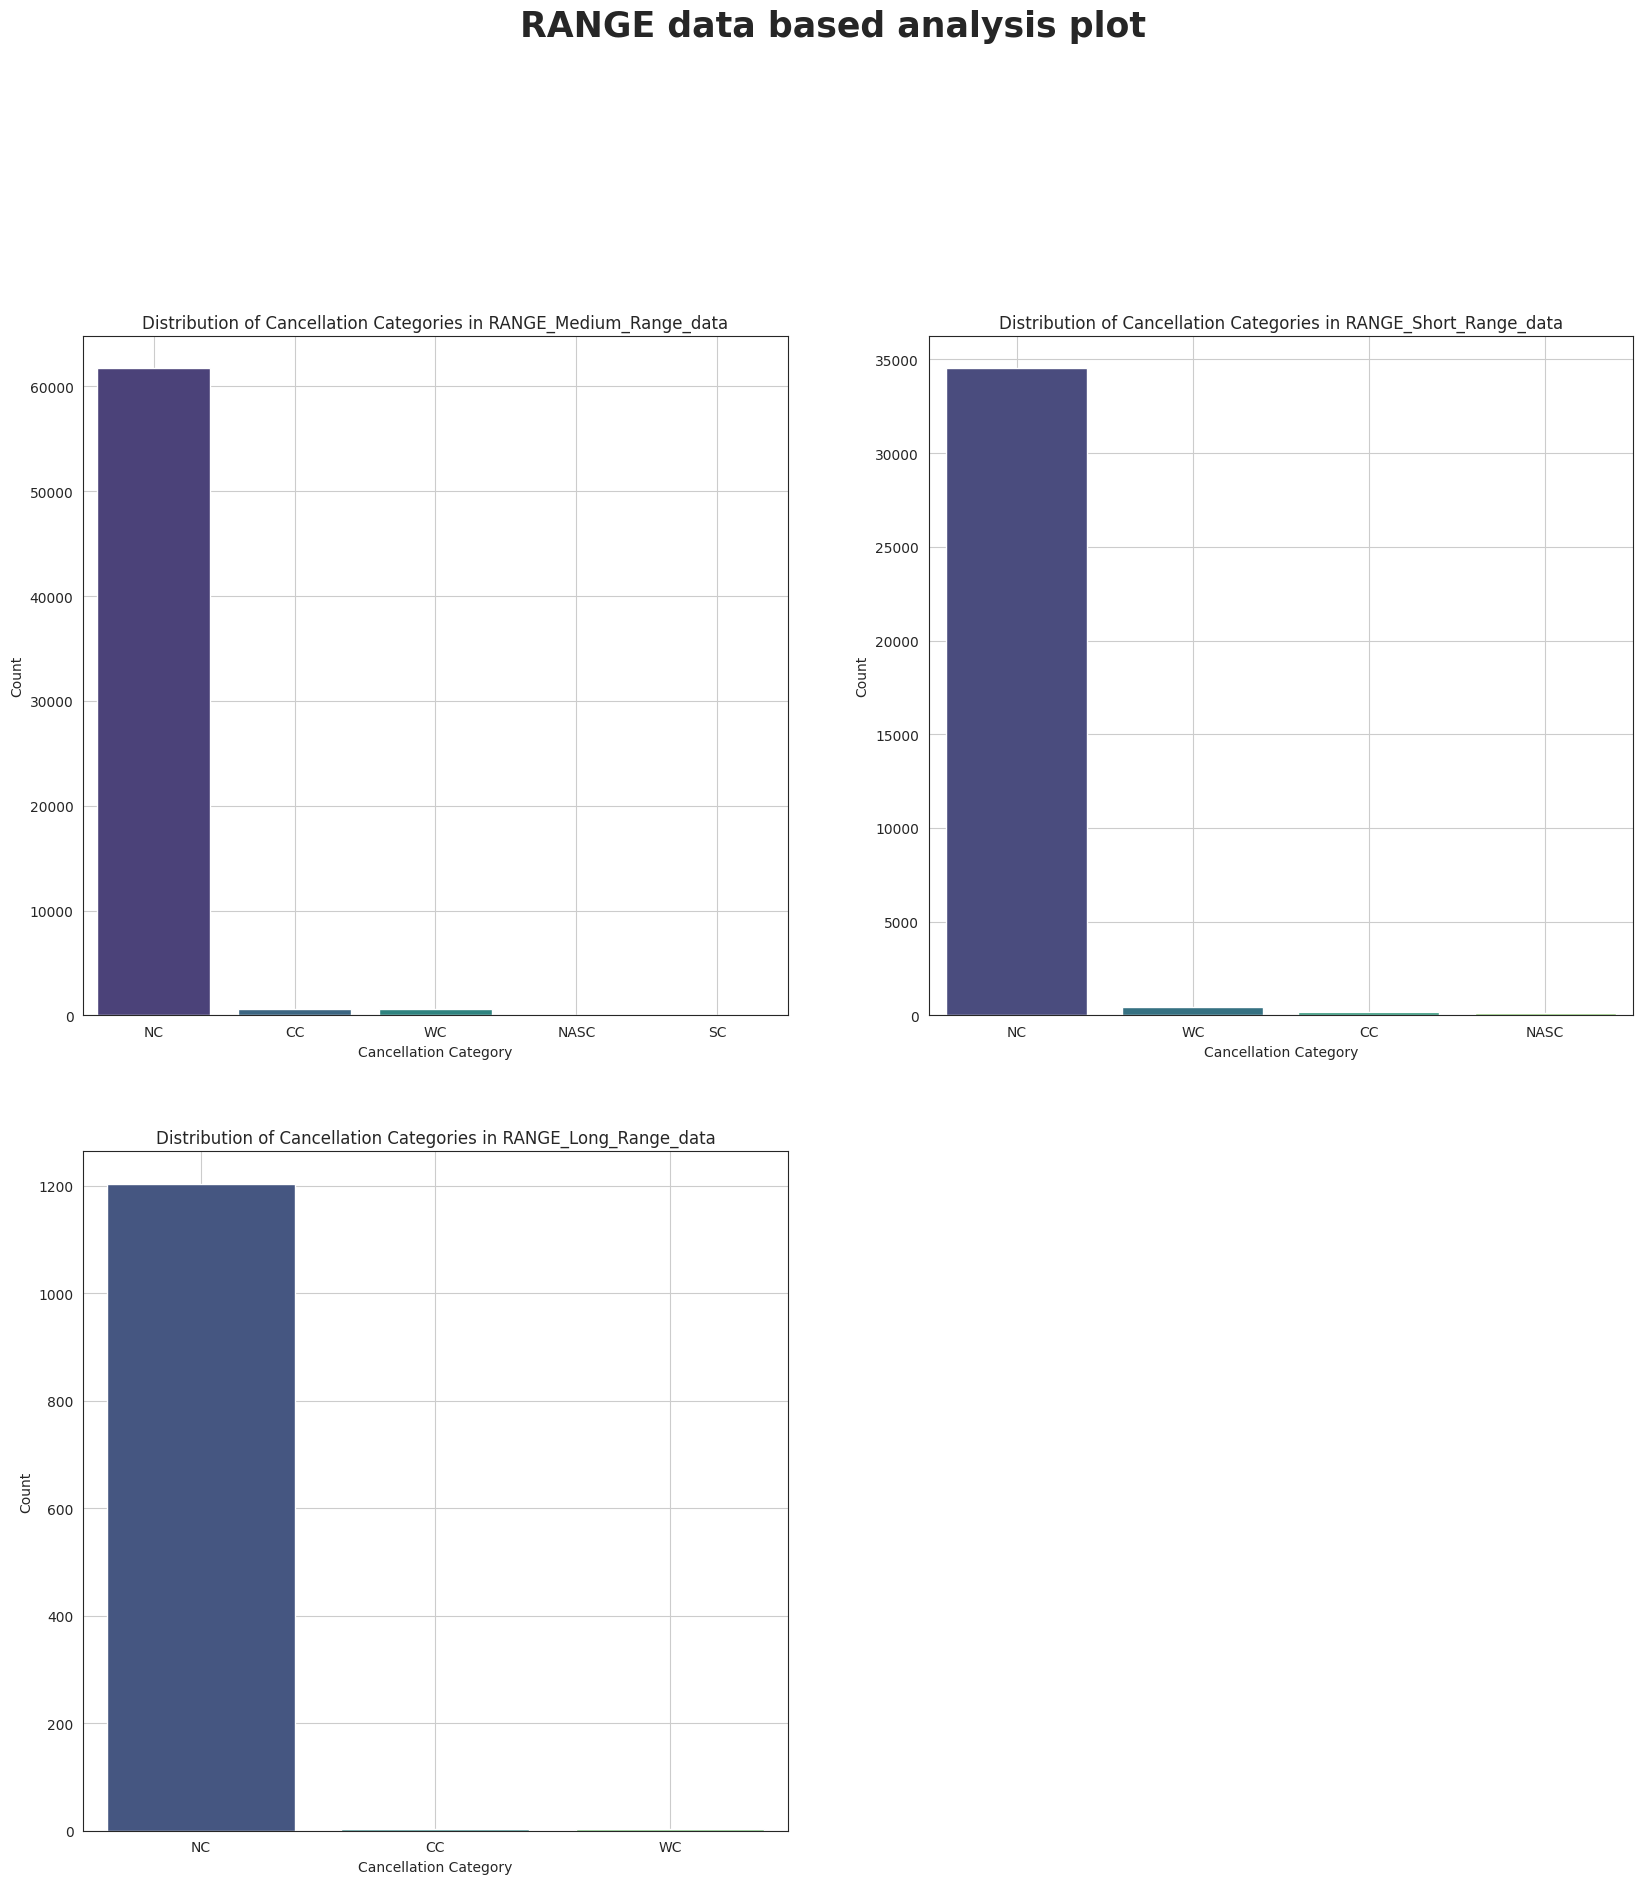

In [99]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("RANGE data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(3,2,1)

RANGE_Medium_Range_data = sample_data[sample_data['RANGE'] == "Medium Range"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = RANGE_Medium_Range_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in RANGE_Medium_Range_data')
plt.grid(True)


plt.subplot(3,2,2)

RANGE_Short_Range_data = sample_data[sample_data['RANGE'] == "Short Range"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = RANGE_Short_Range_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in RANGE_Short_Range_data')
plt.grid(True)

plt.subplot(3,2,3)

RANGE_Long_Range_data = sample_data[sample_data['RANGE'] == "Long Range"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = RANGE_Long_Range_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in RANGE_Long_Range_data')
plt.grid(True)
plt.show()

**Observation:**
*The analysis indicates that short-range flights exhibit a higher cancellation rate, followed by medium-range flights. Upon further investigation, it becomes apparent that both short and medium-range flights experience minimal weather and carrier-related cancellations. Intriguingly, long-range flights demonstrate no cancellations at all. This observation underscores the potential significance of flight range as a predictive factor for flight cancellations.*


<ipython-input-100-9d9602ec284c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WIDTH', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-100-9d9602ec284c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WIDTH', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


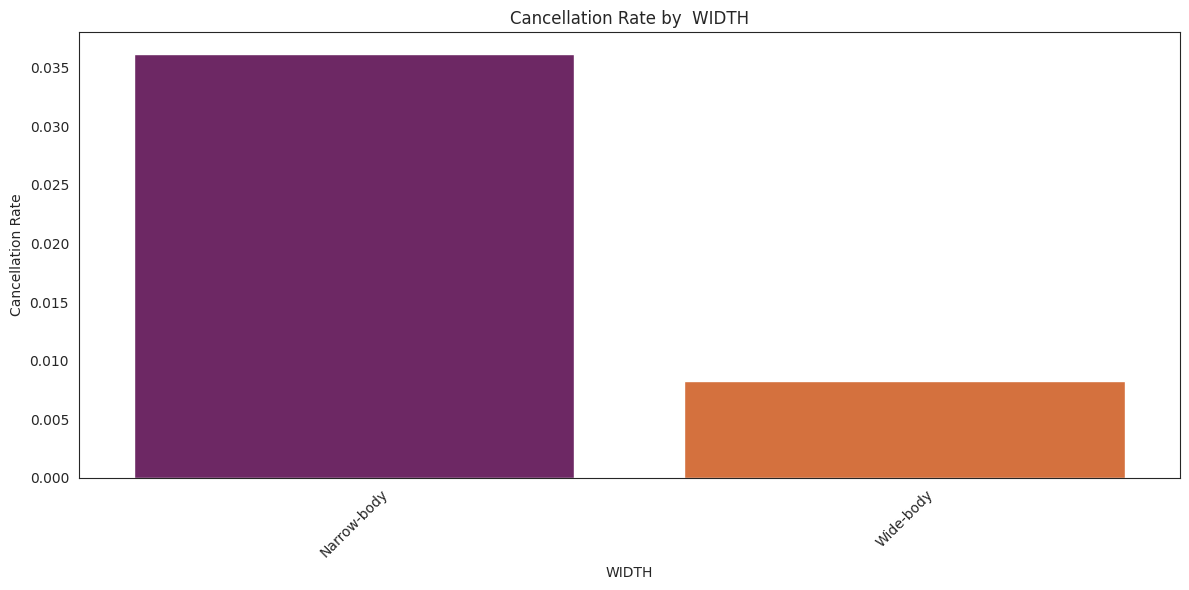

In [100]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WIDTH', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('WIDTH')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  WIDTH')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [101]:
sample_data['WIDTH'].unique()

array(['Narrow-body', 'Wide-body'], dtype=object)

<ipython-input-102-1db9635603c8>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-102-1db9635603c8>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')


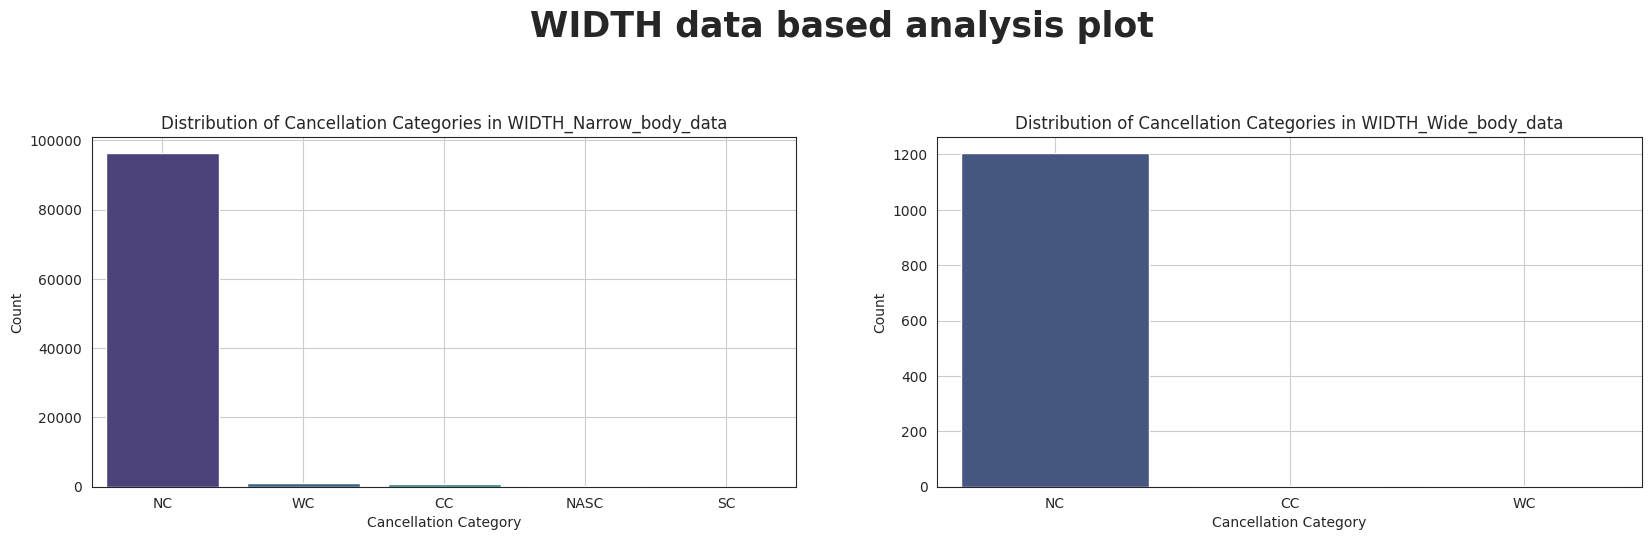

In [102]:
fig=plt.figure(figsize=(20,10))
plt.suptitle("WIDTH data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(2,2,1)

WIDTH_Narrow_body_data = sample_data[sample_data['WIDTH'] == "Narrow-body"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = WIDTH_Narrow_body_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in WIDTH_Narrow_body_data')
plt.grid(True)


plt.subplot(2,2,2)

WIDTH_Wide_body_data = sample_data[sample_data['WIDTH'] == "Wide-body"]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = WIDTH_Wide_body_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in WIDTH_Wide_body_data')
plt.grid(True)
plt.show()

**Observation:**
*Upon analyzing flight width against cancellation rates, it becomes evident that narrow-body flights exhibit higher cancellation rates compared to wide-body ones. A closer inspection reveals that narrow-body flights experience minimal weather and carrier-related cancellations, whereas wide-body flights have no cancellations attributed to these factors. This distinction might serve as a potential factor for flight cancellation prediction, emphasizing the relevance of flight width in predicting cancellations.*

<ipython-input-104-9a91f007b3fe>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WIND_DIR', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-104-9a91f007b3fe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WIND_DIR', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


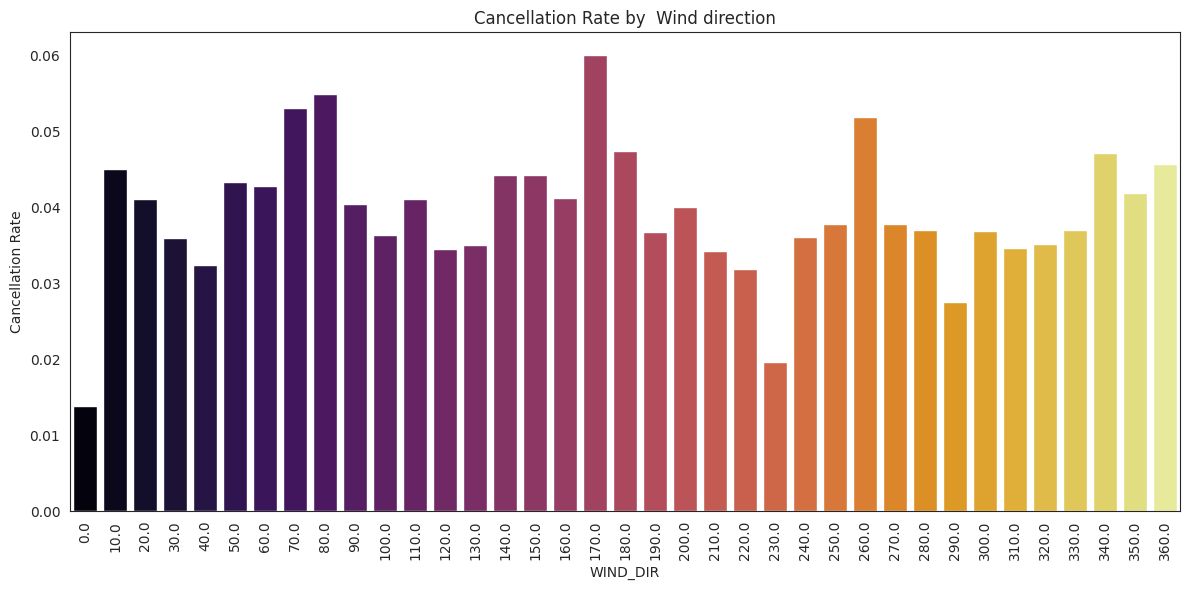

In [104]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WIND_DIR', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('WIND_DIR')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  Wind direction')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-105-e100920e6cc5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-105-e100920e6cc5>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-105-e100920e6cc5>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-105-e100920e6cc5>:100: FutureWarning: 

Passing `pal

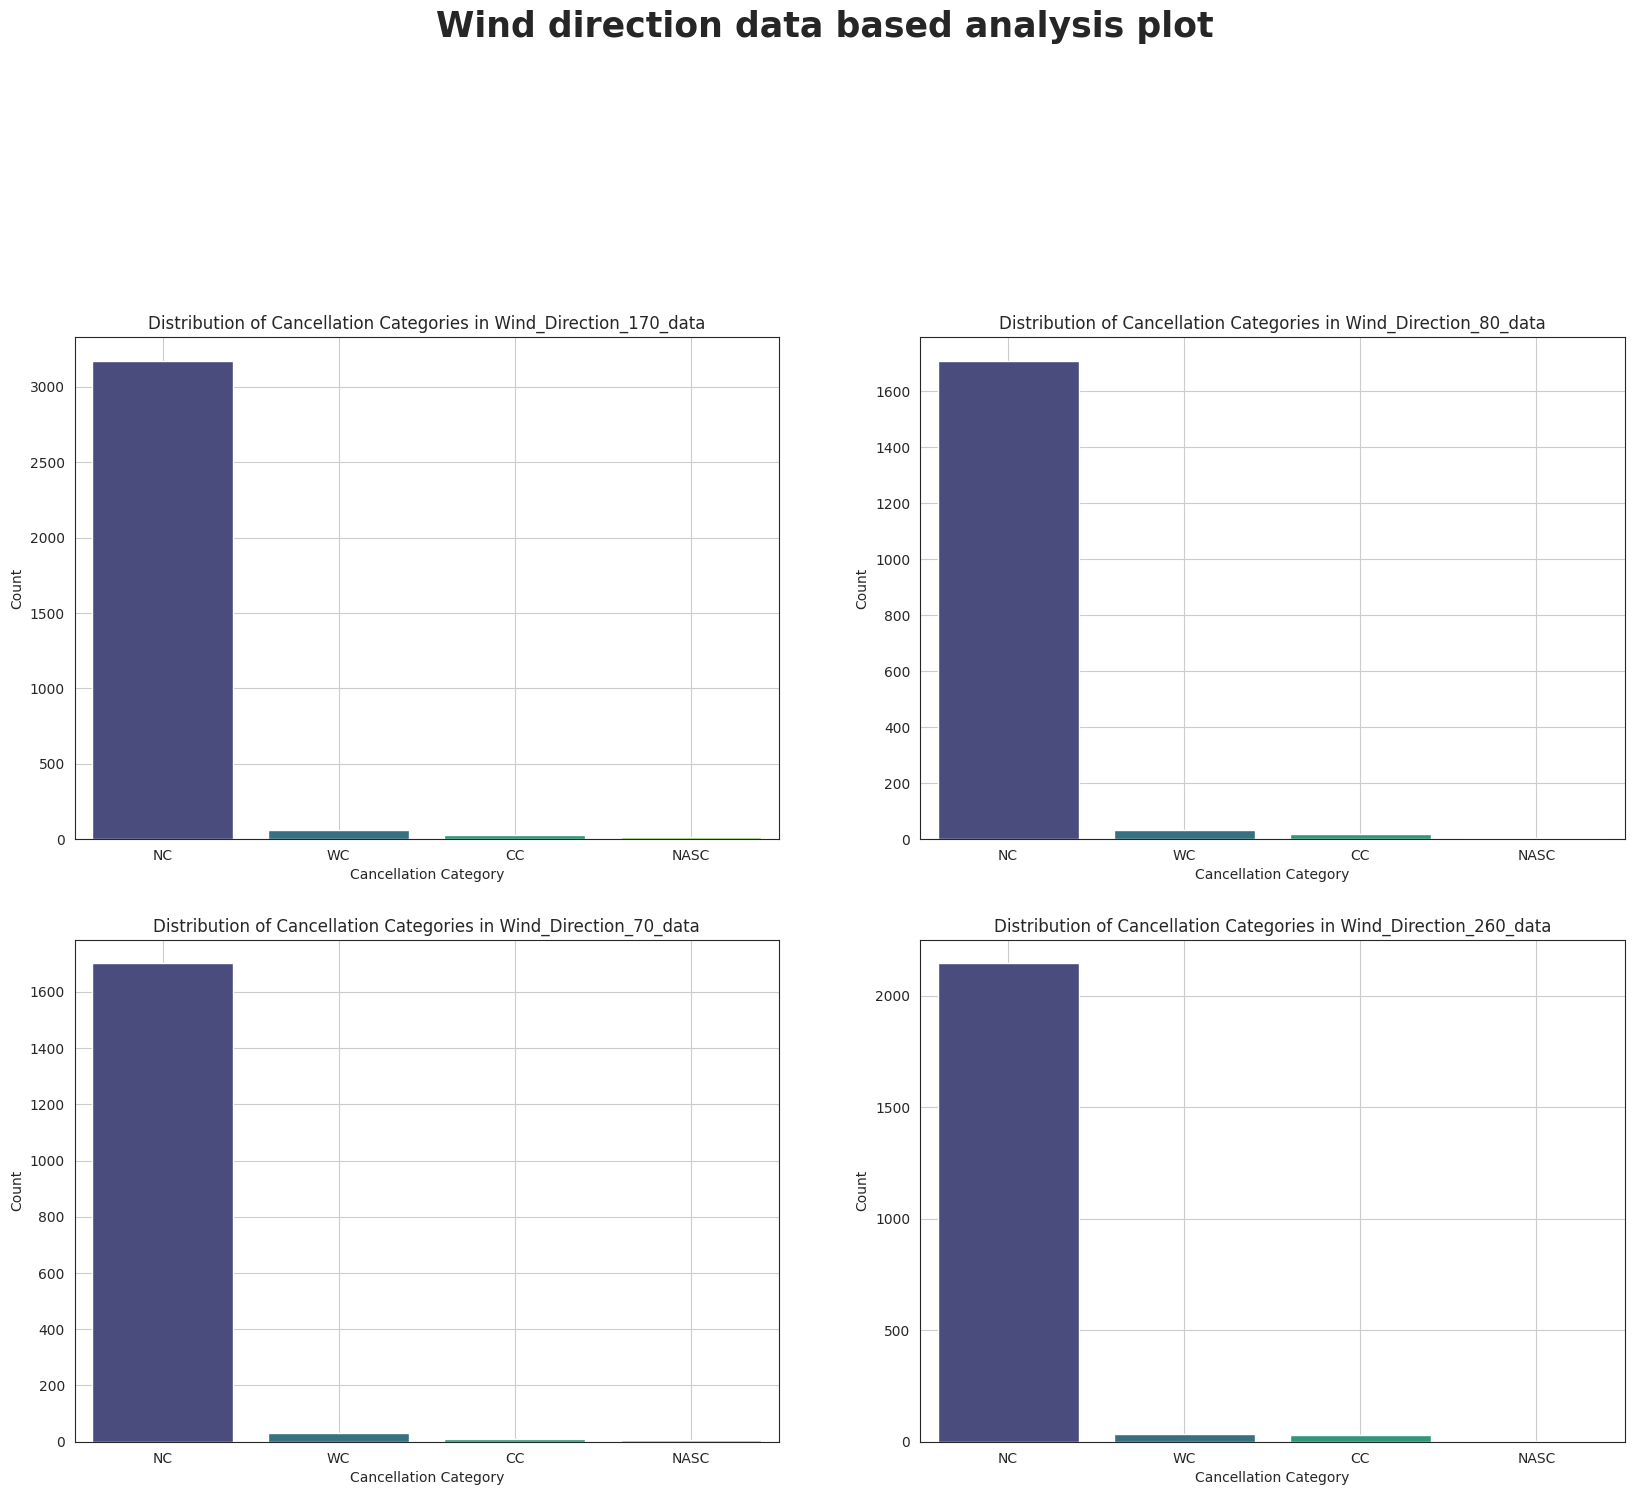

In [105]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("Wind direction data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

Wind_Direction_170_data = sample_data[sample_data['WIND_DIR'] == 170.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Direction_170_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Direction_170_data')
plt.grid(True)


plt.subplot(4,2,2)

Wind_Direction_80_data = sample_data[sample_data['WIND_DIR'] == 80.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Direction_80_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Direction_80_data')
plt.grid(True)



plt.subplot(4,2,3)

Wind_Direction_70_data = sample_data[sample_data['WIND_DIR'] == 70.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Direction_70_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Direction_70_data')
plt.grid(True)



plt.subplot(4,2,4)

Wind_Direction_260_data = sample_data[sample_data['WIND_DIR'] == 260.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Direction_260_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Direction_260_data')
plt.grid(True)

plt.show()

**Observation:**
*A substantial correlation between wind direction and cancellation rate is not discernible in the analysis. The absence of a significant relationship suggests that wind direction may not be a primary factor influencing flight cancellations, emphasizing the need for further exploration to understand its limited impact on cancellation patterns.*

<ipython-input-107-c99a288d18ab>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WIND_SPD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-107-c99a288d18ab>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WIND_SPD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


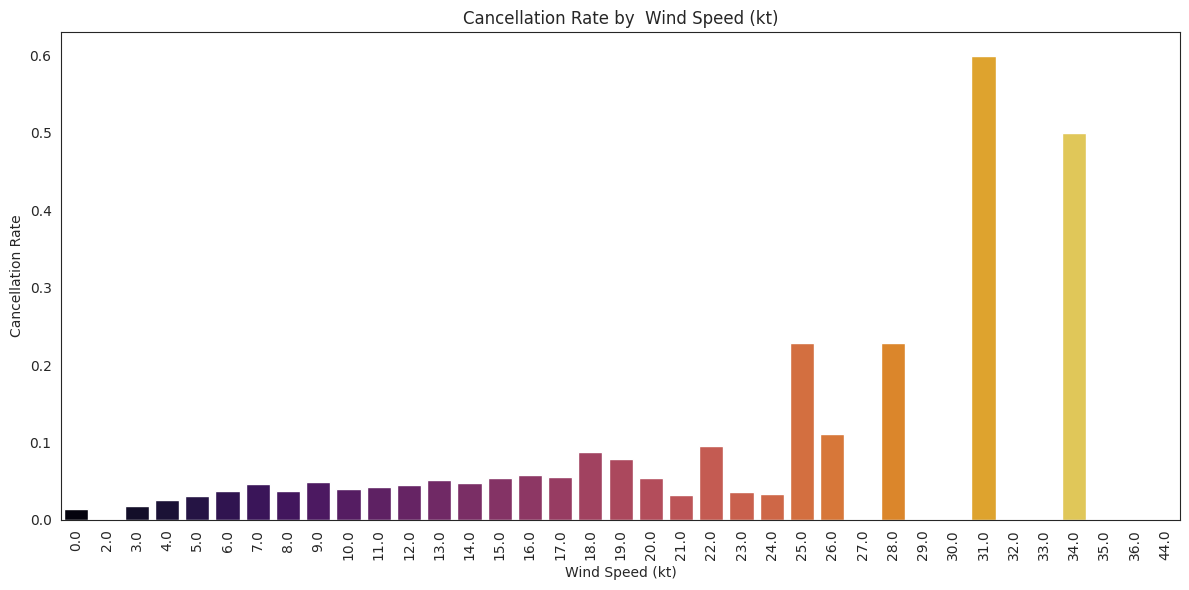

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WIND_SPD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('Wind Speed (kt)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  Wind Speed (kt)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-108-8842579d52a5>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-108-8842579d52a5>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-108-8842579d52a5>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-108-8842579d52a5>:99: FutureWarning: 

Passing `pale

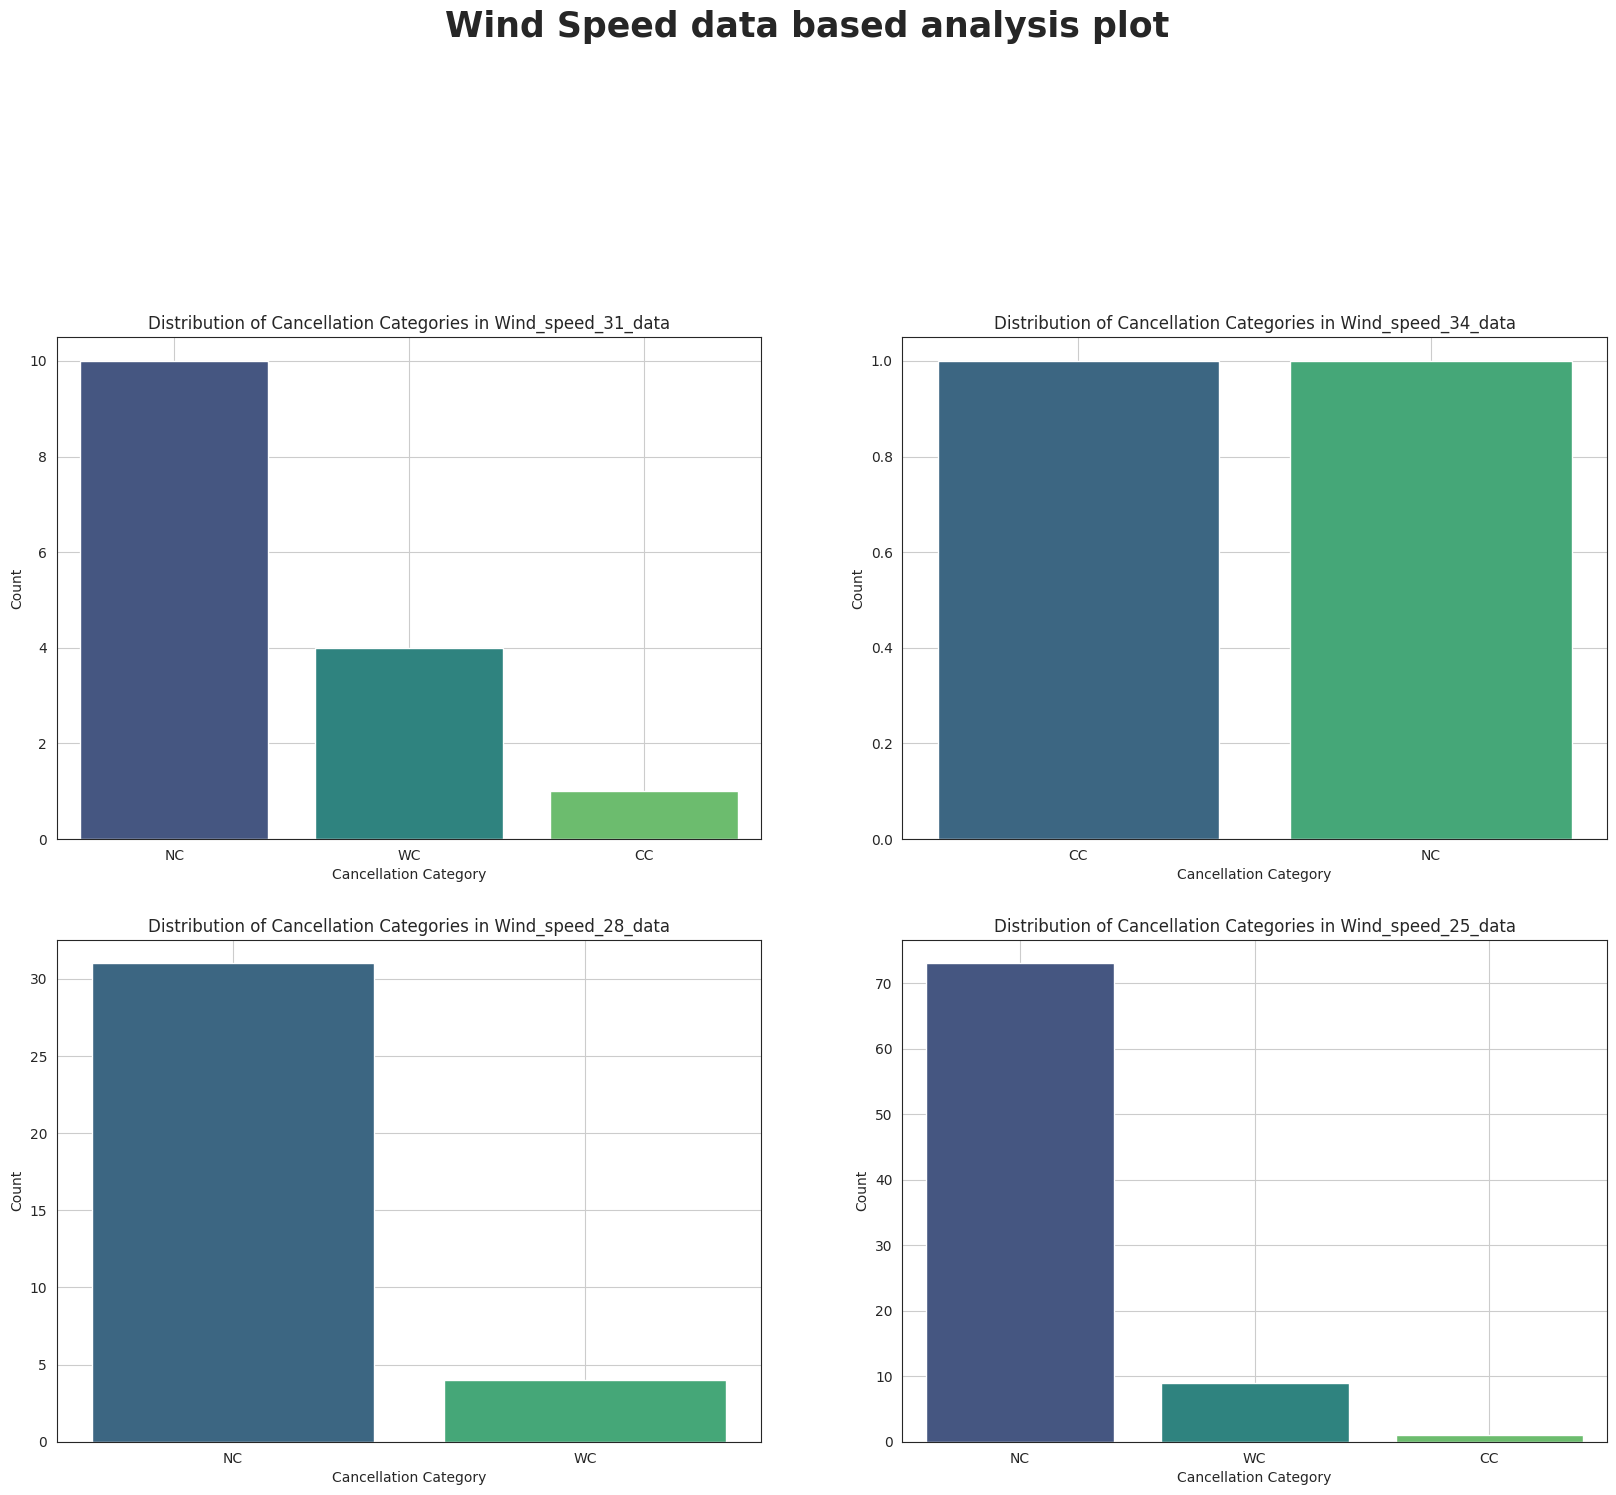

In [108]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("Wind Speed data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

Wind_speed_31_data = sample_data[sample_data['WIND_SPD'] == 31.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_speed_31_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_speed_31_data')
plt.grid(True)


plt.subplot(4,2,2)

Wind_speed_34_data = sample_data[sample_data['WIND_SPD'] == 34.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_speed_34_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_speed_34_data')
plt.grid(True)



plt.subplot(4,2,3)

Wind_speed_28_data = sample_data[sample_data['WIND_SPD'] == 28.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_speed_28_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_speed_28_data')
plt.grid(True)


plt.subplot(4,2,4)

Wind_speed_25_data = sample_data[sample_data['WIND_SPD'] == 25.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_speed_25_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_speed_25_data')
plt.grid(True)

plt.show()

**Observation:**
*As wind speed escalates, the flight cancellation rate displays a corresponding increase. Detailed examination across various cancellation categories reveals a noteworthy surge in both carrier and weather-related cancellations in tandem with rising wind speeds. This observation underscores the substantial impact of wind conditions on flight cancellations, particularly in relation to carrier and weather-related factors.*


<ipython-input-109-da0481e49b0c>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='WIND_GUST', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-109-da0481e49b0c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='WIND_GUST', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


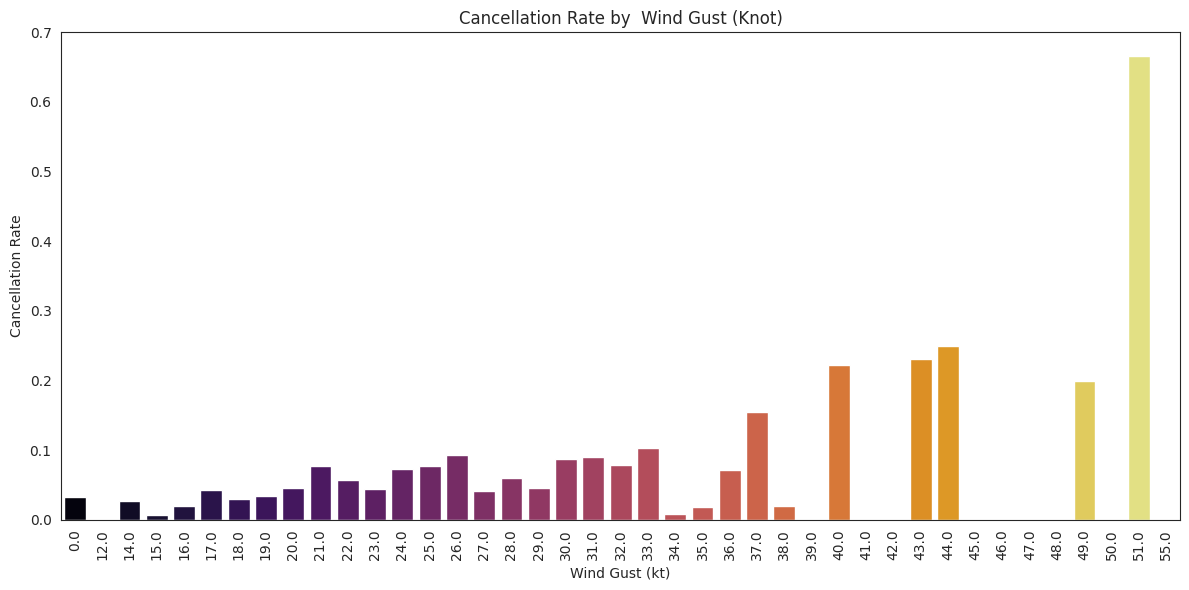

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(x='WIND_GUST', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('Wind Gust (kt)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  Wind Gust (Knot)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-110-ca20c02cbd63>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-110-ca20c02cbd63>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-110-ca20c02cbd63>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-110-ca20c02cbd63>:99: FutureWarning: 

Passing `pale

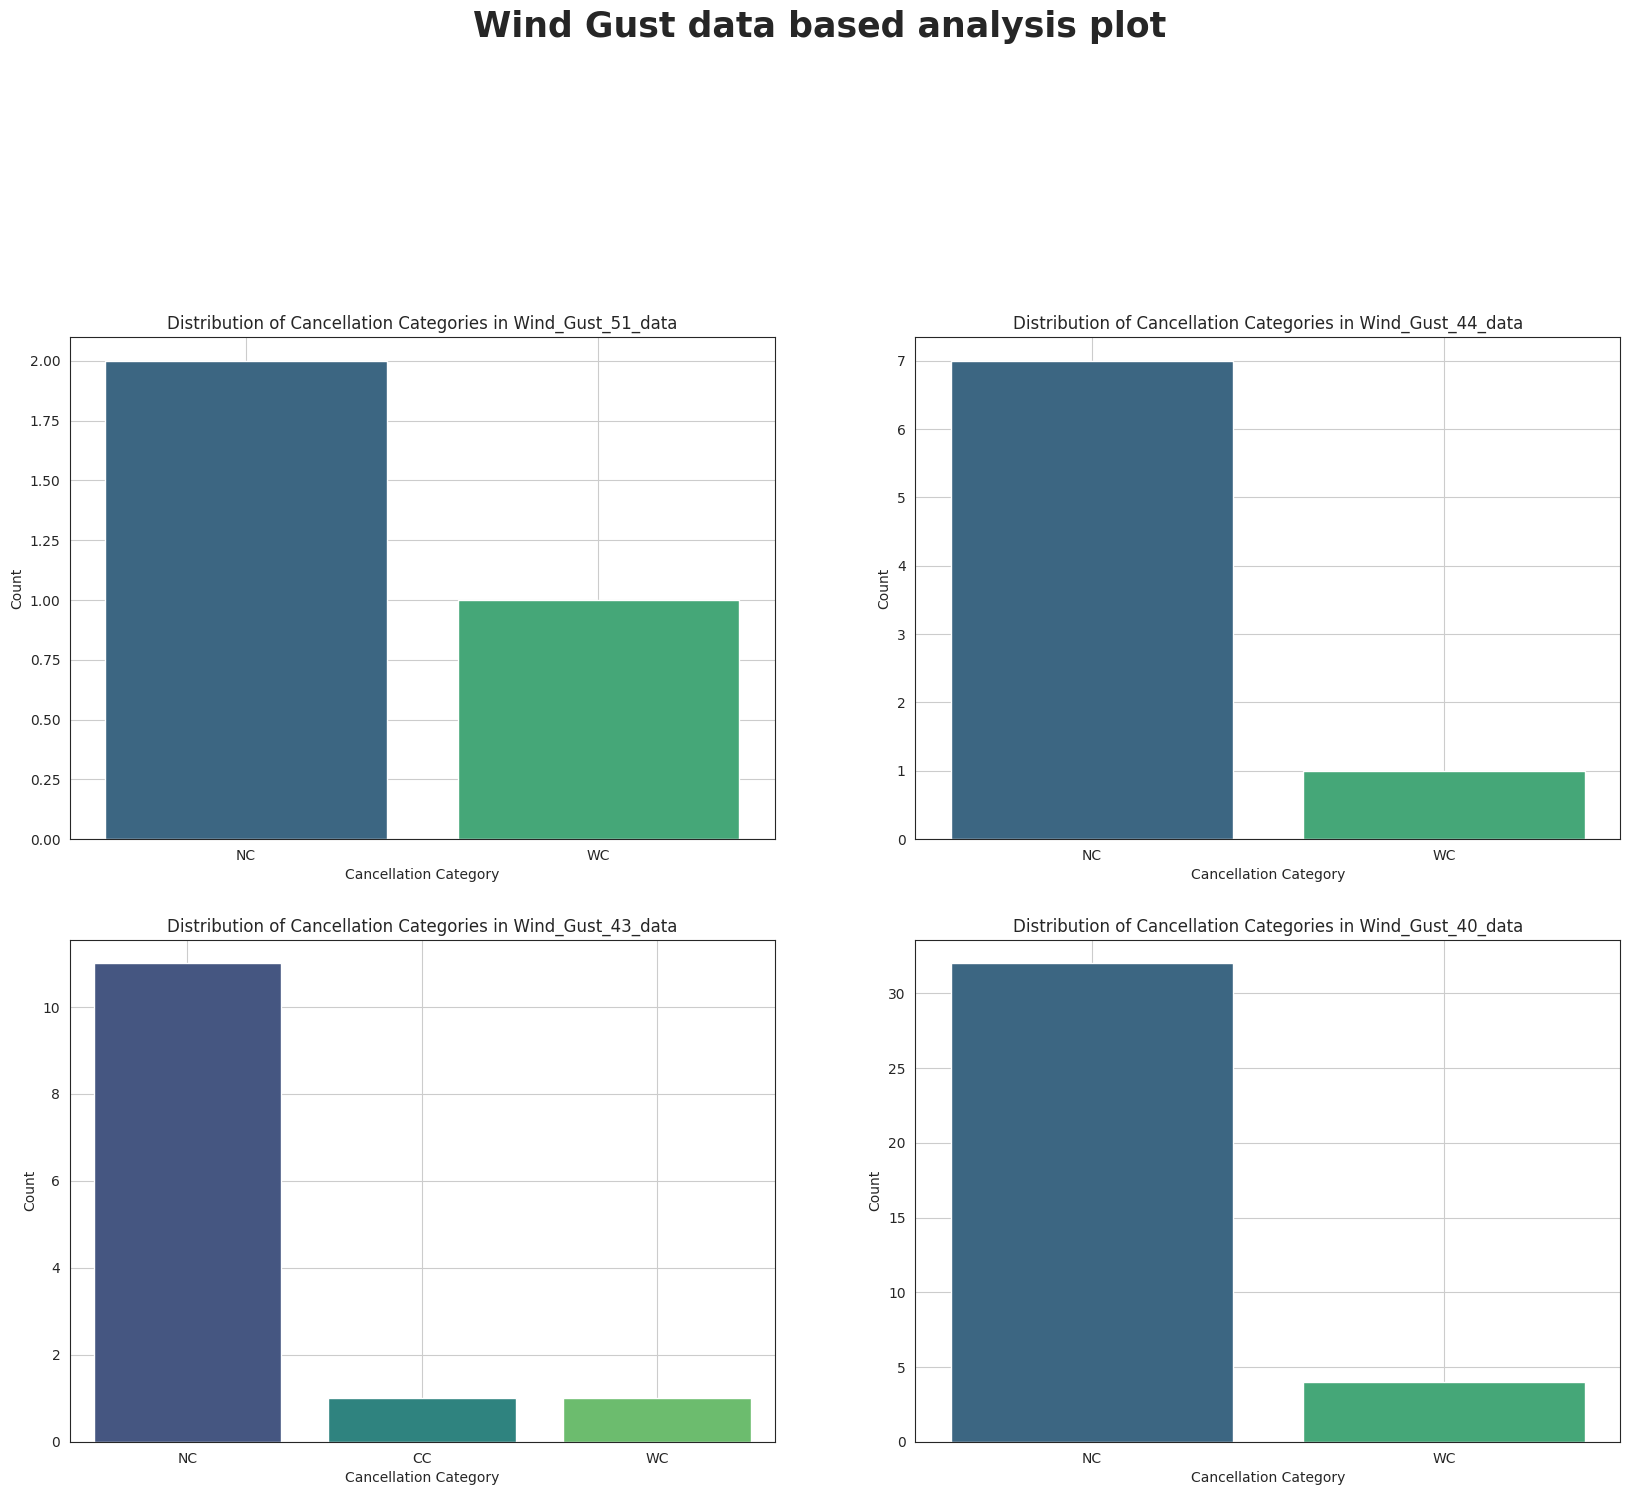

In [110]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("Wind Gust data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

Wind_Gust_51_data = sample_data[sample_data['WIND_GUST'] == 51.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Gust_51_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Gust_51_data')
plt.grid(True)


plt.subplot(4,2,2)

Wind_Gust_44_data = sample_data[sample_data['WIND_GUST'] == 44.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Gust_44_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Gust_44_data')
plt.grid(True)



plt.subplot(4,2,3)

Wind_Gust_43_data = sample_data[sample_data['WIND_GUST'] == 43.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Gust_43_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Gust_43_data')
plt.grid(True)


plt.subplot(4,2,4)

Wind_Gust_40_data = sample_data[sample_data['WIND_GUST'] == 40.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = Wind_Gust_40_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in Wind_Gust_40_data')
plt.grid(True)

plt.show()

**Observation:**
*An incremental surge in cancellation rates corresponds to escalating wind gusts. Upon deeper analysis, a substantial correlation is established between heightened wind gusts and increased occurrences of weather-related cancellations. This finding underscores the influential role of wind conditions in flight cancellations, underscoring the significance of wind-related factors in aviation operations.*

<ipython-input-111-4ce8f53a6bf8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='VISIBILITY', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-111-4ce8f53a6bf8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VISIBILITY', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


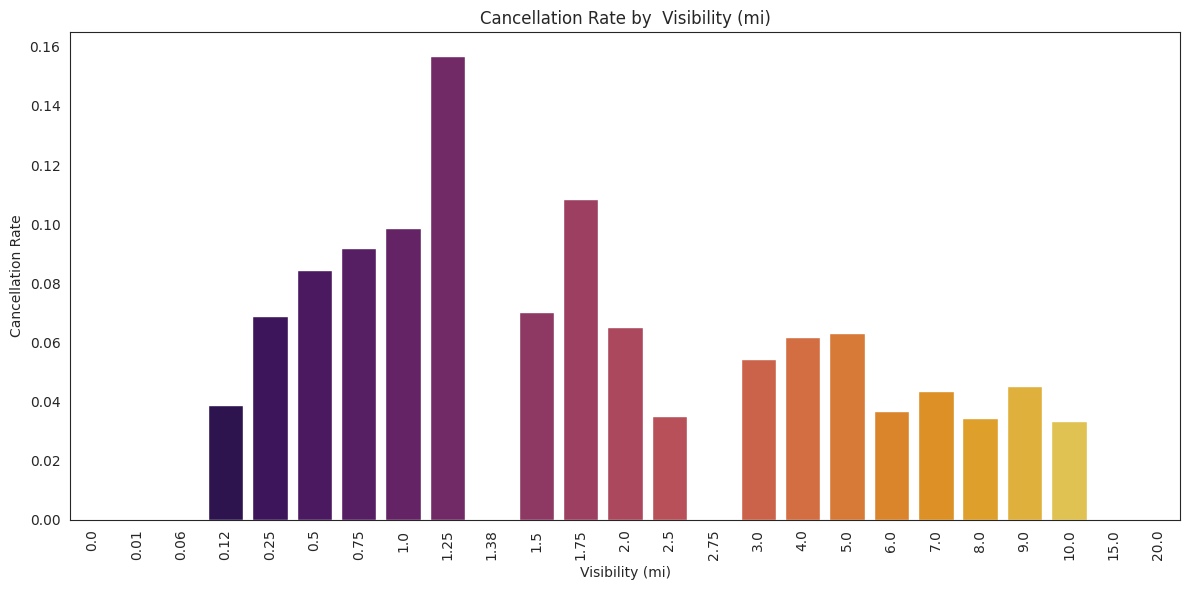

In [111]:
plt.figure(figsize=(12, 6))
sns.barplot(x='VISIBILITY', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('Visibility (mi)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  Visibility (mi)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-112-945f1411743b>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-112-945f1411743b>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-112-945f1411743b>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-112-945f1411743b>:99: FutureWarning: 

Passing `pale

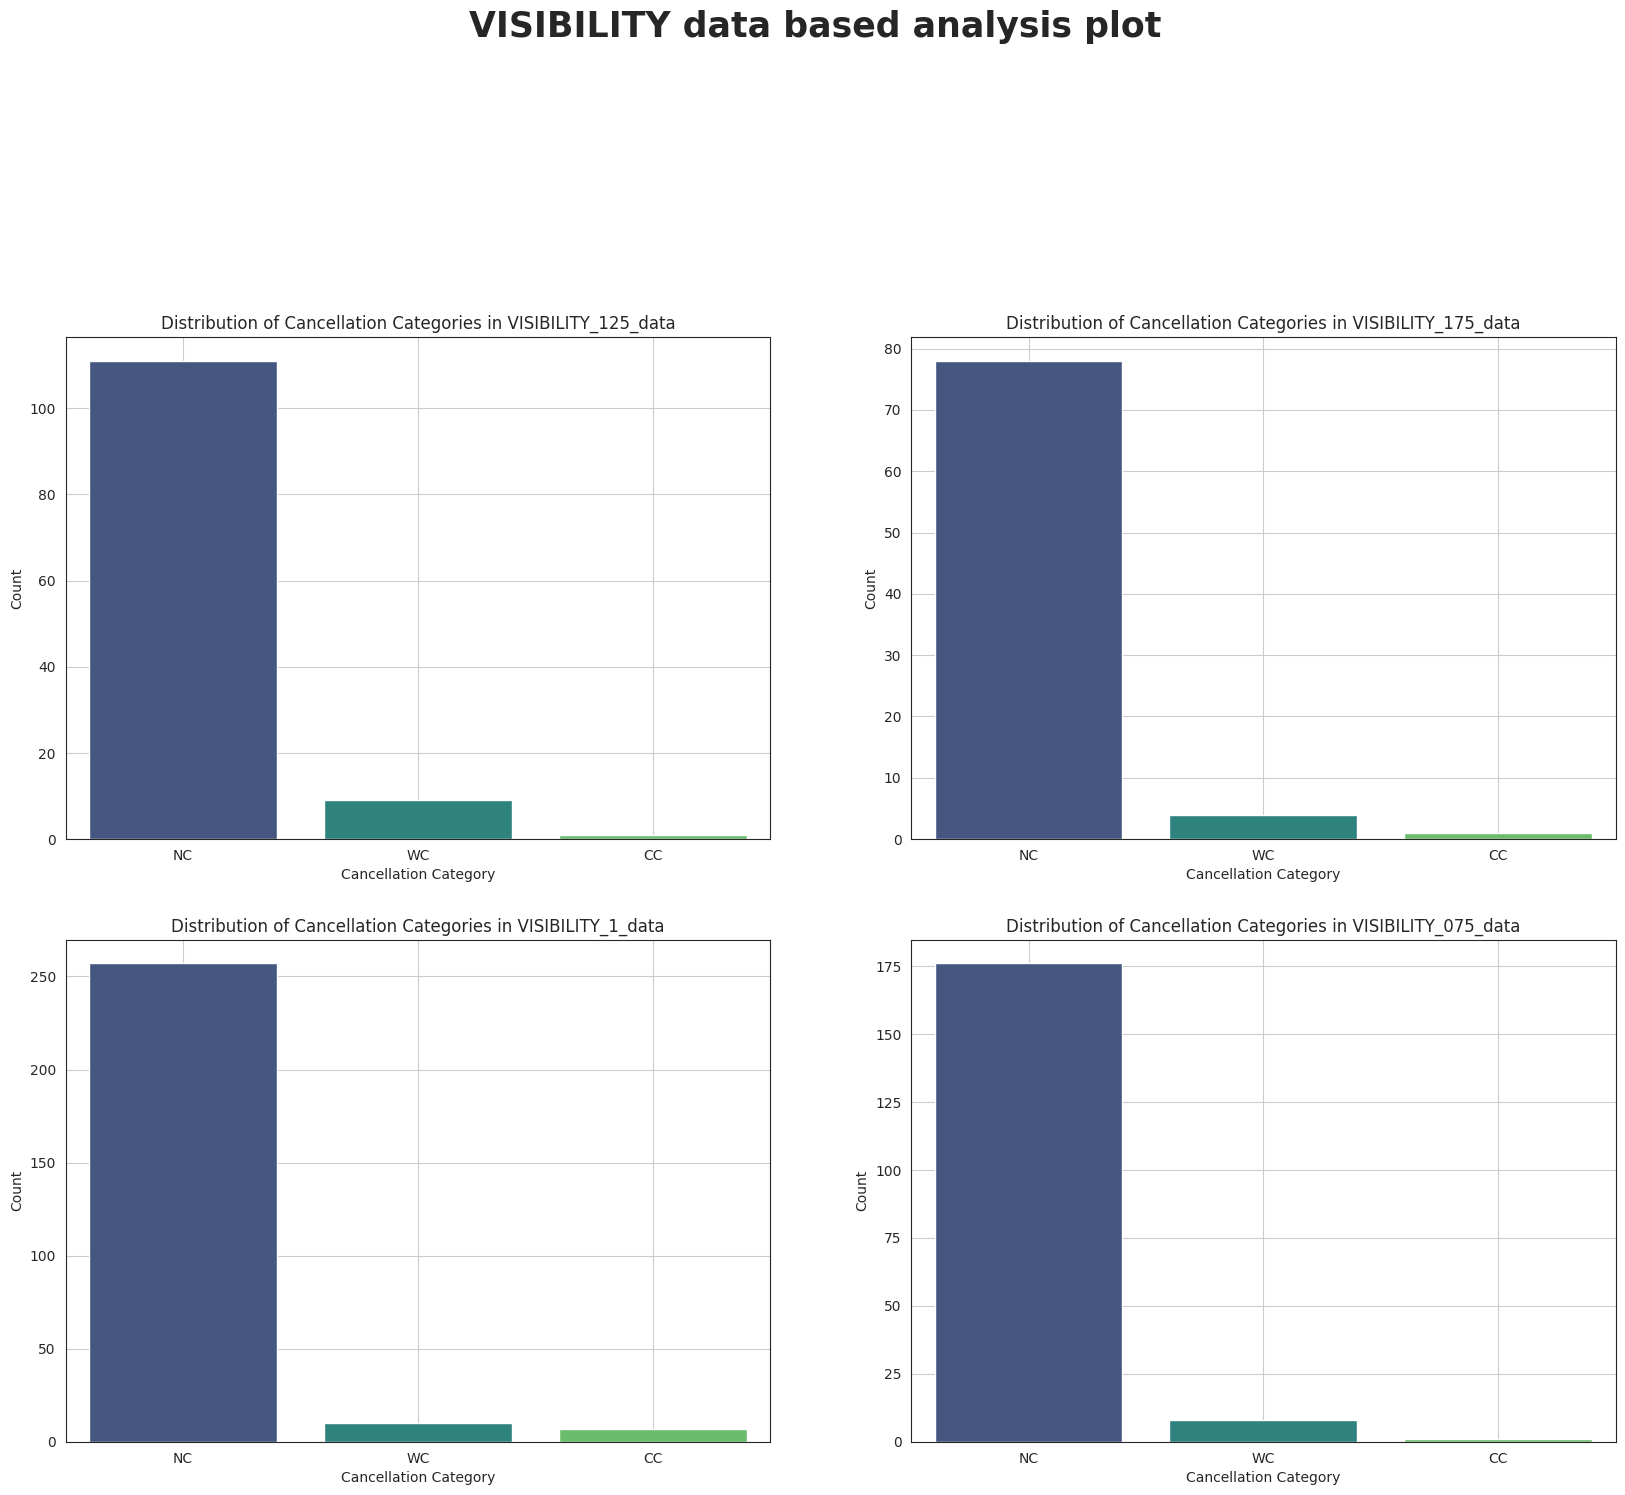

In [112]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("VISIBILITY data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

VISIBILITY_125_data = sample_data[sample_data['VISIBILITY'] == 1.25]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = VISIBILITY_125_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in VISIBILITY_125_data')
plt.grid(True)


plt.subplot(4,2,2)

VISIBILITY_175_data = sample_data[sample_data['VISIBILITY'] == 1.75]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = VISIBILITY_175_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in VISIBILITY_175_data')
plt.grid(True)



plt.subplot(4,2,3)

VISIBILITY_1_data = sample_data[sample_data['VISIBILITY'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = VISIBILITY_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in VISIBILITY_1_data')
plt.grid(True)


plt.subplot(4,2,4)

VISIBILITY_075_data = sample_data[sample_data['VISIBILITY'] == 0.75]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = VISIBILITY_075_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in VISIBILITY_075_data')
plt.grid(True)

plt.show()

**Observation:**
*A systematic analysis of cancellation rates in relation to visibility unveiled a gradual rise in cancellation rates as visibility diminishes, ranging from 0.12 miles to 1.25 miles. Conversely, a gradual decrease in cancellation rates was observed as visibility improved. *
*Upon meticulous scrutiny of the bar graph, a discernible pattern emerges. Weather, carrier, and National air system cancellations manifest distinctly within the data.*

<ipython-input-113-613b9c72033e>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_TEMPERATURE = sample_data.groupby(TEMPERATURE_bins)['CANCELLED'].mean()


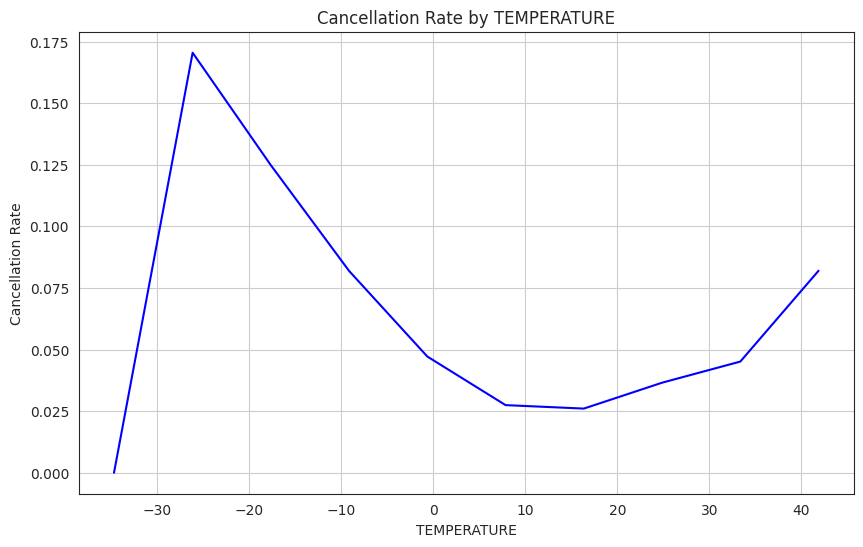

In [113]:
#TEMPERATURE_data = sample_data[(sample_data['TEMPERATURE'] >= 0) & (sample_data['TEMPERATURE'] <= 5500)]

# Create bins for TEMPERATURE
num_bins = 10
TEMPERATURE_bins = pd.cut(sample_data['TEMPERATURE'], bins=num_bins)

# Calculate cancellation rate for each TEMPERATURE bin
cancellation_rate_by_TEMPERATURE = sample_data.groupby(TEMPERATURE_bins)['CANCELLED'].mean()

# Calculate midpoints of TEMPERATURE bins
TEMPERATURE_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_TEMPERATURE.index]

# Plot the cancellation rate by TEMPERATURE
plt.figure(figsize=(10, 6))
plt.plot(TEMPERATURE_midpoints, cancellation_rate_by_TEMPERATURE.values,color='blue')
plt.xlabel('TEMPERATURE')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by TEMPERATURE')
plt.grid(True)
plt.show()

**Observation:**
*Flight cancellation rates exhibit pronounced peaks during extreme temperature conditions: notably, in frigid temperatures ranging from -30°C to -10°C, and in scorching conditions surpassing 40°C. This observation underscores the vulnerability of flight operations during temperature extremes, prompting further investigation into their implications for flight cancellations and operational efficiency.*







<ipython-input-114-342b441904d9>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_DEW_POINT = sample_data.groupby(DEW_POINT_bins)['CANCELLED'].mean()


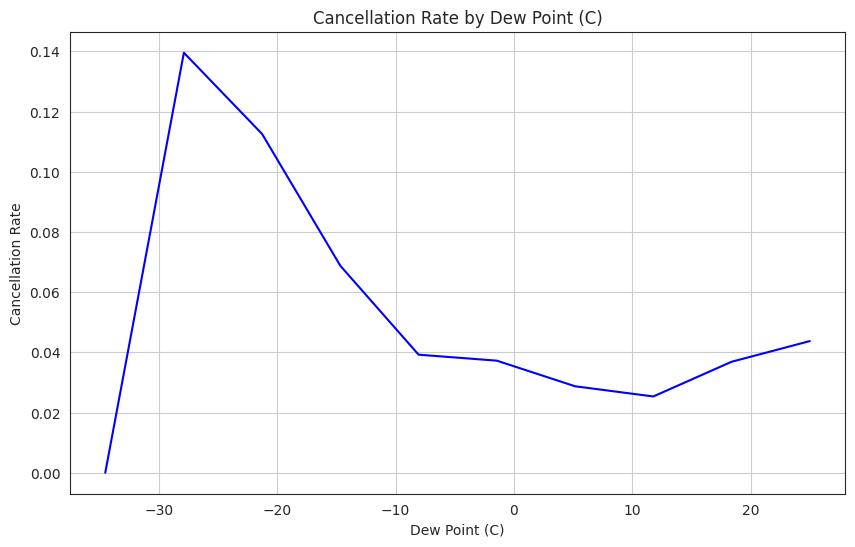

In [114]:
# Create bins for DEW_POINT
num_bins = 10
DEW_POINT_bins = pd.cut(sample_data['DEW_POINT'], bins=num_bins)

# Calculate cancellation rate for each DEW_POINT bin
cancellation_rate_by_DEW_POINT = sample_data.groupby(DEW_POINT_bins)['CANCELLED'].mean()

# Calculate midpoints of DEW_POINT bins
DEW_POINT_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_DEW_POINT.index]

# Plot the cancellation rate by DEW_POINT
plt.figure(figsize=(10, 6))
plt.plot(DEW_POINT_midpoints, cancellation_rate_by_DEW_POINT.values,color='blue')
plt.xlabel('Dew Point (C)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Dew Point (C)')
plt.grid(True)
plt.show()

**Observation:**
*An analysis of cancellation rates in relation to dew point temperature revealed a gradual increase in cancellation rates from -37°C up to -27°C. Subsequently, as the temperature continues to rise, the cancellation rates begin to decrease gradually. This pattern suggests a potential link between dew point temperature and flight cancellations, emphasizing the importance of understanding temperature's impact on aviation operations.*







<ipython-input-115-6de201c09dc6>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_REL_HUMIDITY = sample_data.groupby(REL_HUMIDITY_bins)['CANCELLED'].mean()


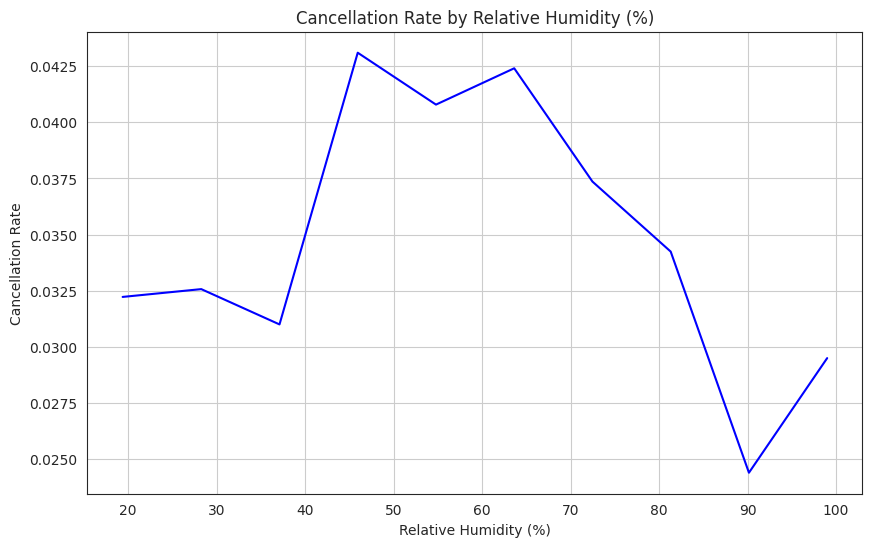

In [115]:
REL_HUMIDITY_data = sample_data[(sample_data['REL_HUMIDITY'] >= 15) & (sample_data['REL_HUMIDITY'] <= 105)]
# Create bins for REL_HUMIDITY
num_bins = 10
REL_HUMIDITY_bins = pd.cut(REL_HUMIDITY_data['REL_HUMIDITY'], bins=num_bins)

# Calculate cancellation rate for each REL_HUMIDITY bin
cancellation_rate_by_REL_HUMIDITY = sample_data.groupby(REL_HUMIDITY_bins)['CANCELLED'].mean()

# Calculate midpoints of REL_HUMIDITY bins
REL_HUMIDITY_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_REL_HUMIDITY.index]

# Plot the cancellation rate by REL_HUMIDITY
plt.figure(figsize=(10, 6))
plt.plot(REL_HUMIDITY_midpoints, cancellation_rate_by_REL_HUMIDITY.values,color='blue')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by Relative Humidity (%)')
plt.grid(True)
plt.show()

**Observation:**
*Upon scrutinizing relative humidity in relation to cancellation rates, an intriguing trend emerged. The cancellation rate exhibited a gradual increase starting at a relative humidity of 39%, reaching its zenith at 45%. Subsequently, the rate showed a declining trend with minor fluctuations, ultimately reaching its lowest point at 90%. This suggests a complex relationship between relative humidity and flight cancellations, meriting further exploration.*

<ipython-input-116-89949c89b67c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancellation_rate_by_ALTIMETER = sample_data.groupby(ALTIMETER_bins)['CANCELLED'].mean()


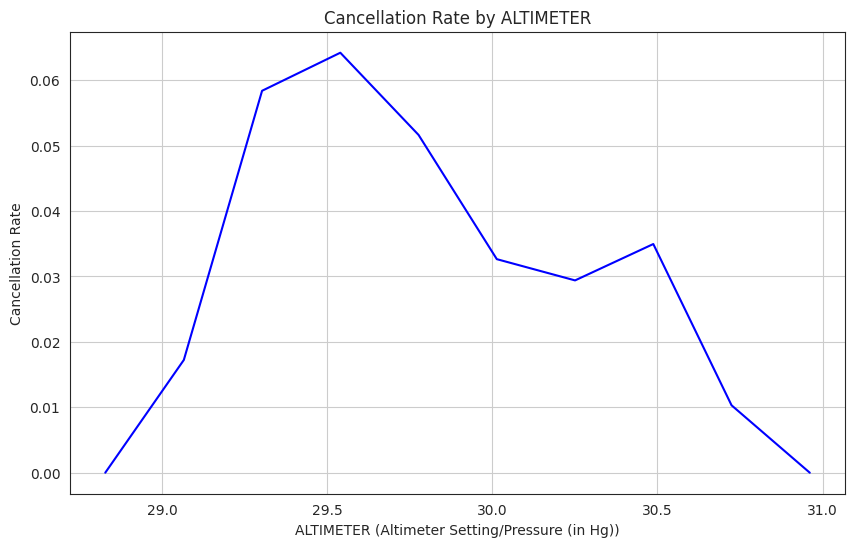

In [116]:
ALTIMETER_data = sample_data[(sample_data['ALTIMETER'] >= 25) & (sample_data['ALTIMETER'] <= 35)]
# Create bins for Atmospheric Pressure
num_bins = 10
ALTIMETER_bins = pd.cut(ALTIMETER_data['ALTIMETER'], bins=num_bins)

# Calculate cancellation rate for each ALTIMETER bin
cancellation_rate_by_ALTIMETER = sample_data.groupby(ALTIMETER_bins)['CANCELLED'].mean()

# Calculate midpoints of ALTIMETER bins
ALTIMETER_midpoints = [(bin.left + bin.right) / 2 for bin in cancellation_rate_by_ALTIMETER.index]

# Plot the cancellation rate by ALTIMETER
plt.figure(figsize=(10, 6))
plt.plot(ALTIMETER_midpoints, cancellation_rate_by_ALTIMETER.values,color='blue')
plt.xlabel('ALTIMETER (Altimeter Setting/Pressure (in Hg))')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by ALTIMETER')
plt.grid(True)
plt.show()

**Observaton:**
*Upon examination of Altimeter Setting/Pressure (in Hg), a trend emerges wherein cancellations begin to rise from 29.0 Hg, reaching a peak around 29.6 Hg, after which they gradually decline. This pattern suggests a potential association between atmospheric pressure levels and flight cancellations, warranting further investigation into their interconnected dynamics.*

<ipython-input-117-1b196a6c4c8b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LOWEST_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-117-1b196a6c4c8b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LOWEST_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


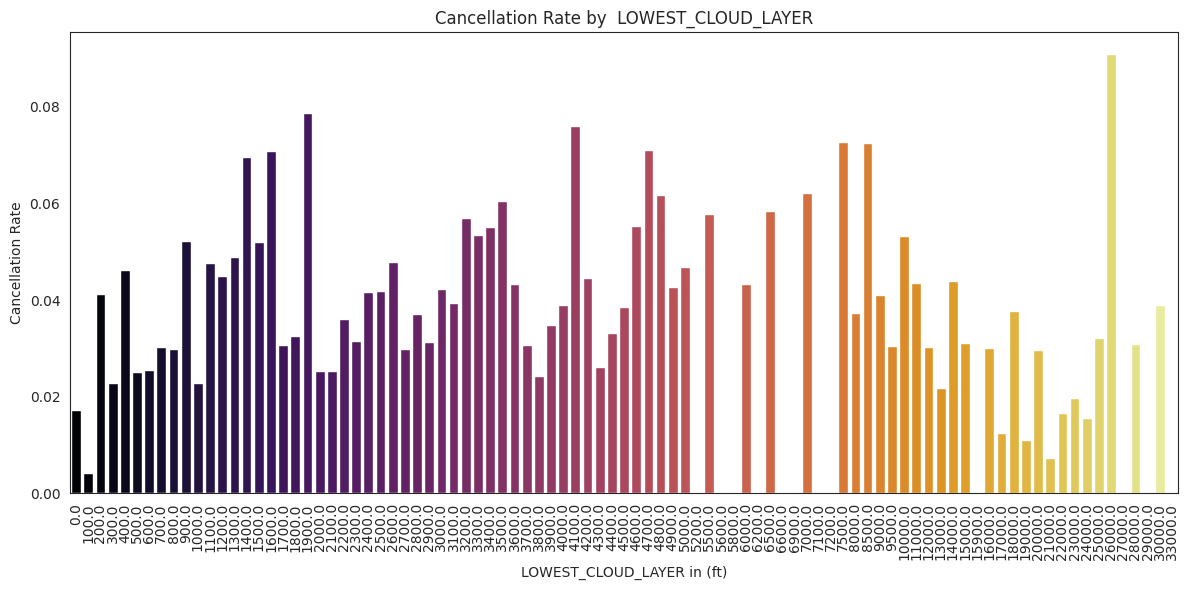

In [117]:
plt.figure(figsize=(12, 6))
sns.barplot(x='LOWEST_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('LOWEST_CLOUD_LAYER in (ft)')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  LOWEST_CLOUD_LAYER')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<ipython-input-118-e95e65f0cc2a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-118-e95e65f0cc2a>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-118-e95e65f0cc2a>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-118-e95e65f0cc2a>:101: FutureWarning: 

Passing `pal

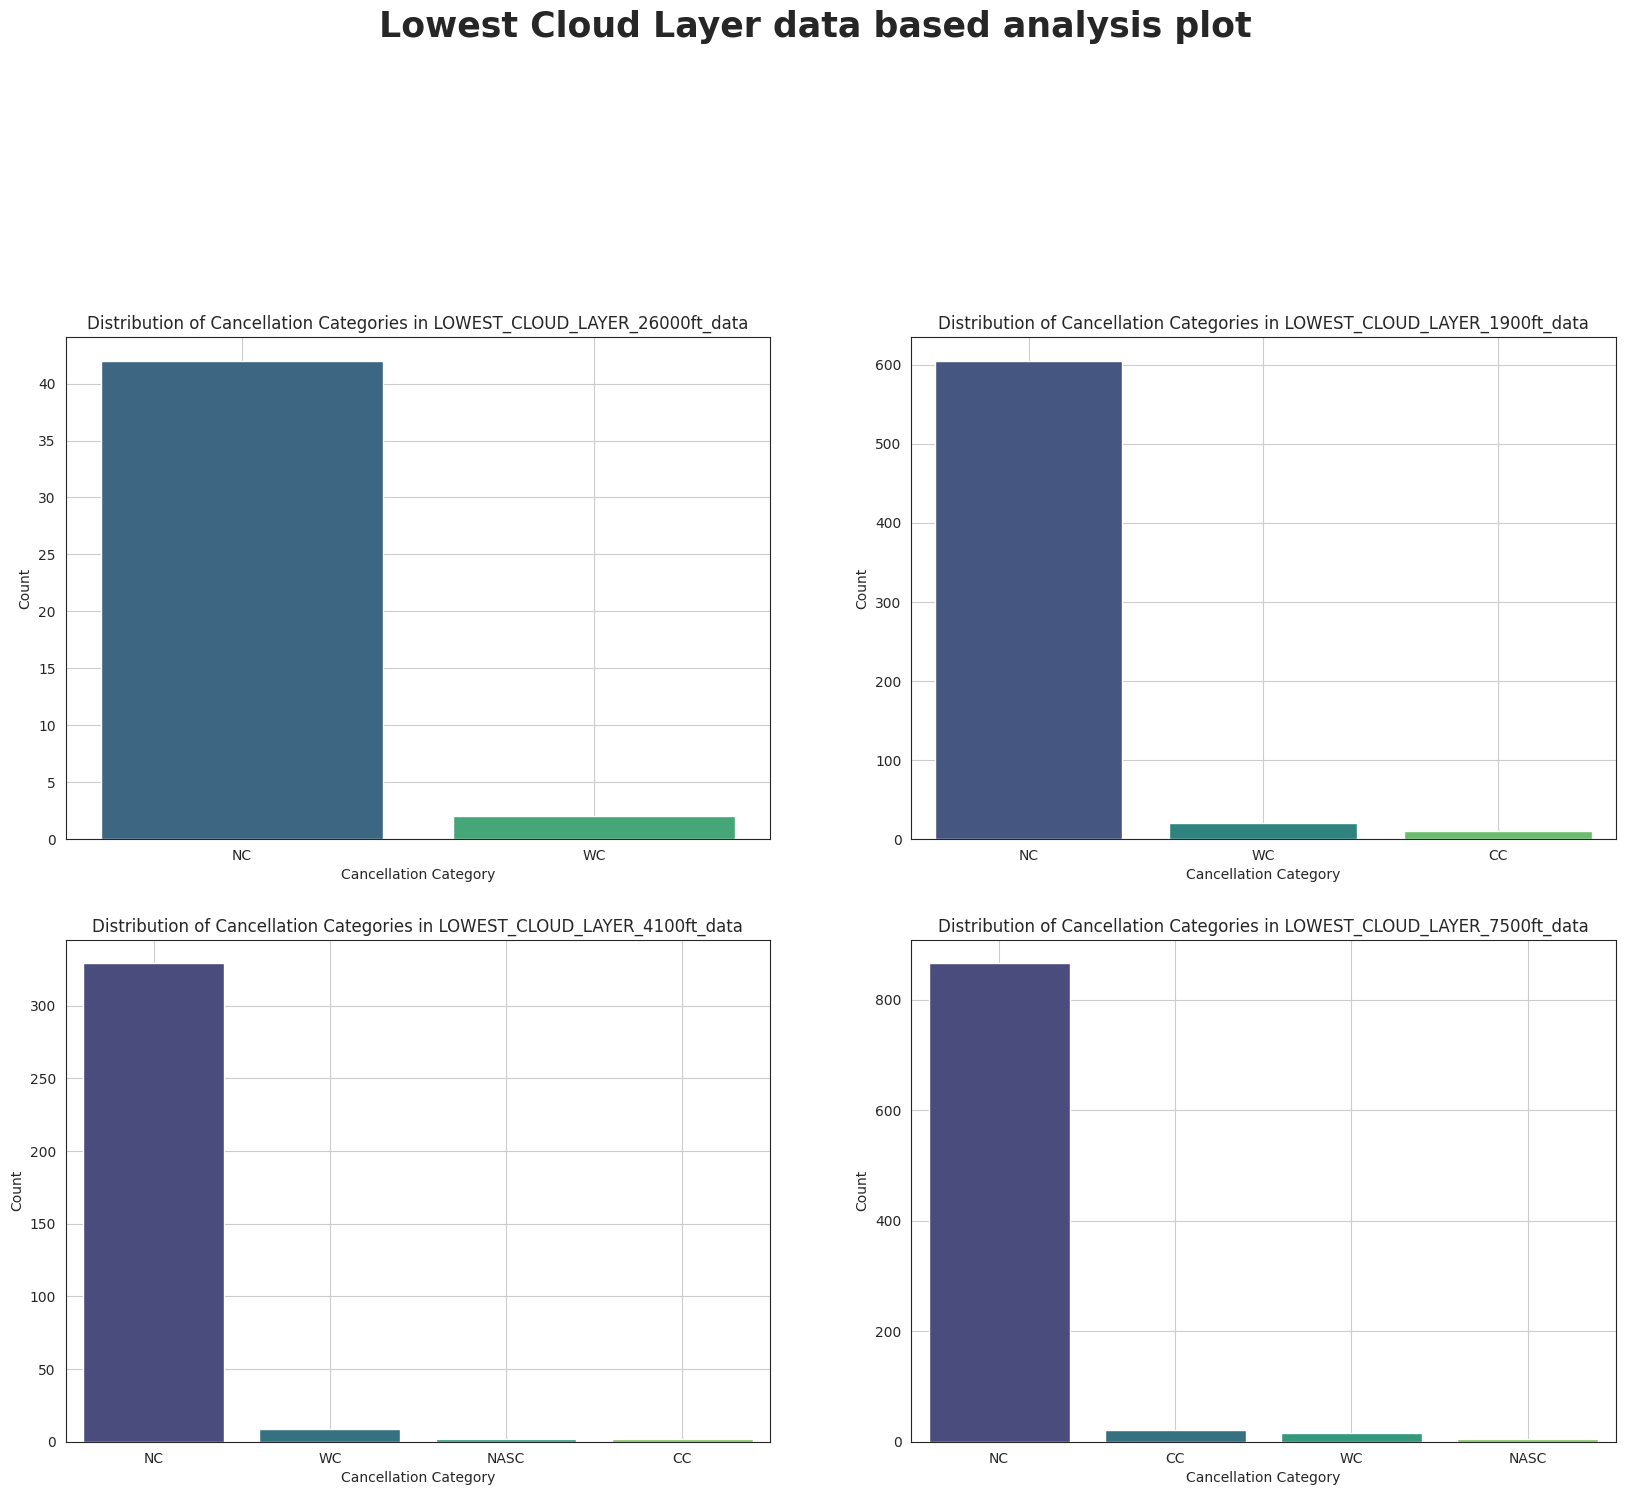

In [118]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("Lowest Cloud Layer data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(4,2,1)

LOWEST_CLOUD_LAYER_26000_data = sample_data[sample_data['LOWEST_CLOUD_LAYER'] == 26000.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOWEST_CLOUD_LAYER_26000_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOWEST_CLOUD_LAYER_26000ft_data')
plt.grid(True)


plt.subplot(4,2,2)

LOWEST_CLOUD_LAYER_1900_data = sample_data[sample_data['LOWEST_CLOUD_LAYER'] == 1900.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOWEST_CLOUD_LAYER_1900_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOWEST_CLOUD_LAYER_1900ft_data')
plt.grid(True)




plt.subplot(4,2,3)

LOWEST_CLOUD_LAYER_4100_data = sample_data[sample_data['LOWEST_CLOUD_LAYER'] == 4100.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOWEST_CLOUD_LAYER_4100_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOWEST_CLOUD_LAYER_4100ft_data')
plt.grid(True)



plt.subplot(4,2,4)

LOWEST_CLOUD_LAYER_7500_data = sample_data[sample_data['LOWEST_CLOUD_LAYER'] == 7500.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOWEST_CLOUD_LAYER_7500_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOWEST_CLOUD_LAYER_7500ft_data')
plt.grid(True)

plt.show()

**Observation:**
*Upon analyzing the lowest cloud layer data's correlation with cancellation rates, the highest cancellation rate was noted at 26,000 ft. Further scrutiny of different cancellation categories revealed that weather-related cancellations are prevalent at this altitude, underscoring its significance in flight disruptions.*


<ipython-input-120-e6dbfa9223a9>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='N_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-120-e6dbfa9223a9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='N_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')


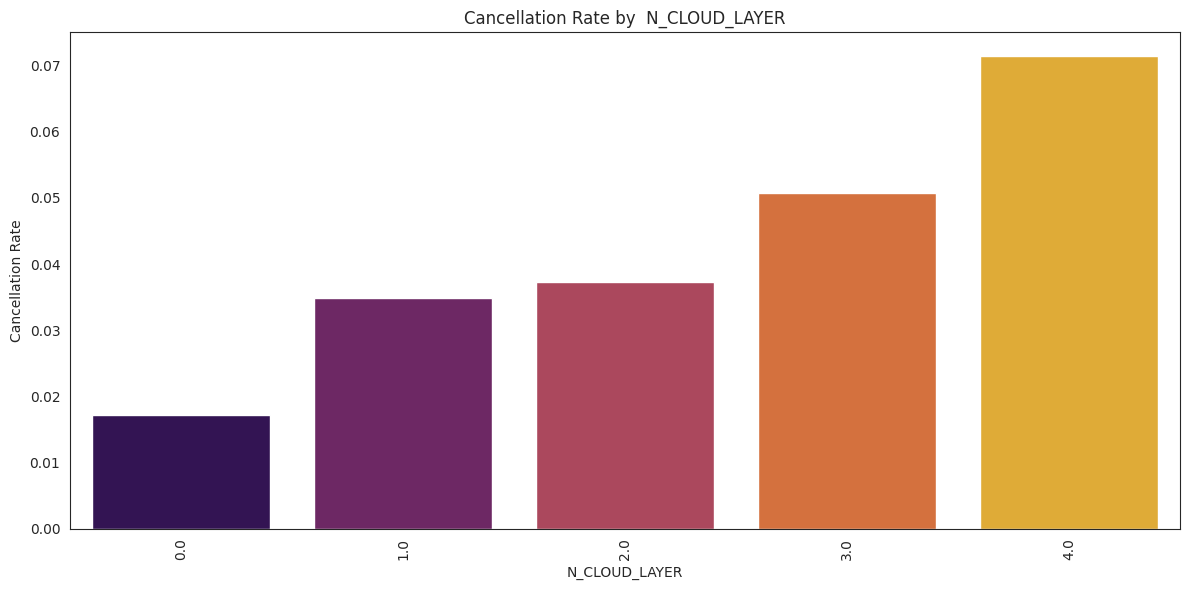

In [120]:
plt.figure(figsize=(12, 6))
sns.barplot(x='N_CLOUD_LAYER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('N_CLOUD_LAYER')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  N_CLOUD_LAYER')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [121]:
sample_data['N_CLOUD_LAYER'].unique()

[1.0, 3.0, 0.0, 2.0, 4.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]

<ipython-input-122-034e0016d178>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-122-034e0016d178>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-122-034e0016d178>:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-122-034e0016d178>:99: FutureWarning: 

Passing `pale

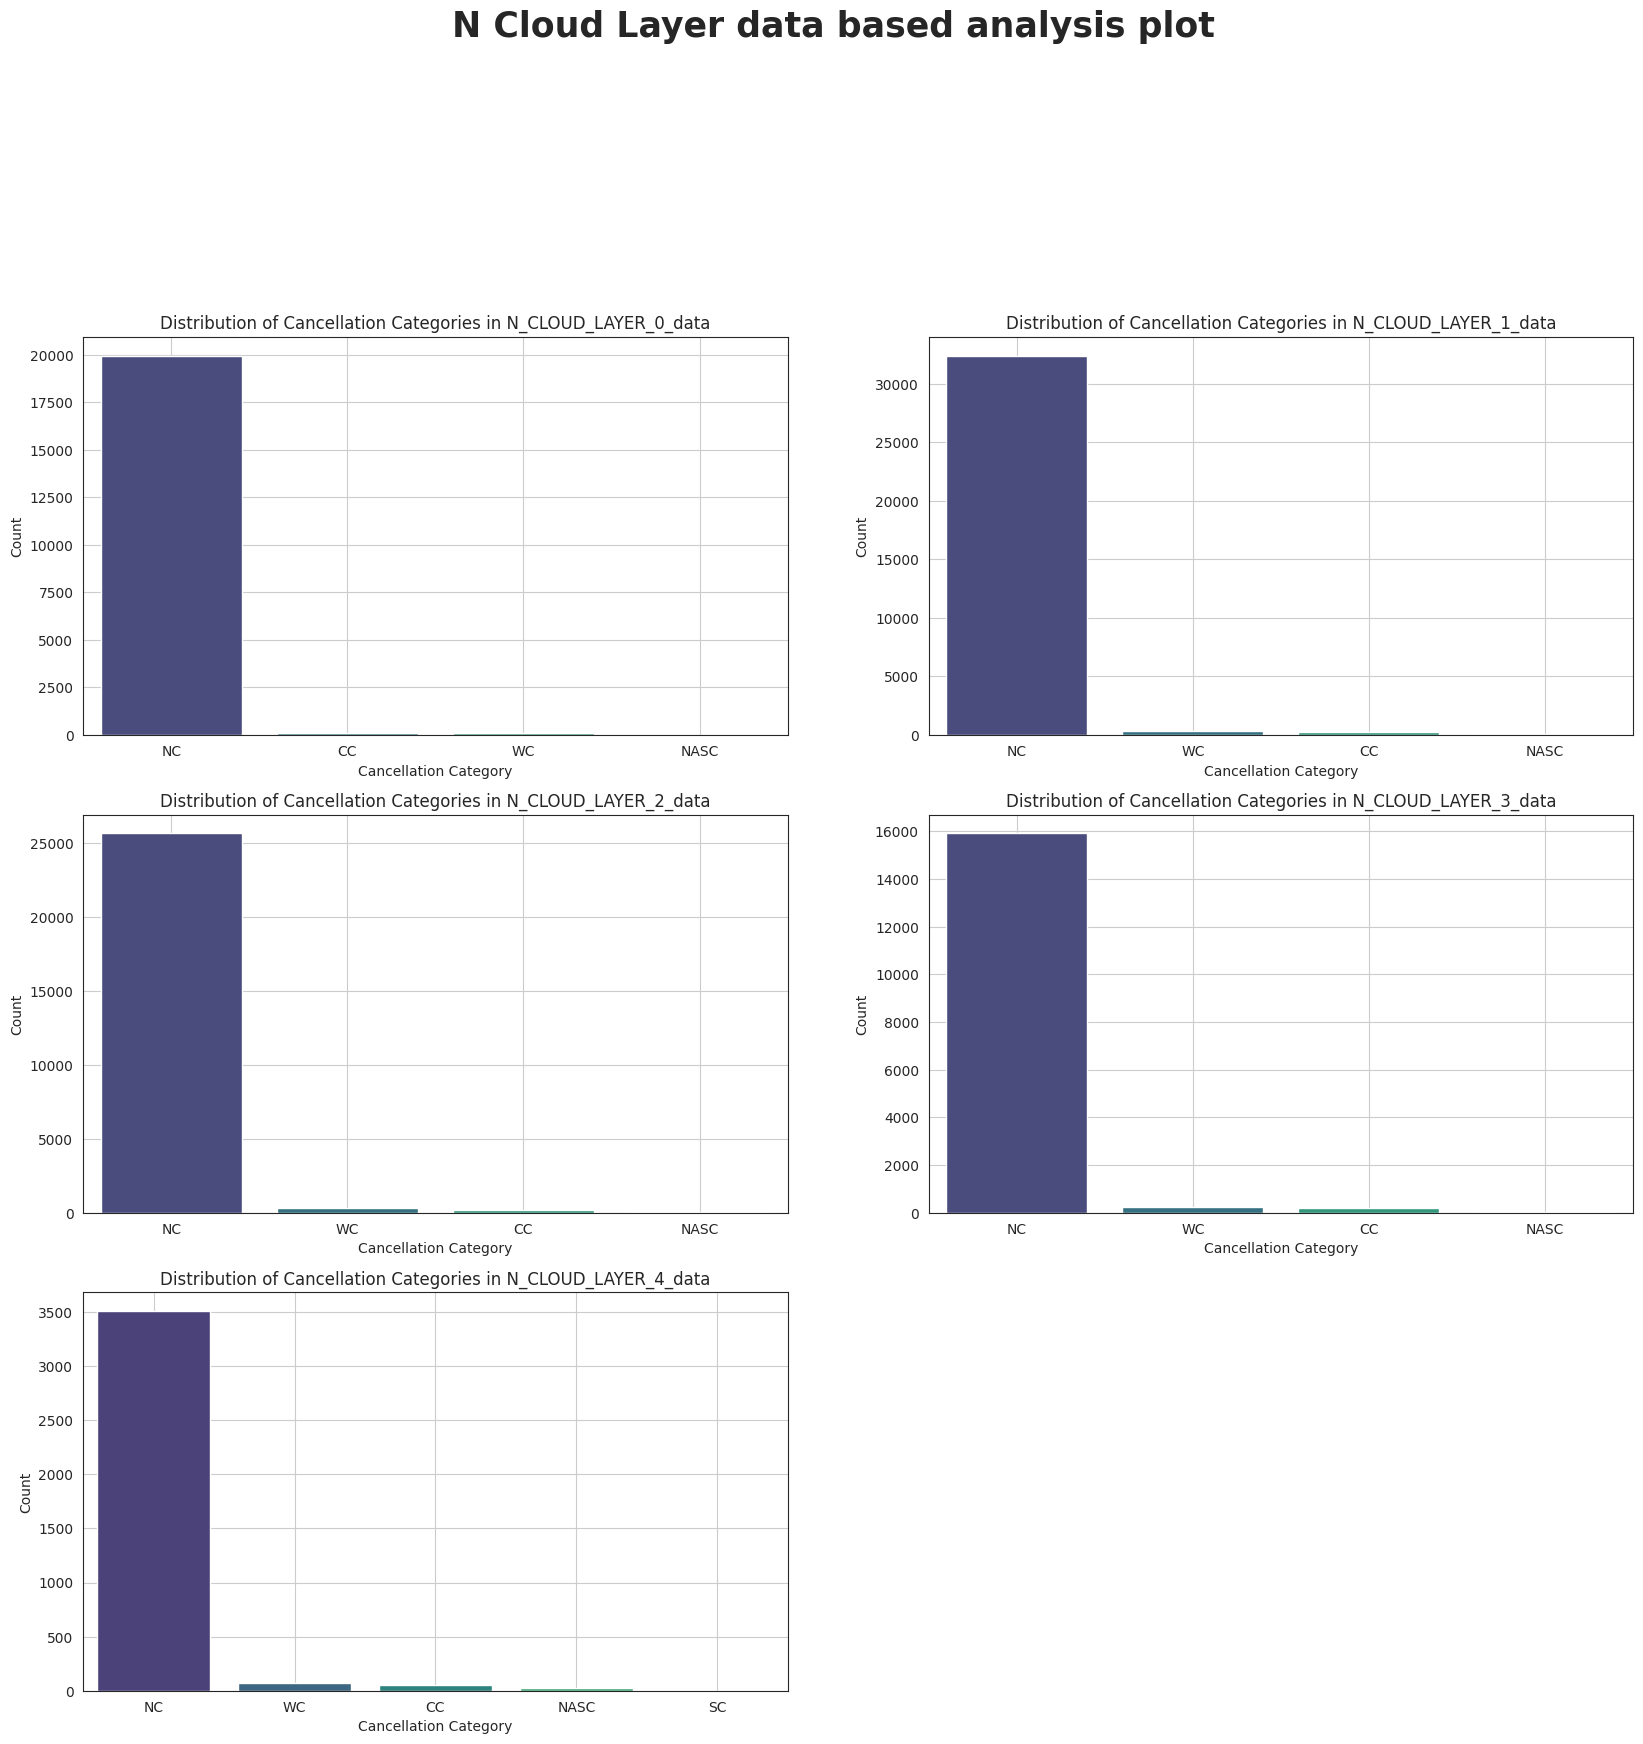

In [122]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("N Cloud Layer data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")


plt.subplot(5,2,1)

N_CLOUD_LAYER_0_data = sample_data[sample_data['N_CLOUD_LAYER'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = N_CLOUD_LAYER_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in N_CLOUD_LAYER_0_data')
plt.grid(True)


plt.subplot(5,2,2)

N_CLOUD_LAYER_1_data = sample_data[sample_data['N_CLOUD_LAYER'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = N_CLOUD_LAYER_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in N_CLOUD_LAYER_1_data')
plt.grid(True)



plt.subplot(5,2,3)

N_CLOUD_LAYER_2_data = sample_data[sample_data['N_CLOUD_LAYER'] == 2.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = N_CLOUD_LAYER_2_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in N_CLOUD_LAYER_2_data')
plt.grid(True)


plt.subplot(5,2,4)

N_CLOUD_LAYER_3_data = sample_data[sample_data['N_CLOUD_LAYER'] == 3.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = N_CLOUD_LAYER_3_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in N_CLOUD_LAYER_3_data')
plt.grid(True)


plt.subplot(5,2,5)

N_CLOUD_LAYER_4_data = sample_data[sample_data['N_CLOUD_LAYER'] == 4.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = N_CLOUD_LAYER_4_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in N_CLOUD_LAYER_4_data')
plt.grid(True)


plt.show()

**Observation:**
*Analyzing N cloud cover data revealed a rise in cancellation rates as cloud cover stages progressed from 0 to 4, peaking at stage 4. Individual stage analysis disclosed weather and carrier cancellations on stages 1,2 and 3. At stage 4, a marginal increase in weather-related cancellations and National Air System Cancellations was observed, emphasizing its impact on flight disruptions.*

<ipython-input-124-ac14cea97a4a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='LOW_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-124-ac14cea97a4a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LOW_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-124-ac14cea97a4a>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-124-ac14cea97a4a>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

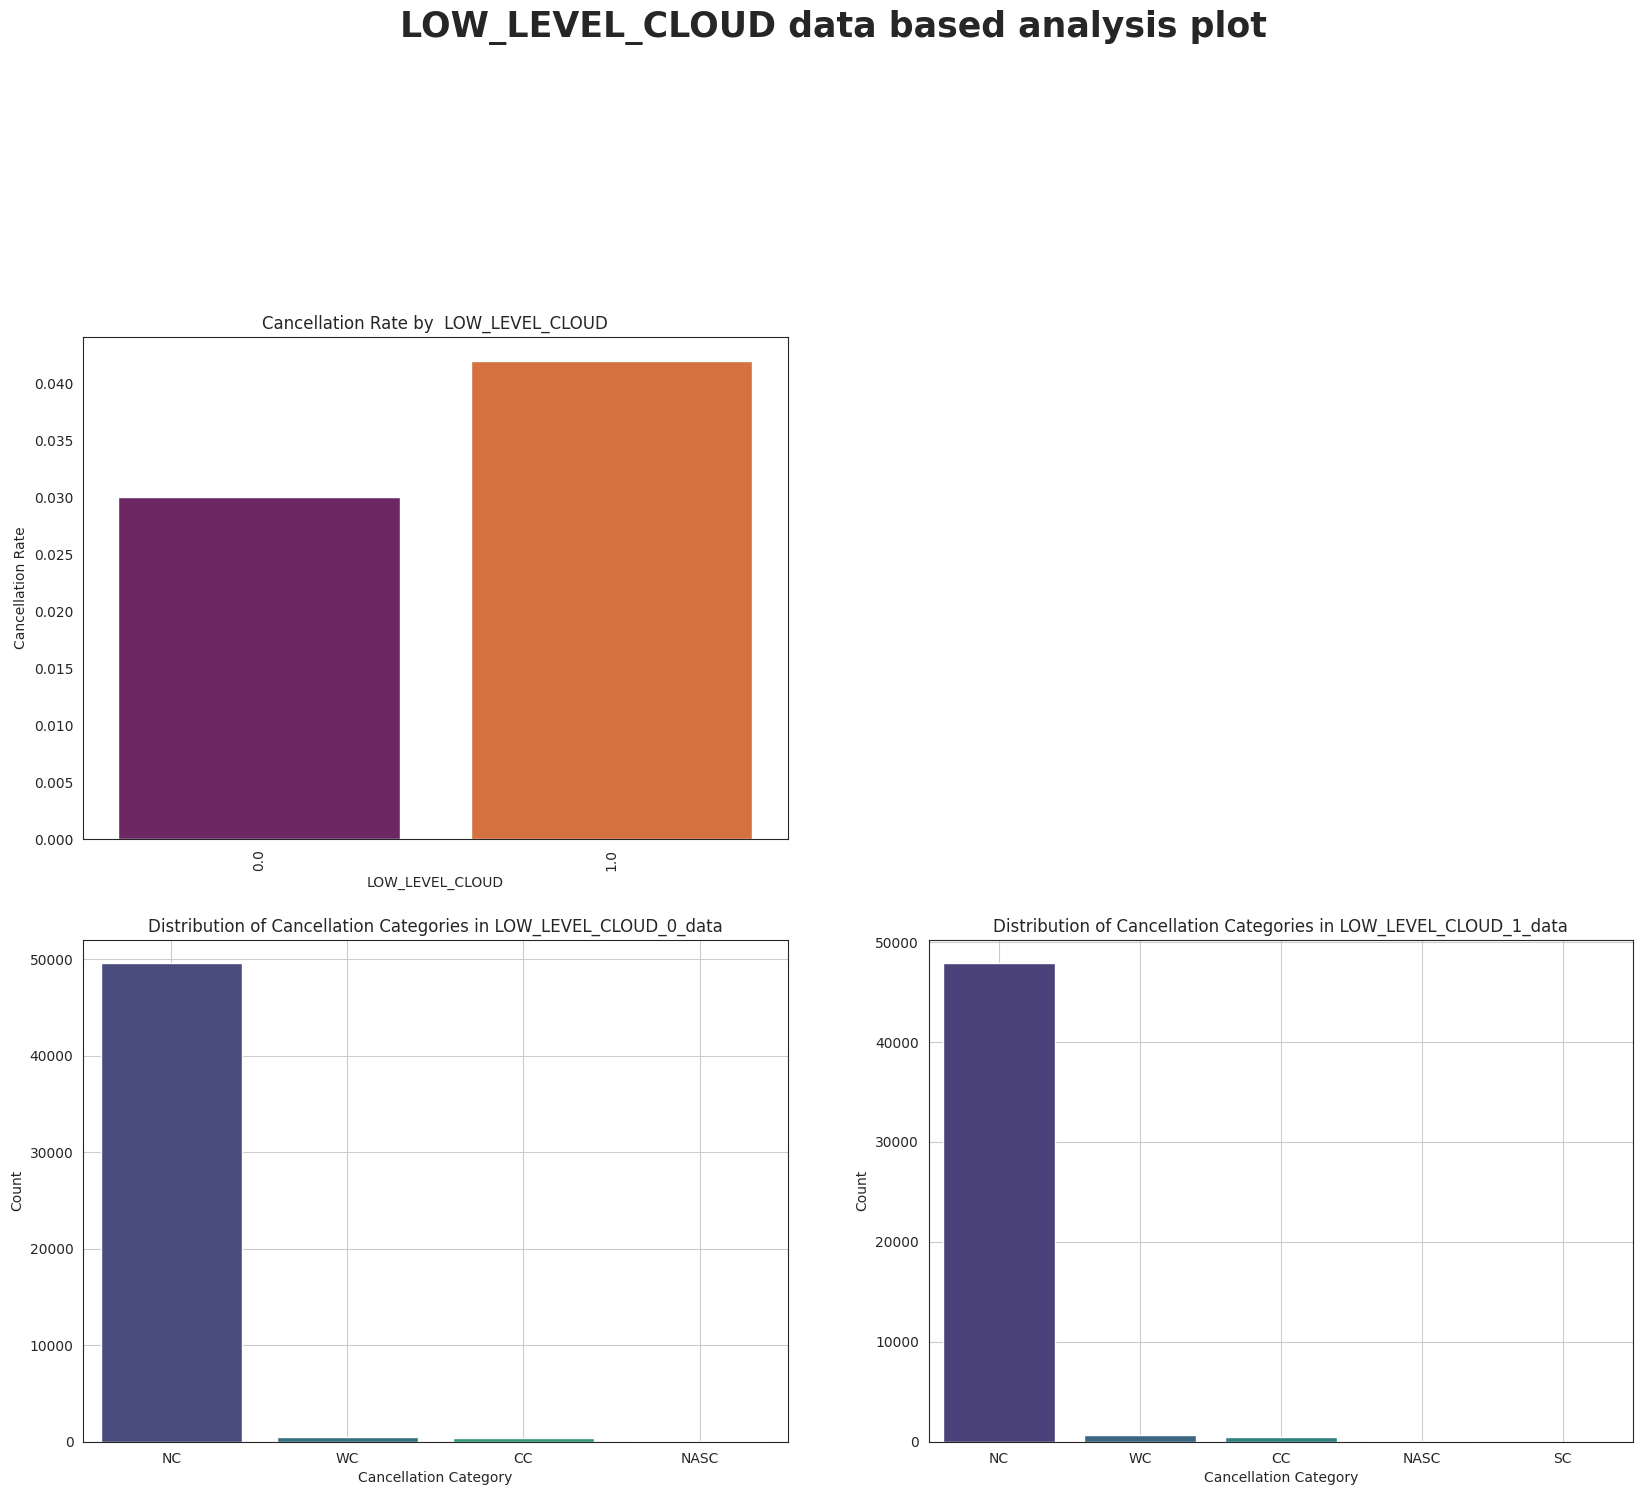

In [124]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("LOW_LEVEL_CLOUD data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")

plt.subplot(4,2,1)
#plt.figure(figsize=(12, 6))
sns.barplot(x='LOW_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('LOW_LEVEL_CLOUD')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  LOW_LEVEL_CLOUD')
plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()


plt.subplot(4,2,3)

LOW_LEVEL_CLOUD_0_data = sample_data[sample_data['LOW_LEVEL_CLOUD'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOW_LEVEL_CLOUD_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOW_LEVEL_CLOUD_0_data')
plt.grid(True)


plt.subplot(4,2,4)

LOW_LEVEL_CLOUD_1_data = sample_data[sample_data['LOW_LEVEL_CLOUD'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = LOW_LEVEL_CLOUD_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in LOW_LEVEL_CLOUD_1_data')
plt.grid(True)

plt.show()

Observation:
Upon reviewing low-level cloud data, it became evident that cancellation rates slightly increased at level 2 compared to level 1. In-depth examination of individual stages and various cancellation categories revealed the presence of weather and carrier cancellations on both levels.

<ipython-input-126-30786019f49c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='MID_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-126-30786019f49c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MID_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-126-30786019f49c>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-126-30786019f49c>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign th

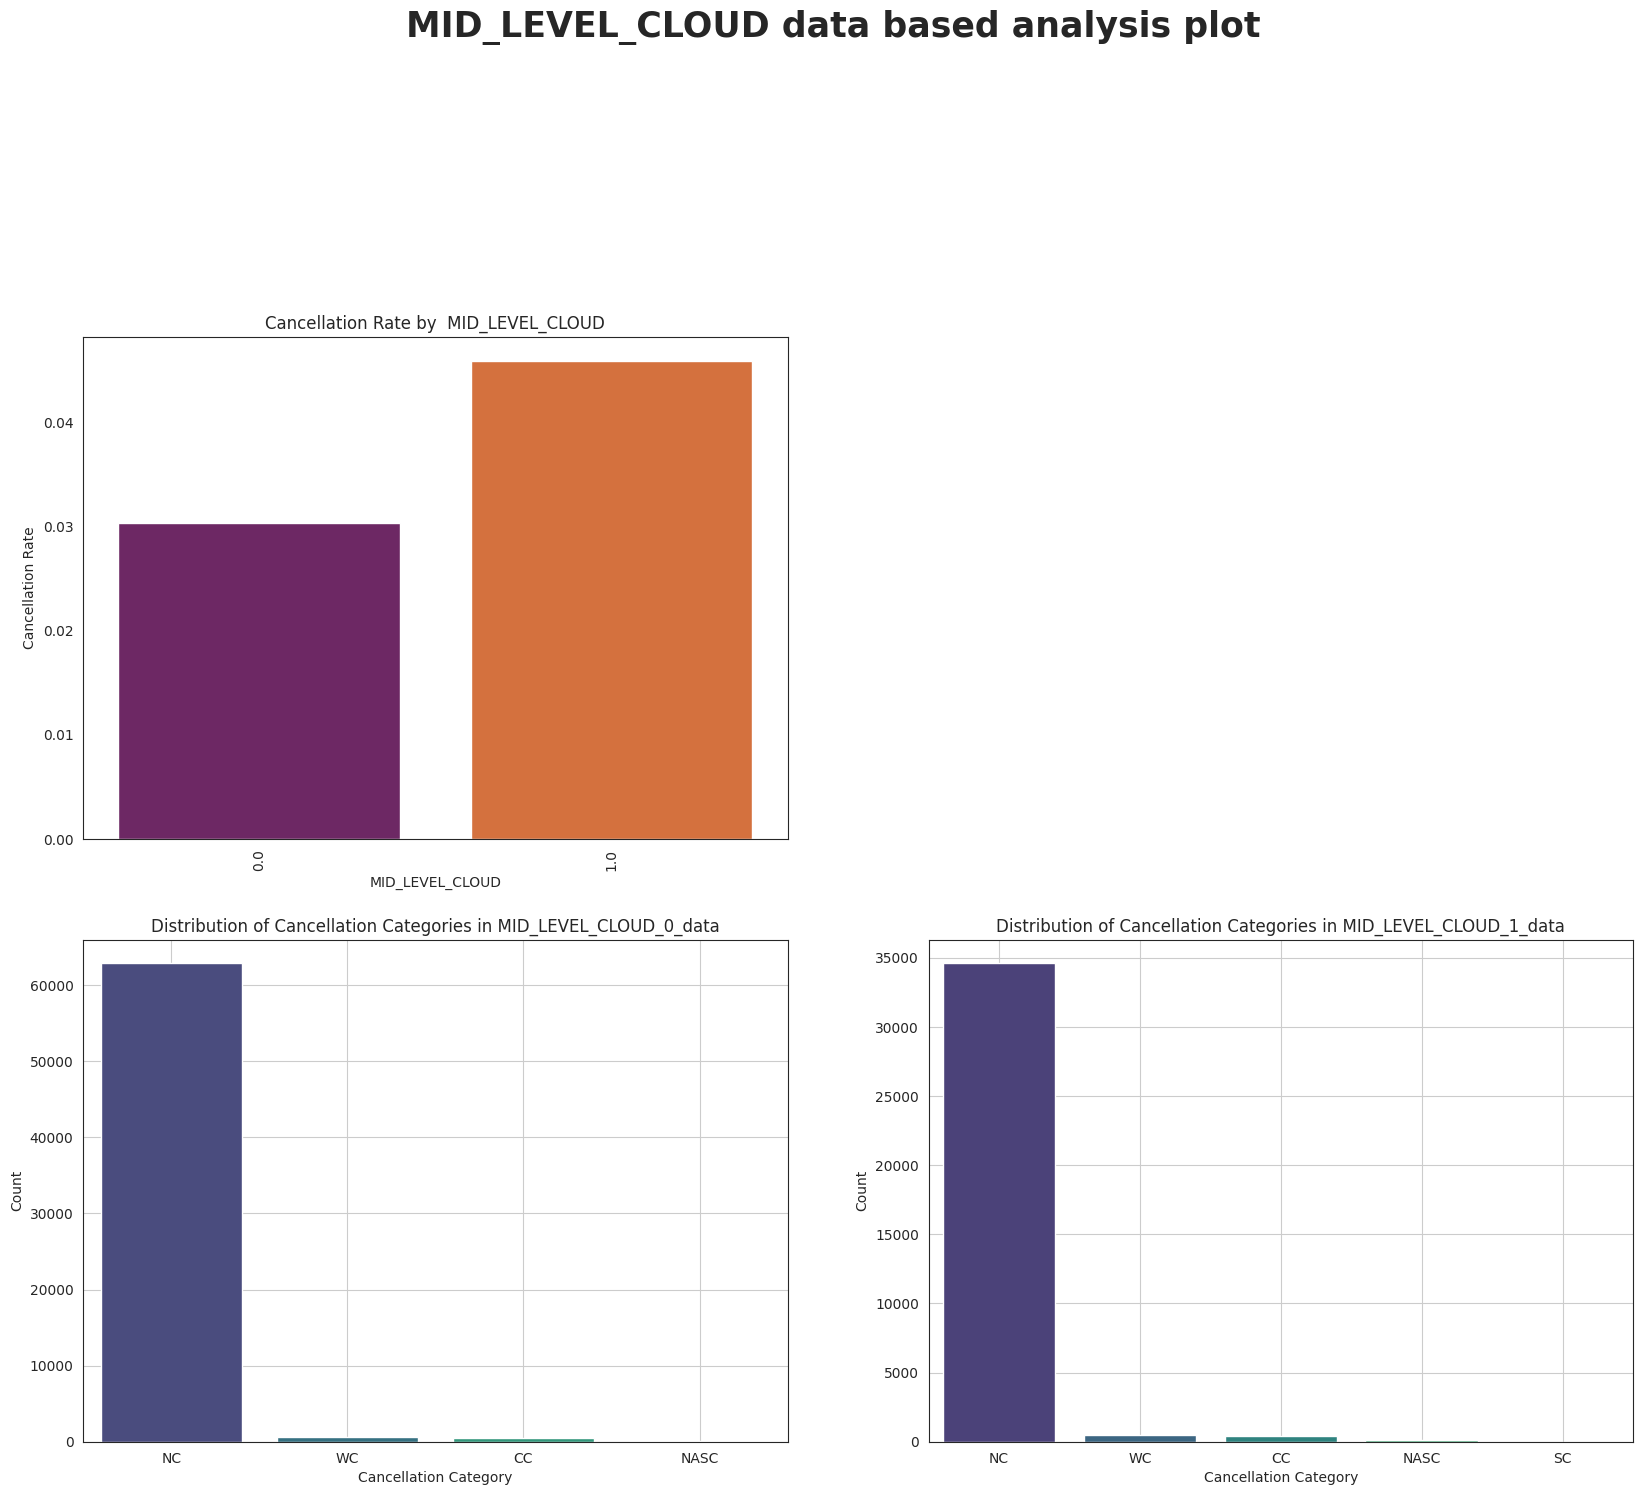

In [126]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("MID_LEVEL_CLOUD data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")

plt.subplot(4,2,1)
#plt.figure(figsize=(12, 6))
sns.barplot(x='MID_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('MID_LEVEL_CLOUD')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  MID_LEVEL_CLOUD')
plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()


plt.subplot(4,2,3)

MID_LEVEL_CLOUD_0_data = sample_data[sample_data['MID_LEVEL_CLOUD'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MID_LEVEL_CLOUD_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MID_LEVEL_CLOUD_0_data')
plt.grid(True)


plt.subplot(4,2,4)

MID_LEVEL_CLOUD_1_data = sample_data[sample_data['MID_LEVEL_CLOUD'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = MID_LEVEL_CLOUD_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in MID_LEVEL_CLOUD_1_data')
plt.grid(True)

plt.show()

Observation:
Examining mid-level cloud data reveals a minor increase in cancellation rates at level 2 compared to level 1. Detailed analysis of individual stages and cancellation categories shows weather and carrier cancellations across both stages, with minimal impact on level 2. This underscores the complex interplay of mid-level clouds in flight disruptions.

<ipython-input-127-947af0d5e42b>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HIGH_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-127-947af0d5e42b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='HIGH_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-127-947af0d5e42b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-127-947af0d5e42b>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

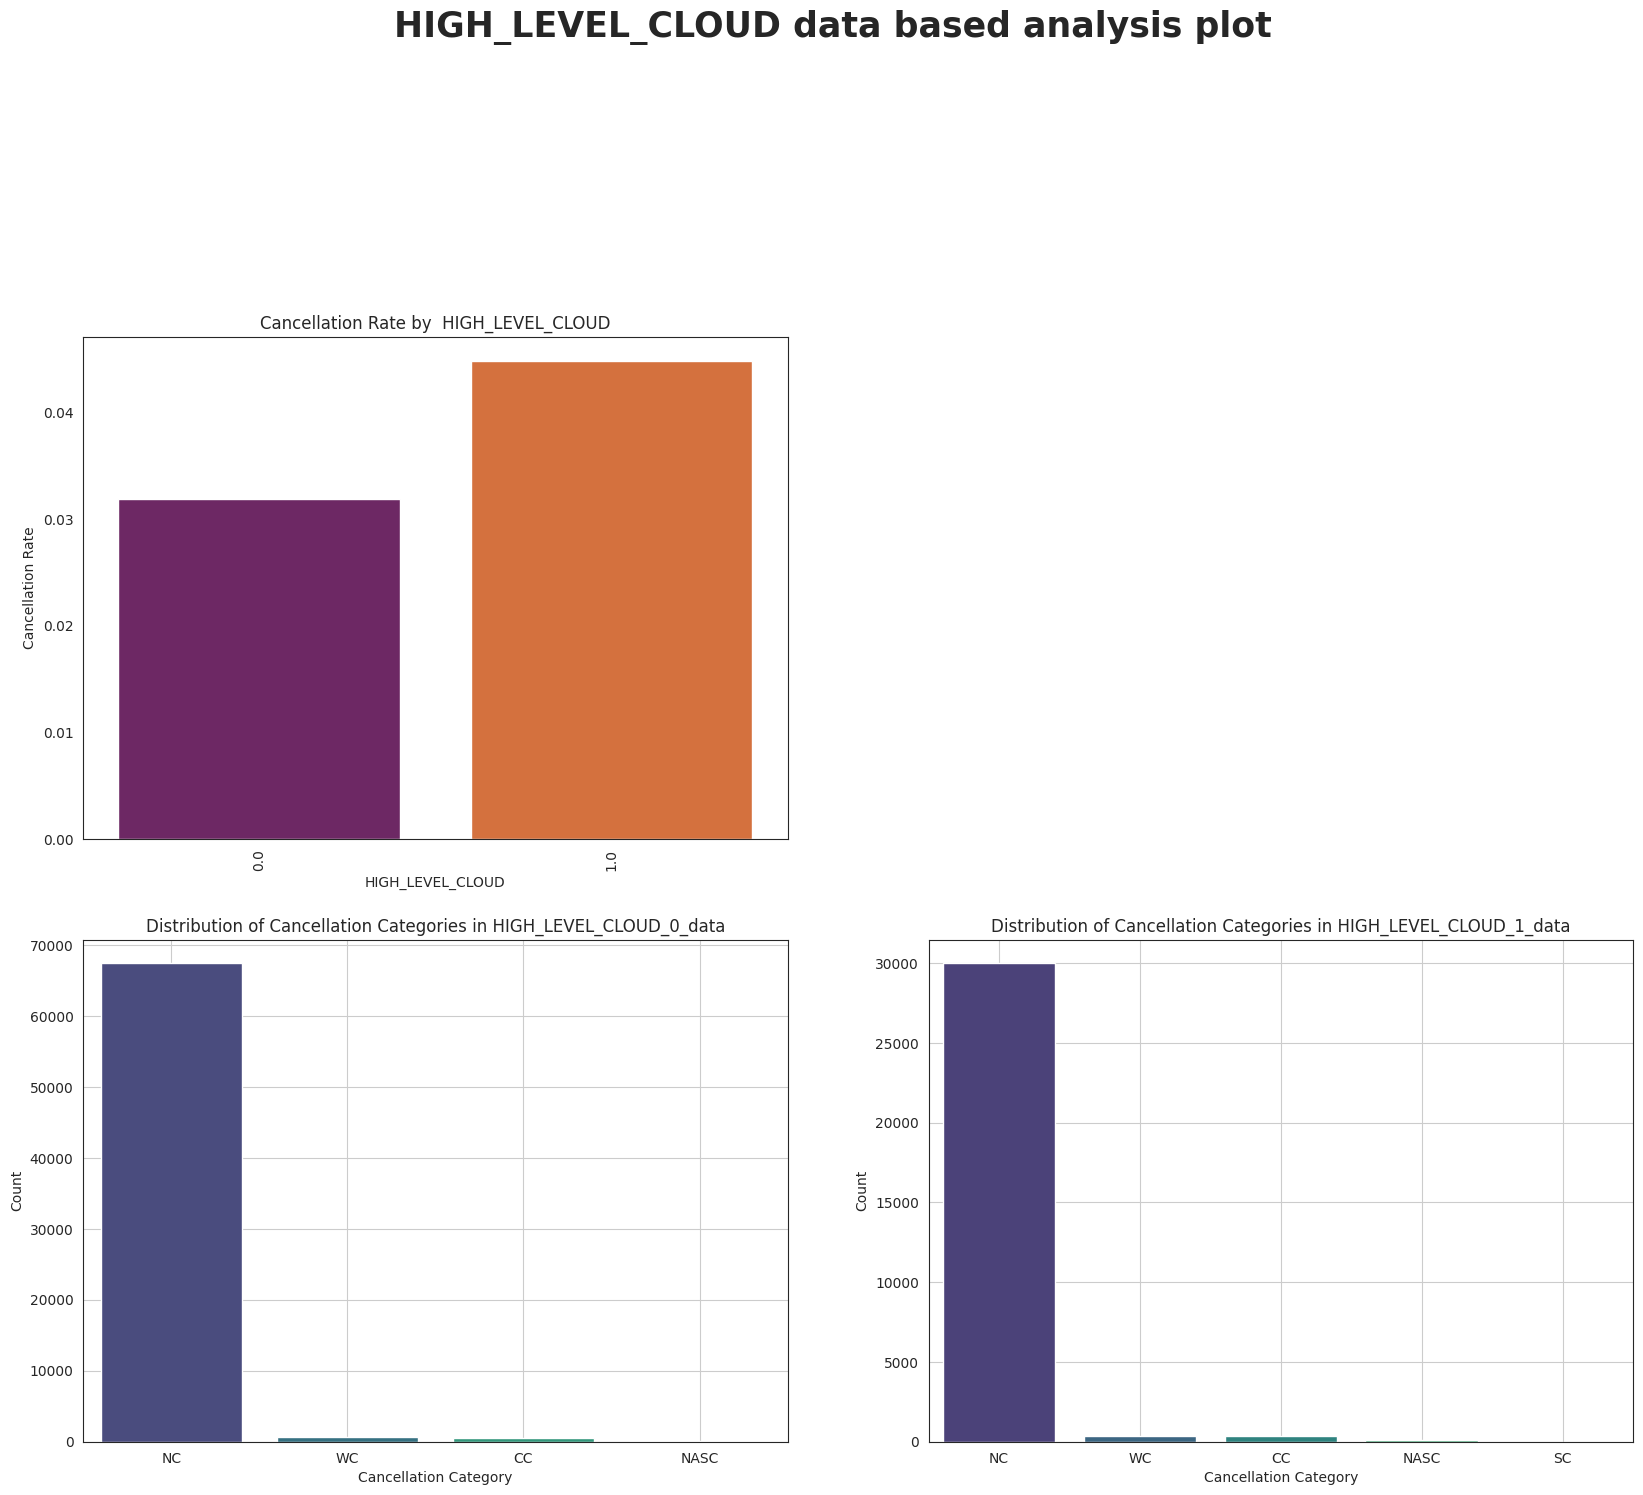

In [127]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("HIGH_LEVEL_CLOUD data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")

plt.subplot(4,2,1)
#plt.figure(figsize=(12, 6))
sns.barplot(x='HIGH_LEVEL_CLOUD', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('HIGH_LEVEL_CLOUD')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  HIGH_LEVEL_CLOUD')
plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()


plt.subplot(4,2,3)

HIGH_LEVEL_CLOUD_0_data = sample_data[sample_data['HIGH_LEVEL_CLOUD'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = HIGH_LEVEL_CLOUD_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in HIGH_LEVEL_CLOUD_0_data')
plt.grid(True)


plt.subplot(4,2,4)

HIGH_LEVEL_CLOUD_1_data = sample_data[sample_data['HIGH_LEVEL_CLOUD'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = HIGH_LEVEL_CLOUD_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in HIGH_LEVEL_CLOUD_1_data')
plt.grid(True)

plt.show()

**Observation:**
*Upon examination of high-level cloud data, it's evident that level 2 exhibits a slightly elevated cancellation rate compared to level 1. Delving deeper into individual stages and cancellation categories reveals weather and carrier cancellations occurring on both stages, albeit with minimal impact on level 2. This suggests a nuanced relationship between high-level cloud presence and cancellations, emphasizing the need for comprehensive meteorological insights to enhance predictive capabilities for mitigating disruptions in flight operations.*







<ipython-input-128-b296cc78bfa6>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='CLOUD_COVER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-128-b296cc78bfa6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLOUD_COVER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-128-b296cc78bfa6>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-128-b296cc78bfa6>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

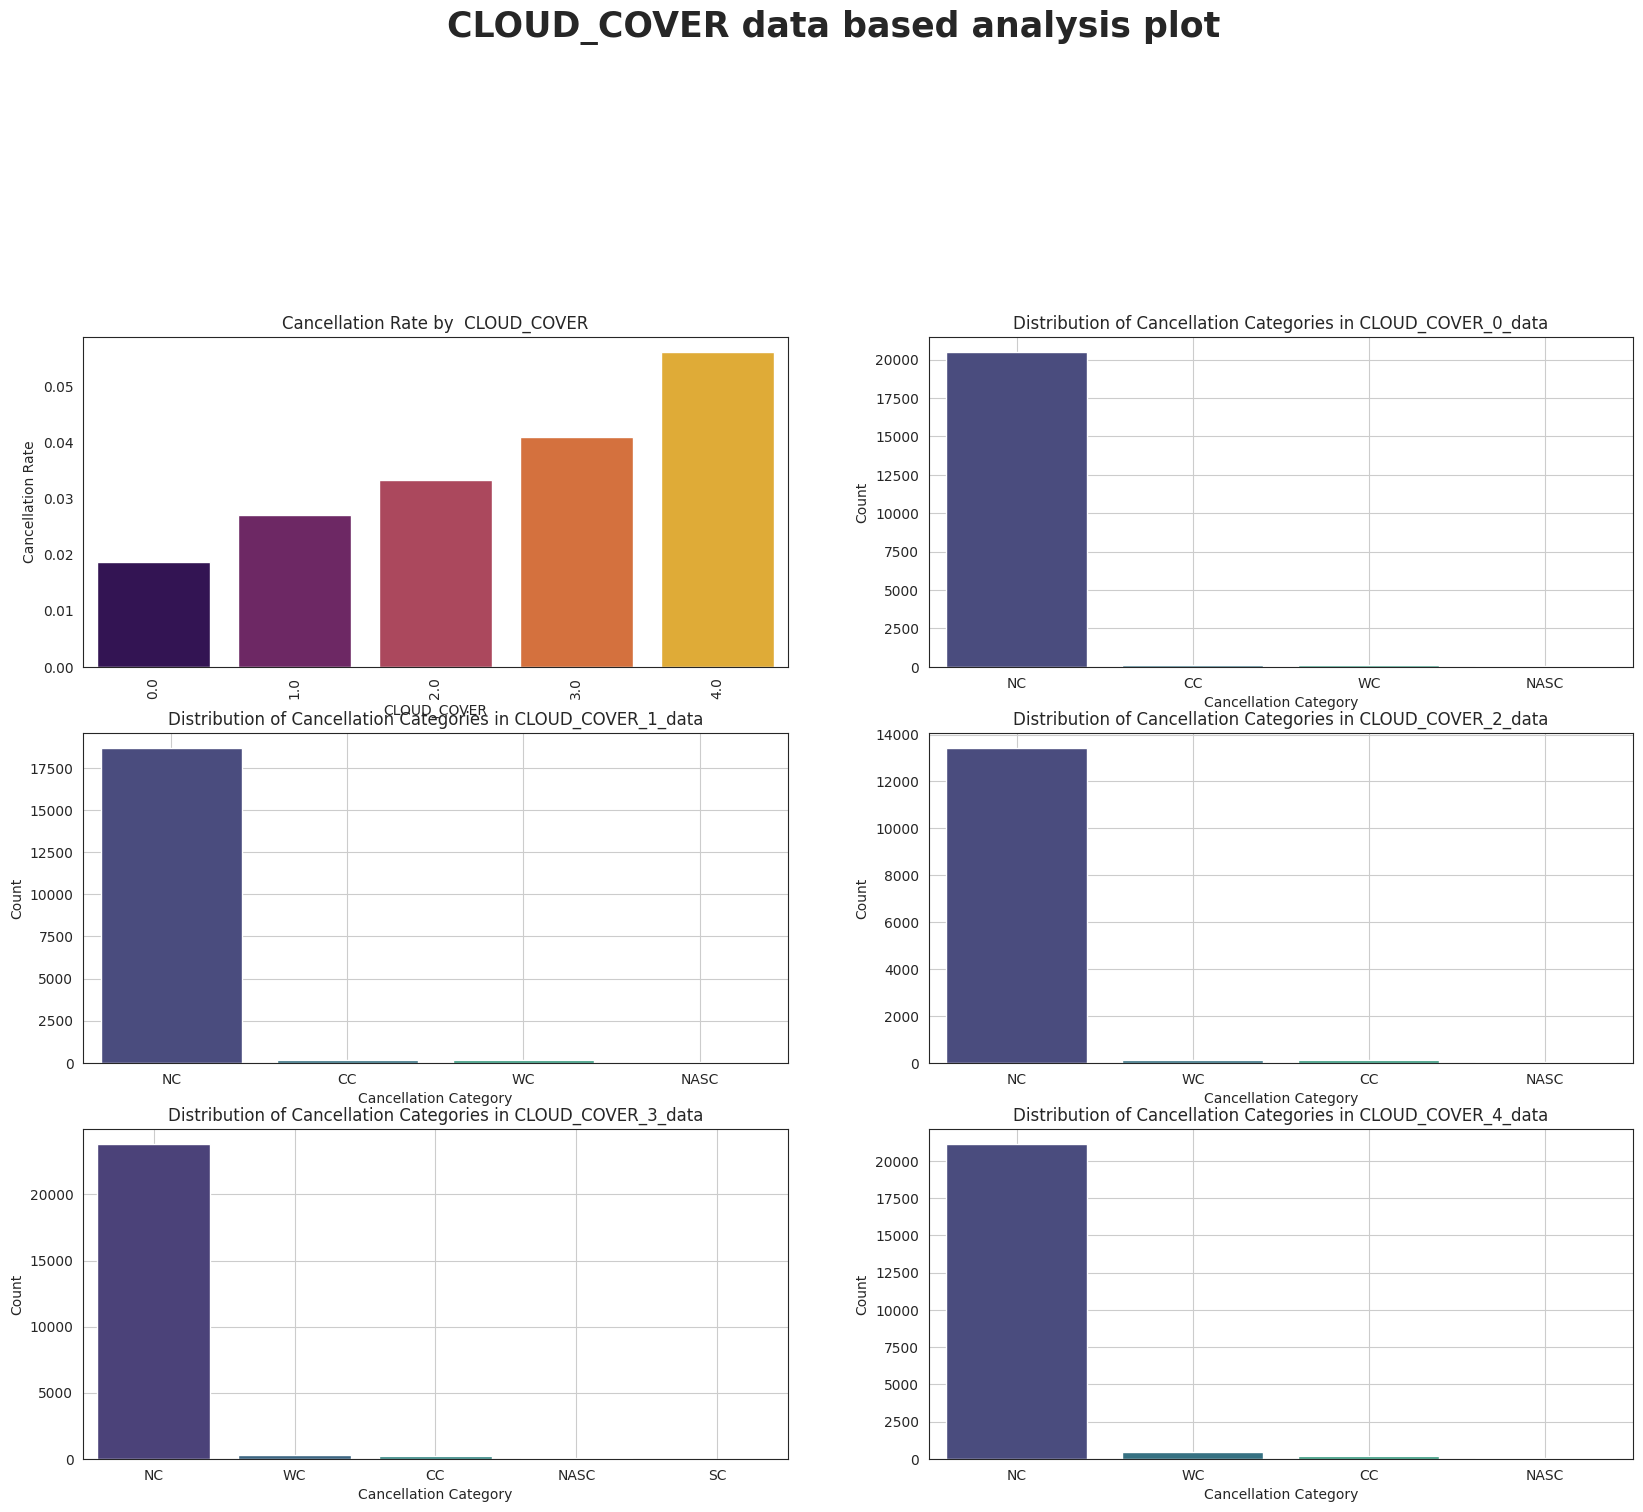

In [128]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("CLOUD_COVER data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")

plt.subplot(6,2,1)
#plt.figure(figsize=(12, 6))
sns.barplot(x='CLOUD_COVER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('CLOUD_COVER')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  CLOUD_COVER')
plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()




plt.subplot(6,2,2)

CLOUD_COVER_0_data = sample_data[sample_data['CLOUD_COVER'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = CLOUD_COVER_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in CLOUD_COVER_0_data')
plt.grid(True)




plt.subplot(6,2,3)

CLOUD_COVER_1_data = sample_data[sample_data['CLOUD_COVER'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = CLOUD_COVER_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in CLOUD_COVER_1_data')
plt.grid(True)



plt.subplot(6,2,4)

CLOUD_COVER_2_data = sample_data[sample_data['CLOUD_COVER'] == 2.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = CLOUD_COVER_2_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in CLOUD_COVER_2_data')
plt.grid(True)



plt.subplot(6,2,5)

CLOUD_COVER_3_data = sample_data[sample_data['CLOUD_COVER'] == 3.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = CLOUD_COVER_3_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in CLOUD_COVER_3_data')
plt.grid(True)




plt.subplot(6,2,6)

CLOUD_COVER_4_data = sample_data[sample_data['CLOUD_COVER'] == 4.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = CLOUD_COVER_4_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in CLOUD_COVER_4_data')
plt.grid(True)


**Observation:**
*Upon scrutinizing cloud cover data against cancellation rates, a notable trend emerges: cancellation rates escalate as cloud cover stages progress from 0 to 4. Stage 4 attains the highest cancellation rate, signaling a potential correlation between dense cloud cover and flight disruptions. Further analysis of specific stages unveils that stages 2 and 3 exhibit weather and carrier cancellations. Intriguingly, stage 4 showcases a marginal rise in weather-related cancellations compared to other stages, suggesting that intensified cloud cover might contribute to flight disruption, warranting closer attention to weather factors for operational stability.*

<ipython-input-129-85cdbb1debd7>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='ACTIVE_WEATHER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-129-85cdbb1debd7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ACTIVE_WEATHER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
<ipython-input-129-85cdbb1debd7>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
<ipython-input-129-85cdbb1debd7>:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

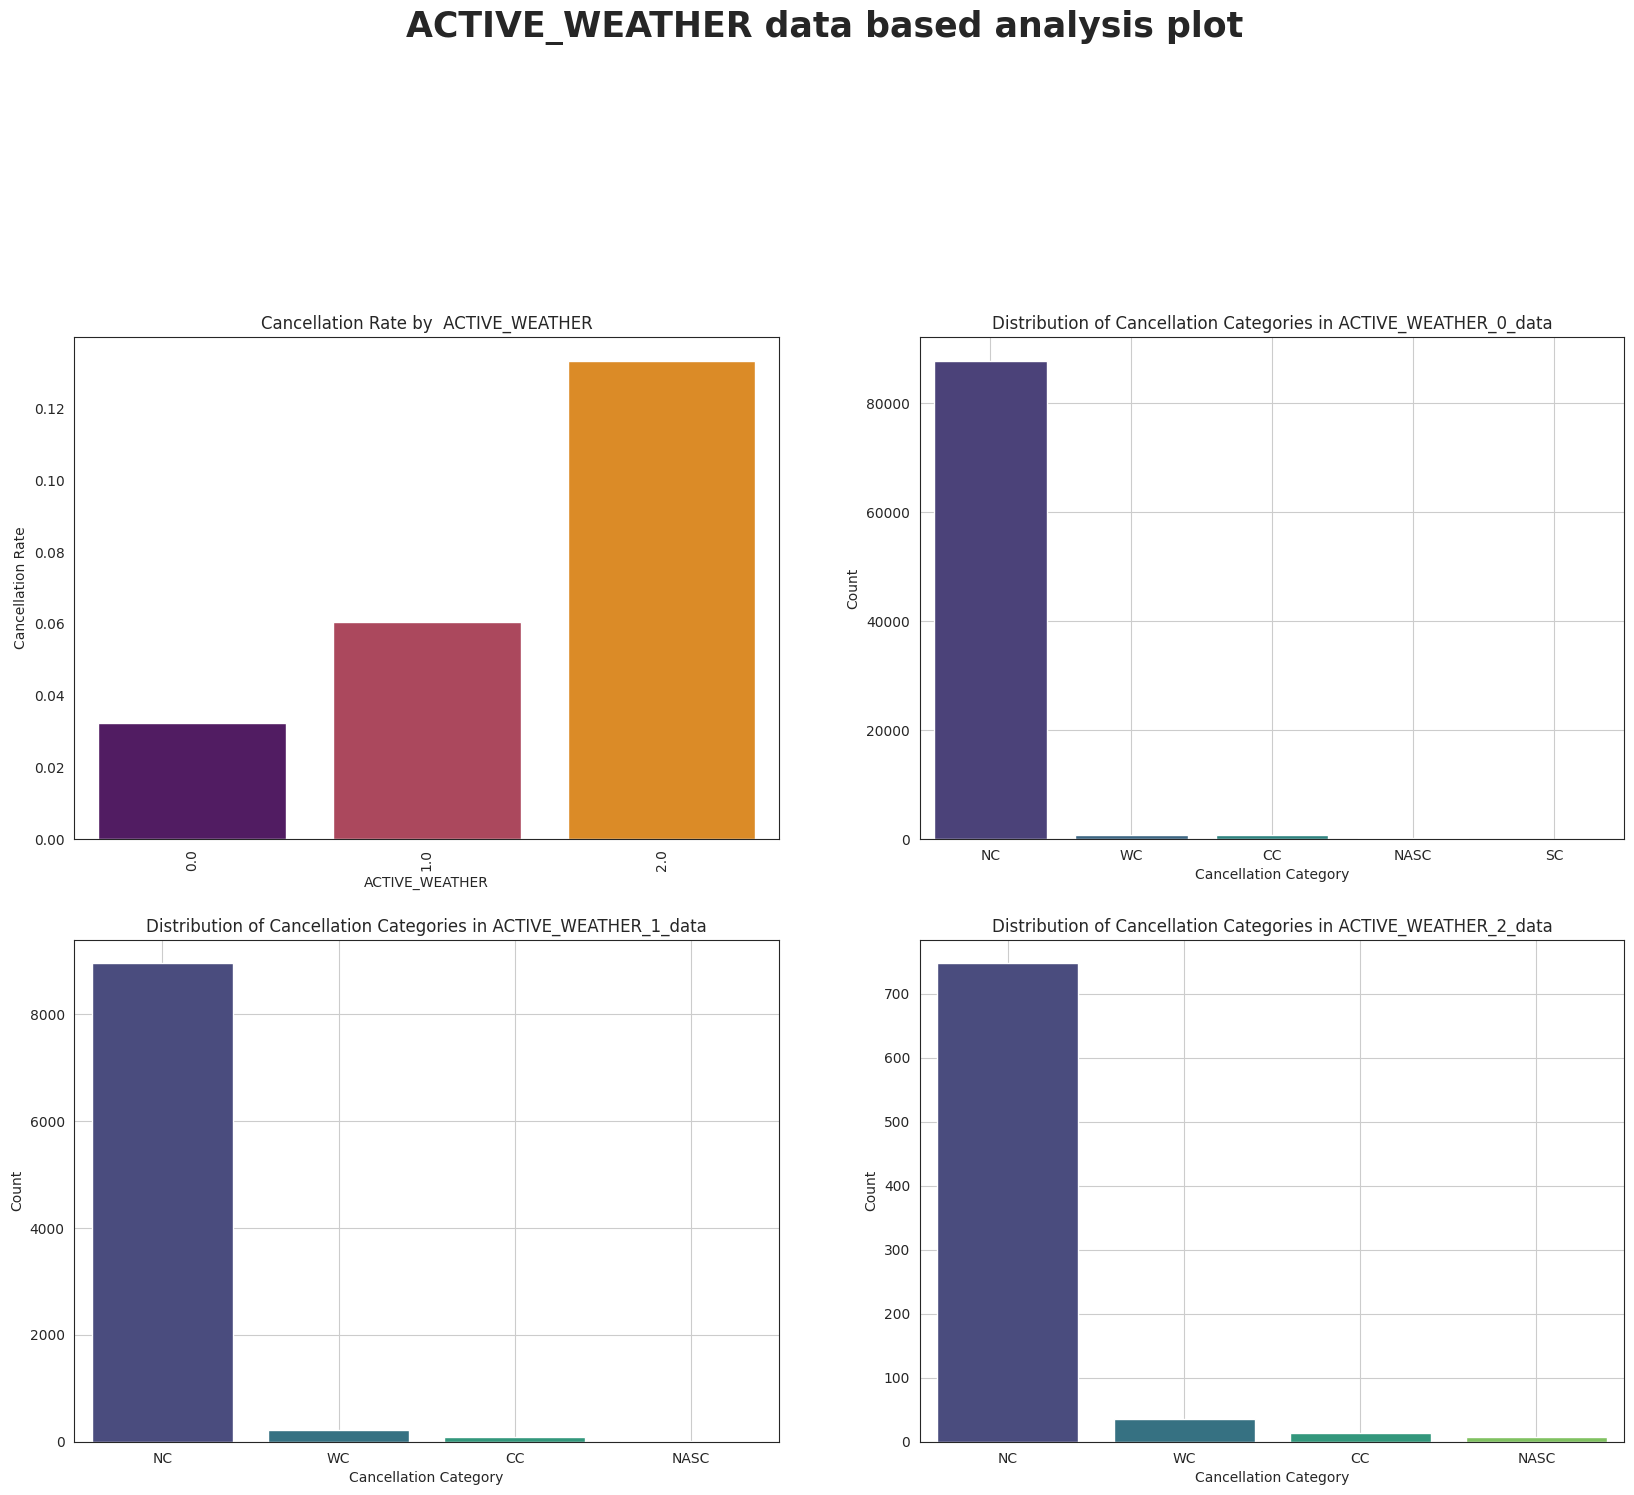

In [129]:
fig=plt.figure(figsize=(20,30))
plt.suptitle("ACTIVE_WEATHER data based analysis plot",fontsize=25,fontweight="bold",ha="center",va="baseline")

plt.subplot(4,2,1)
#plt.figure(figsize=(12, 6))
sns.barplot(x='ACTIVE_WEATHER', y='CANCELLED', data=sample_data, ci=None,palette='inferno')
plt.xlabel('ACTIVE_WEATHER')
plt.ylabel('Cancellation Rate')
plt.title('Cancellation Rate by  ACTIVE_WEATHER')
plt.xticks(rotation=90)
#plt.tight_layout()
#plt.show()




plt.subplot(4,2,2)

ACTIVE_WEATHER_0_data = sample_data[sample_data['ACTIVE_WEATHER'] == 0.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ACTIVE_WEATHER_0_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ACTIVE_WEATHER_0_data')
plt.grid(True)



plt.subplot(4,2,3)

ACTIVE_WEATHER_1_data = sample_data[sample_data['ACTIVE_WEATHER'] == 1.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ACTIVE_WEATHER_1_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ACTIVE_WEATHER_1_data')
plt.grid(True)


plt.subplot(4,2,4)

ACTIVE_WEATHER_2_data = sample_data[sample_data['ACTIVE_WEATHER'] == 2.0]
# Calculate the counts for each category of the 'CANCELLED' column
cancelled_counts = ACTIVE_WEATHER_2_data['CANCELLED'].value_counts()

# Create a dictionary to map numerical codes to category names
category_names = {
    0: 'NC',
    1: 'CC',
    2: 'WC',
    3: 'NASC',
    4: 'SC'
}

# Map the numerical codes to category names for the x-axis labels
cancelled_counts.index = cancelled_counts.index.map(category_names)
#plt.figure(figsize=(8, 6))
ax = sns.barplot(x=cancelled_counts.index, y=cancelled_counts.values, palette='viridis')
plt.xlabel('Cancellation Category')
plt.ylabel('Count')
plt.title('Distribution of Cancellation Categories in ACTIVE_WEATHER_2_data')
plt.grid(True)



plt.show()

**Observation:**
*Through analysis, it becomes evident that flights experience a heightened cancellation rate when facing significant weather events such as Volcanic ash, Thunderstorm, Dust/sandstorm, Tornado, Freezing Precipitation. This underscores the critical role that weather conditions play in flight cancellations within the US aviation landscape, highlighting the need for effective weather management strategies to mitigate disruptions and enhance operational efficiency.*

In [ ]:
#pip install scikit-learn==1.2.2

In [130]:
#removing unwanted column
sample_data.columns

Index(['FL_DATE', 'DEP_HOUR', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'TAIL_NUM', 'ORIGIN', 'DEST',
       'DEP_TIME', 'CRS_DEP_TIME', 'TAXI_OUT', 'DEP_DELAY', 'AIR_TIME',
       'DISTANCE', 'CANCELLED', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'MESONET_STATION', 'YEAR OF MANUFACTURE', 'MANUFACTURER', 'ICAO TYPE',
       'RANGE', 'WIDTH', 'WIND_DIR', 'WIND_SPD', 'WIND_GUST', 'VISIBILITY',
       'TEMPERATURE', 'DEW_POINT', 'REL_HUMIDITY', 'ALTIMETER',
       'LOWEST_CLOUD_LAYER', 'N_CLOUD_LAYER', 'LOW_LEVEL_CLOUD',
       'MID_LEVEL_CLOUD', 'HIGH_LEVEL_CLOUD', 'CLOUD_COVER', 'ACTIVE_WEATHER',
       'Month', 'Day', 'AIRPORT_STATE_NAME'],
      dtype='object')

In [131]:
columns_to_remove = ['FL_DATE', 'MKT_UNIQUE_CARRIER', 'MKT_CARRIER_FL_NUM',
                     'OP_UNIQUE_CARRIER', 'OP_CARRIER_FL_NUM', 'TAIL_NUM',
                     'ORIGIN', 'DEST', 'DEP_TIME', 'CRS_DEP_TIME', 'TAXI_OUT',
                     'DEP_DELAY', 'AIR_TIME', 'ELEVATION', 'MESONET_STATION',
                     'YEAR OF MANUFACTURE', 'MANUFACTURER', 'WIND_DIR', 'Day',
                     'LOW_LEVEL_CLOUD', 'MID_LEVEL_CLOUD', 'HIGH_LEVEL_CLOUD']

sample_data = sample_data.drop(columns=columns_to_remove)
sample_data.columns

Index(['DEP_HOUR', 'DISTANCE', 'CANCELLED', 'LATITUDE', 'LONGITUDE',
       'ICAO TYPE', 'RANGE', 'WIDTH', 'WIND_SPD', 'WIND_GUST', 'VISIBILITY',
       'TEMPERATURE', 'DEW_POINT', 'REL_HUMIDITY', 'ALTIMETER',
       'LOWEST_CLOUD_LAYER', 'N_CLOUD_LAYER', 'CLOUD_COVER', 'ACTIVE_WEATHER',
       'Month', 'AIRPORT_STATE_NAME'],
      dtype='object')

In [132]:
# outlier removal
sample_data = sample_data[(sample_data['DISTANCE'] >= 60) & (sample_data['DISTANCE'] <= 3000)]

In [133]:
sample_data = sample_data[(sample_data['LATITUDE'] >= 18.0) & (sample_data['LATITUDE'] <= 64.0)]

In [134]:
sample_data = sample_data[(sample_data['LONGITUDE'] >= -150.0) & (sample_data['LONGITUDE'] <= -50.0)]

In [135]:
sample_data = sample_data[(sample_data['WIND_SPD'] >= 0.0) & (sample_data['WIND_SPD'] <= 32.0)]

In [136]:
sample_data = sample_data[(sample_data['WIND_GUST'] >= 0.0) & (sample_data['WIND_GUST'] <= 55.0)]

In [137]:
sample_data = sample_data[(sample_data['VISIBILITY'] >= 0.0) & (sample_data['VISIBILITY'] <= 10.0)]

In [138]:
sample_data = sample_data[(sample_data['TEMPERATURE'] >= -20.0) & (sample_data['TEMPERATURE'] <= 42.0)]

In [139]:
sample_data = sample_data[(sample_data['DEW_POINT'] >= -20.0) & (sample_data['DEW_POINT'] <= 30.0)]

In [140]:
sample_data = sample_data[(sample_data['REL_HUMIDITY'] >= 2.93) & (sample_data['REL_HUMIDITY'] <= 100.0)]

In [141]:
sample_data = sample_data[(sample_data['ALTIMETER'] >= 25.0) & (sample_data['ALTIMETER'] <= 30.77)]

In [142]:
sample_data.shape

(96981, 21)

In [143]:
# renaming newly created columns
sample_data.rename(columns={'Month': 'MONTH', 'AIRPORT_STATE_NAME': 'ORIGIN_STATE_NAME'}, inplace=True)

In [144]:
# coverting MONTH coulmn into category data type
sample_data['MONTH'] = sample_data['MONTH'].astype('category')

In [145]:
# coverting DEP_HOUR coulmn into category data type
sample_data['DEP_HOUR'] = sample_data['DEP_HOUR'].astype('category')

In [146]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96981 entries, 3288261 to 3495870
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   DEP_HOUR            96981 non-null  category
 1   DISTANCE            96981 non-null  int64   
 2   CANCELLED           96981 non-null  int8    
 3   LATITUDE            96981 non-null  float64 
 4   LONGITUDE           96981 non-null  float64 
 5   ICAO TYPE           96981 non-null  object  
 6   RANGE               96981 non-null  object  
 7   WIDTH               96981 non-null  object  
 8   WIND_SPD            96981 non-null  float64 
 9   WIND_GUST           96981 non-null  float64 
 10  VISIBILITY          96981 non-null  float64 
 11  TEMPERATURE         96981 non-null  float64 
 12  DEW_POINT           96981 non-null  float64 
 13  REL_HUMIDITY        96981 non-null  float64 
 14  ALTIMETER           96981 non-null  float64 
 15  LOWEST_CLOUD_LAYER  96981 non-nul

In [147]:
# label encoding ICAO TYPE,ORIGIN_STATE_NAME
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit and transform the categorical columns
sample_data['ICAO TYPE'] = label_encoder.fit_transform(sample_data['ICAO TYPE'])
sample_data['ORIGIN_STATE_NAME'] = label_encoder.fit_transform(sample_data['ORIGIN_STATE_NAME'])


# Split Dataset for Training and Testing

In [175]:
from sklearn.model_selection import train_test_split

features= sample_data.drop(columns =['CANCELLED'], axis = 1)
#Select Target
target = sample_data['CANCELLED']
# Set Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .1, random_state = 4)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (87282, 20)
Shape of testing feature: (9699, 20)
Shape of training label: (87282,)
Shape of training label: (9699,)


In [176]:
#performing frequency encoding on RANGE and WIDTH column on train data
# Columns to perform frequency encoding on
columns_to_encode = ['RANGE', 'WIDTH']

# Create a dictionary to store the frequencies
frequency_map = {}

# Calculate frequencies
for column in columns_to_encode:
    frequency = sample_data[column].value_counts(normalize=True)
    frequency_map[column] = frequency

# Map frequencies to the original columns
for column in columns_to_encode:
    X_train[f'{column}_FREQ'] = X_train[column].map(frequency_map[column])

# Drop the original columns if desired
X_train.drop(columns=columns_to_encode, inplace=True)

# Display the modified DataFrame
print(X_train.head())


        DEP_HOUR  DISTANCE   LATITUDE  LONGITUDE  ICAO TYPE  WIND_SPD  \
741437        22      1892  32.733612 -117.18972          4       4.0   
3327440       11       435  33.300000 -104.52944         27      14.0   
2847334        5       189  32.845833  -96.85083         12      10.0   
5795962       18      1042  29.984444  -95.34139         13       6.0   
3357122        8       616  28.429445  -81.30889          4       3.0   

         WIND_GUST  VISIBILITY  TEMPERATURE  DEW_POINT  REL_HUMIDITY  \
741437         0.0        10.0        23.89       2.22         24.20   
3327440        0.0        10.0        21.11      13.89         63.37   
2847334        0.0        10.0        28.89      21.11         62.86   
5795962        0.0        10.0        21.72      12.78         56.77   
3357122        0.0        10.0        23.28      22.22         93.79   

         ALTIMETER  LOWEST_CLOUD_LAYER N_CLOUD_LAYER CLOUD_COVER  \
741437       29.97                 0.0           0.0        

In [177]:
#performing frequency encoding on RANGE and WIDTH column on test data
import pandas as pd

# Assuming you have a DataFrame named sample_data
# Columns to perform frequency encoding on
columns_to_encode = ['RANGE', 'WIDTH']

# Create a dictionary to store the frequencies
frequency_map = {}

# Calculate frequencies
for column in columns_to_encode:
    frequency = sample_data[column].value_counts(normalize=True)
    frequency_map[column] = frequency

# Map frequencies to the original columns
for column in columns_to_encode:
    X_test[f'{column}_FREQ'] = X_test[column].map(frequency_map[column])

# Drop the original columns if desired
X_test.drop(columns=columns_to_encode, inplace=True)

# Display the modified DataFrame
print(X_test.head())


        DEP_HOUR  DISTANCE   LATITUDE  LONGITUDE  ICAO TYPE  WIND_SPD  \
2672394       10       452  39.175835 -76.668890         12       4.0   
2793954       13       335  39.048890 -84.667780         28       9.0   
2244110       17       277  40.692500 -74.168610         27       4.0   
4811896       15       481  37.505280 -77.319725         15      10.0   
2976531       13       155  42.212500 -83.353330         31       6.0   

         WIND_GUST  VISIBILITY  TEMPERATURE  DEW_POINT  REL_HUMIDITY  \
2672394        0.0        10.0        17.22      13.89         80.76   
2793954        0.0        10.0        23.28      17.22         68.76   
2244110        0.0        10.0        20.00       0.61         27.34   
4811896        0.0        10.0        25.61      15.61         53.95   
2976531        0.0        10.0        17.22      11.11         67.29   

         ALTIMETER  LOWEST_CLOUD_LAYER N_CLOUD_LAYER CLOUD_COVER  \
2672394      30.16              2300.0           2.0        

In [178]:
#Standard Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.fit_transform(X_test)

In [ ]:
#Modelling
#Finding best model using GridSearchCV

In [152]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.linear_model import LogisticRegression





def find_best_model_using_gridsearchcv(X,y):
    algos = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [5, 10, 15]
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 20, 30],
            'max_depth': [5, 10, 15]
        }
    },
        'LogisticRegression': {
            'model': LogisticRegression(),
            'params': {


            }
        }
    }

    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

model  best_score                             best_params
0       Decision Tree    0.988910  {'criterion': 'gini', 'max_depth': 10}
1       Random Forest    0.990262   {'max_depth': 15, 'n_estimators': 20}
2  LogisticRegression    0.987478                                      {}

In [ ]:
#Making a Model using Random Forest Classifier


In [162]:
import sklearn
sklearn.__version__

'1.3.2'

In [153]:
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier(n_estimators=30, random_state=0,max_depth=15)

# Fit the random forest classifier to the training data
rf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the random forest classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9886586246004743


In [154]:
from sklearn import metrics

# Assuming y_test and y_pred are your target labels and predictions
print(f"precision: {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"recall: {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"f1-score: {metrics.f1_score(y_test, y_pred, average='macro')}")
print(f"Confusion Matrix: \n{metrics.confusion_matrix(y_test, y_pred)}")


precision: 0.6526752210365309
recall: 0.5895206607309159
f1-score: 0.5807937087891849
Confusion Matrix: 
[[9466   12   12    0]
 [   6   41   27    1]
 [   7   21   80    1]
 [   1    3   19    2]]


In [ ]:
#pip install --upgrade joblib

In [155]:
import joblib
import numpy as np

# Save the frequency map to a file
joblib.dump(frequency_map, 'frequency_encoded_values.pkl')

# Save the modified numpy array to a file
np.save('frequency_encoded_data.npy', X_test)


In [156]:
import joblib
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder_icao = LabelEncoder()
label_encoder_origin_state = LabelEncoder()

# Fit and transform the categorical columns
sample_data['ICAO TYPE'] = label_encoder_icao.fit_transform(sample_data['ICAO TYPE'])
sample_data['ORIGIN_STATE_NAME'] = label_encoder_origin_state.fit_transform(sample_data['ORIGIN_STATE_NAME'])

# Save the label encoders to a file
label_encoders = {'ICAO TYPE': label_encoder_icao, 'ORIGIN_STATE_NAME': label_encoder_origin_state}
joblib.dump(label_encoders, 'label_encoders.pkl')


['label_encoders.pkl']

In [157]:
import joblib

# Save the trained model to a file
joblib.dump(rf, 'trained_model.pkl')


['trained_model.pkl']

In [158]:
#Forecasts from a machine learning model
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import joblib


# Create a label encoder
label_encoder = LabelEncoder()

# Load the trained model
model = joblib.load('trained_model.pkl')

# Load the label encoders and frequency encoded values
label_encoders = joblib.load('label_encoders.pkl')
frequency_encoded_values = joblib.load('frequency_encoded_values.pkl')

def predict_cancellation(DEP_HOUR, DISTANCE, LATITUDE, LONGITUDE, ICAO_TYPE, WIND_SPD, WIND_GUST, VISIBILITY,
                         TEMPERATURE, DEW_POINT, REL_HUMIDITY, ALTIMETER, LOWEST_CLOUD_LAYER, N_CLOUD_LAYER,
                         CLOUD_COVER, ACTIVE_WEATHER, MONTH, ORIGIN_STATE_NAME, RANGE, WIDTH):
    ICAO_TYPE = label_encoder.fit_transform([ICAO_TYPE])
    ORIGIN_STATE_NAME = label_encoder.fit_transform([ORIGIN_STATE_NAME])
    # Create a DataFrame with the input features
    input_data = pd.DataFrame({
        'DEP_HOUR': [DEP_HOUR],
        'DISTANCE': [DISTANCE],
        'LATITUDE': [LATITUDE],
        'LONGITUDE': [LONGITUDE],
        'ICAO_TYPE': [ICAO_TYPE],
        'WIND_SPD': [WIND_SPD],
        'WIND_GUST': [WIND_GUST],
        'VISIBILITY': [VISIBILITY],
        'TEMPERATURE': [TEMPERATURE],
        'DEW_POINT': [DEW_POINT],
        'REL_HUMIDITY': [REL_HUMIDITY],
        'ALTIMETER': [ALTIMETER],
        'LOWEST_CLOUD_LAYER': [LOWEST_CLOUD_LAYER],
        'N_CLOUD_LAYER': [N_CLOUD_LAYER],
        'CLOUD_COVER': [CLOUD_COVER],
        'ACTIVE_WEATHER': [ACTIVE_WEATHER],
        'MONTH': [MONTH],
        'ORIGIN_STATE_NAME': [ORIGIN_STATE_NAME],
        'RANGE': [RANGE],
        'WIDTH': [WIDTH]
    })



    # Apply frequency encoding to RANGE and WIDTH
    input_data['RANGE'] = input_data['RANGE'].map(frequency_encoded_values['RANGE'])
    input_data['WIDTH'] = input_data['WIDTH'].map(frequency_encoded_values['WIDTH'])




    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    # Scale trainint data
    input_data = scaler.fit_transform(input_data)

    # Use the trained model to make predictions
    predictions = model.predict(input_data)

    if predictions[0] == 0:
        return 'Not Cancelled'
    elif predictions[0] == 1:
        return 'Carrier Cancellation'
    elif predictions[0] == 2:
        return 'Weather Cancellation'
    elif predictions[0] == 3:
        return 'National Air System Cancellation'
    else:
        return 'Security Cancellation'

In [159]:
# Example usage
prediction = predict_cancellation(DEP_HOUR=10, DISTANCE=1000, LATITUDE=40.0, LONGITUDE=-120.0,
                                   ICAO_TYPE='E190', WIND_SPD=15.0, WIND_GUST=20.0, VISIBILITY=2.0,
                                   TEMPERATURE=20.0, DEW_POINT=10.0, REL_HUMIDITY=50.0, ALTIMETER=29.8,
                                   LOWEST_CLOUD_LAYER=26000.0, N_CLOUD_LAYER=2.0,
                                   CLOUD_COVER=1.0, ACTIVE_WEATHER=1.0, MONTH=12, ORIGIN_STATE_NAME='New York',
                                   RANGE='Medium Range', WIDTH='Narrow-body')
print(f"Predicted Cancellation Type: {prediction}")

Predicted Cancellation Type: Not Cancelled


## Streamlit Application

In [ ]:
! pip install -q streamlit.

ERROR: Invalid requirement: 'streamlit.'


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Load the trained model and frequency-encoded values
model = open("trained_model.pkl", "rb")
rf = joblib.load(model)

frequency_path = open("frequency_encoded_values.pkl", "rb")
frequency_encoded_values = joblib.load(frequency_path)




# Create input fields for user input
st.title("FLIGHT CANCELLATION PREDICTION PROJECT APP")
#Create input fields for user input
DEP_HOUR = st.sidebar.slider("Departure Hour", 0, 23, step=1)
DISTANCE = st.sidebar.number_input("Distance (miles)")
LATITUDE = st.sidebar.slider("Latitude", 18.0, 64.0, step=1.0)
LONGITUDE=st.sidebar.slider("Longitude", -150.0, -50.0, step=1.0)
TEMPERATURE = st.sidebar.slider("Temperature", -20.0, 42.0, step=1.0)
DEW_POINT = st.sidebar.slider("Dew point", -20.0, 30.0, step=1.0)
REL_HUMIDITY= st.sidebar.slider("Relative humidity", 2.0, 100.0, step=1.0)
LOWEST_CLOUD_LAYER=st.sidebar.slider("Lowest Cloud Layer", 0.0, 33000.0, step=100.0)
MONTH=st.sidebar.slider("Month", 1, 12, step=1)
WIND_SPD=st.sidebar.slider("Wind Speed", 0.0, 32.0, step=1.0)
WIND_GUST=st.sidebar.slider("Wind Gust", 0.0, 55.0, step=1.0)
VISIBILITY=st.sidebar.slider("Visibility", 0.0, 10.0, step=1.0)
ALTIMETER=st.sidebar.slider("Atmospheric Pressure", 25.0, 31.0, step=0.1)
ICAO_TYPE = st.sidebar.select_slider("ICAO Type", ['A321', 'B39M' ,'E75L', 'B737' ,
                                        'A320', 'A319' ,'B38M', 'B738' ,'CRJ2', 'A20N','CRJ7',
                                        'B712' ,'E145' ,'CRJ9', 'B739', 'B77W' ,'A21N',
                                        'B752' ,'B764' ,'E170','E190' ,'BCS3', 'B772', 'BCS1',
                                        'B789', 'DH8D', 'A332' ,'B753' ,'B763' ,'B78X','A333',
                                        'B788', 'A339', 'A359'])
ORIGIN_STATE_NAME = st.sidebar.select_slider("Origin State Name", ['Alaska', 'Alabama',
                                    'Arkansas', 'Arizona', 'California','Colorado',
                                    'Connecticut', 'Delaware', 'Florida', 'Georgia',
                                    'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
                                    'Kansas','Kentucky', 'Louisiana', 'Massachusetts',
                                    'Maryland', 'Maine','Michigan', 'Minnesota', 'Missouri',
                                    'Mississippi', 'Montana','North Carolina', 'North Dakota',
                                    'Nebraska', 'New Hampshire','New Jersey', 'New Mexico',
                                    'Nevada', 'New York', 'Ohio','Oklahoma', 'Oregon',
                                    'Pennsylvania', 'Puerto Rico','Rhode Island',
                                    'South Carolina', 'South Dakota', 'Tennessee',
                                    'U.S. Pacific Trust Territories and Possessions',
                                    'Texas', 'Utah','Virginia', 'U.S. Virgin Islands',
                                    'Vermont', 'Washington','Wisconsin', 'West Virginia',
                                    'Wyoming'])

RANGE = st.sidebar.select_slider("Range", ["Short Range", "Medium Range", "Long Range"])
WIDTH = st.sidebar.select_slider("Width", ["Narrow-body", "Wide-body"])
ACTIVE_WEATHER=st.sidebar.select_slider("Active Weather", [0.0, 1.0, 2.0])
CLOUD_COVER=st.sidebar.select_slider("Cloud Cover", [1.0, 2.0, 3.0, 4.0, 0.0])
N_CLOUD_LAYER=st.sidebar.select_slider("N_Cloud Layer", [1.0, 3.0, 0.0, 2.0, 4.0])


# Create and fit LabelEncoders for categorical features
LE_ICAO_TYPE = LabelEncoder()
LE_ICAO_TYPE.fit( ['A321', 'B39M' ,'E75L', 'B737' ,
                                        'A320', 'A319' ,'B38M', 'B738' ,'CRJ2', 'A20N','CRJ7',
                                        'B712' ,'E145' ,'CRJ9', 'B739', 'B77W' ,'A21N',
                                        'B752' ,'B764' ,'E170','E190' ,'BCS3', 'B772', 'BCS1',
                                        'B789', 'DH8D', 'A332' ,'B753' ,'B763' ,'B78X','A333',
                                        'B788', 'A339', 'A359'])

LE_ORIGIN_STATE_NAME = LabelEncoder()
LE_ORIGIN_STATE_NAME.fit(['Alaska', 'Alabama',
                                    'Arkansas', 'Arizona', 'California','Colorado',
                                    'Connecticut', 'Delaware', 'Florida', 'Georgia',
                                    'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
                                    'Kansas','Kentucky', 'Louisiana', 'Massachusetts',
                                    'Maryland', 'Maine','Michigan', 'Minnesota', 'Missouri',
                                    'Mississippi', 'Montana','North Carolina', 'North Dakota',
                                    'Nebraska', 'New Hampshire','New Jersey', 'New Mexico',
                                    'Nevada', 'New York', 'Ohio','Oklahoma', 'Oregon',
                                    'Pennsylvania', 'Puerto Rico','Rhode Island',
                                    'South Carolina', 'South Dakota', 'Tennessee',
                                    'U.S. Pacific Trust Territories and Possessions',
                                    'Texas', 'Utah','Virginia', 'U.S. Virgin Islands',
                                    'Vermont', 'Washington','Wisconsin', 'West Virginia',
                                    'Wyoming'])  # List all values from ORIGIN_STATE_NAME

# Create a function to predict cancellation
def predict_cancellation(DEP_HOUR, DISTANCE, LATITUDE, LONGITUDE, ICAO_TYPE_encoded,
                          WIND_SPD, WIND_GUST, VISIBILITY, TEMPERATURE, DEW_POINT,
                          REL_HUMIDITY, ALTIMETER, LOWEST_CLOUD_LAYER, N_CLOUD_LAYER,
                          CLOUD_COVER, ACTIVE_WEATHER, MONTH, ORIGIN_STATE_NAME_encoded,
                          RANGE, WIDTH):
    ICAO_TYPE_encoded = LE_ICAO_TYPE.transform([ICAO_TYPE])[0]
    ORIGIN_STATE_NAME_encoded = LE_ORIGIN_STATE_NAME.transform([ORIGIN_STATE_NAME])[0]
    # Create a DataFrame with user input
    input_data = pd.DataFrame({
        'DEP_HOUR': [DEP_HOUR],
        'DISTANCE': [DISTANCE],
        'LATITUDE': [LATITUDE],
        'LONGITUDE': [LONGITUDE],
        'ICAO_TYPE': [ICAO_TYPE_encoded],
        'WIND_SPD': [WIND_SPD],
        'WIND_GUST': [WIND_GUST],
        'VISIBILITY': [VISIBILITY],
        'TEMPERATURE': [TEMPERATURE],
        'DEW_POINT': [DEW_POINT],
        'REL_HUMIDITY': [REL_HUMIDITY],
        'ALTIMETER': [ALTIMETER],
        'LOWEST_CLOUD_LAYER': [LOWEST_CLOUD_LAYER],
        'N_CLOUD_LAYER': [N_CLOUD_LAYER],
        'CLOUD_COVER': [CLOUD_COVER],
        'ACTIVE_WEATHER': [ACTIVE_WEATHER],
        'MONTH': [MONTH],
        'ORIGIN_STATE_NAME': [ORIGIN_STATE_NAME_encoded],
        'RANGE': [RANGE],
        'WIDTH': [WIDTH]
    })

    # Apply frequency encoding to RANGE and WIDTH
    input_data['RANGE'] = input_data['RANGE'].map(frequency_encoded_values['RANGE'])
    input_data['WIDTH'] = input_data['WIDTH'].map(frequency_encoded_values['WIDTH'])

    # Scale the input data
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Make a prediction using the random forest classifier
    prediction = rf.predict(input_data_scaled)
    return prediction

# Create a prediction button
prediction_button = st.sidebar.button("Predict Cancellation")

# Perform prediction when the button is clicked
if prediction_button:
    prediction = predict_cancellation(DEP_HOUR, DISTANCE, LATITUDE, LONGITUDE,ICAO_TYPE,
                                      WIND_SPD, WIND_GUST, VISIBILITY, TEMPERATURE,
                                      DEW_POINT, REL_HUMIDITY, ALTIMETER,
                                      LOWEST_CLOUD_LAYER, N_CLOUD_LAYER, CLOUD_COVER,
                                      ACTIVE_WEATHER, MONTH,ORIGIN_STATE_NAME,
                                      RANGE, WIDTH)
    input_data = pd.DataFrame(prediction, index=[0])

    # Display the prediction
    if prediction == 0:
        st.write('Flight Not Cancelled', font=('Arial', 24, 'bold'))
        st.image("not_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 1:
        st.write('Carrier Cancellation', font=('Arial', 24, 'bold'))
        st.image("Carrier_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 2:
        st.write('Weather Cancellation', font=('Arial', 24, 'bold'))
        st.image("Weather_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 3:
        st.write('National Air System Cancellation', font=('Arial', 24, 'bold'))
        st.image("National_cancelled_image.jpg")  # Display image for "Not Cancelled"
    else:
        st.write('Security Cancellation', font=('Arial', 24, 'bold'))
        st.image("Security_cancelled_image.jpg")  # Display image for "Not Cancelled"

Writing app.py


In [ ]:
!streamlit run app.py

# Creating An ANN Model for prediction of Flight Cancellation

In [160]:
sample_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96981 entries, 3288261 to 3495870
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   DEP_HOUR            96981 non-null  category
 1   DISTANCE            96981 non-null  int64   
 2   CANCELLED           96981 non-null  int8    
 3   LATITUDE            96981 non-null  float64 
 4   LONGITUDE           96981 non-null  float64 
 5   ICAO TYPE           96981 non-null  int64   
 6   RANGE               96981 non-null  object  
 7   WIDTH               96981 non-null  object  
 8   WIND_SPD            96981 non-null  float64 
 9   WIND_GUST           96981 non-null  float64 
 10  VISIBILITY          96981 non-null  float64 
 11  TEMPERATURE         96981 non-null  float64 
 12  DEW_POINT           96981 non-null  float64 
 13  REL_HUMIDITY        96981 non-null  float64 
 14  ALTIMETER           96981 non-null  float64 
 15  LOWEST_CLOUD_LAYER  96981 non-nul

In [161]:
sample_data['CANCELLED'].value_counts()

CANCELLED
0    94915
2     1064
1      814
3      187
4        1
Name: count, dtype: int64

In [164]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [185]:
y.shape

(96981, 5)

In [186]:
from tensorflow.keras.utils import to_categorical
num_classes = 5  # Replace this with the actual number of classes

# Convert y_train and y_test to one-hot encoding
y_train_one_hot = to_categorical(y_train, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test, num_classes=num_classes)


In [188]:
y_test_one_hot.shape

(9699, 5)

In [189]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the model
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))  # Optional: Dropout to prevent overfitting
model.add(Dense(16, activation='relu'))

# Output layer
model.add(Dense(5, activation='softmax'))  # 5 classes for multiclass classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 64)                  │           1,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 5)                   │              85 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,037 (15.77 KB)

 Trainable params: 4,037 (15.77 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# Train the model
history = model.fit(X_train, y_train_one_hot, validation_data=(X_test, y_test_one_hot), epochs=20, batch_size=32)

Epoch 1/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.9757 - loss: 0.1243 - val_accuracy: 0.9873 - val_loss: 0.0365
Epoch 2/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.9849 - loss: 0.0437 - val_accuracy: 0.9877 - val_loss: 0.0348
Epoch 3/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9878 - loss: 0.0365 - val_accuracy: 0.9870 - val_loss: 0.0348
Epoch 4/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9865 - loss: 0.0367 - val_accuracy: 0.9876 - val_loss: 0.0340
Epoch 5/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.9878 - loss: 0.0336 - val_accuracy: 0.9878 - val_loss: 0.0326
Epoch 6/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9874 - loss: 0.0348 - val_accuracy: 0.9873 - val_loss: 0.0337
Epoch 7/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.9869 - loss: 0.0360 - val_accuracy: 0.9876 - val_loss: 0.0326
Epoch 8/20
2728/2728 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9876 - loss: 0.0

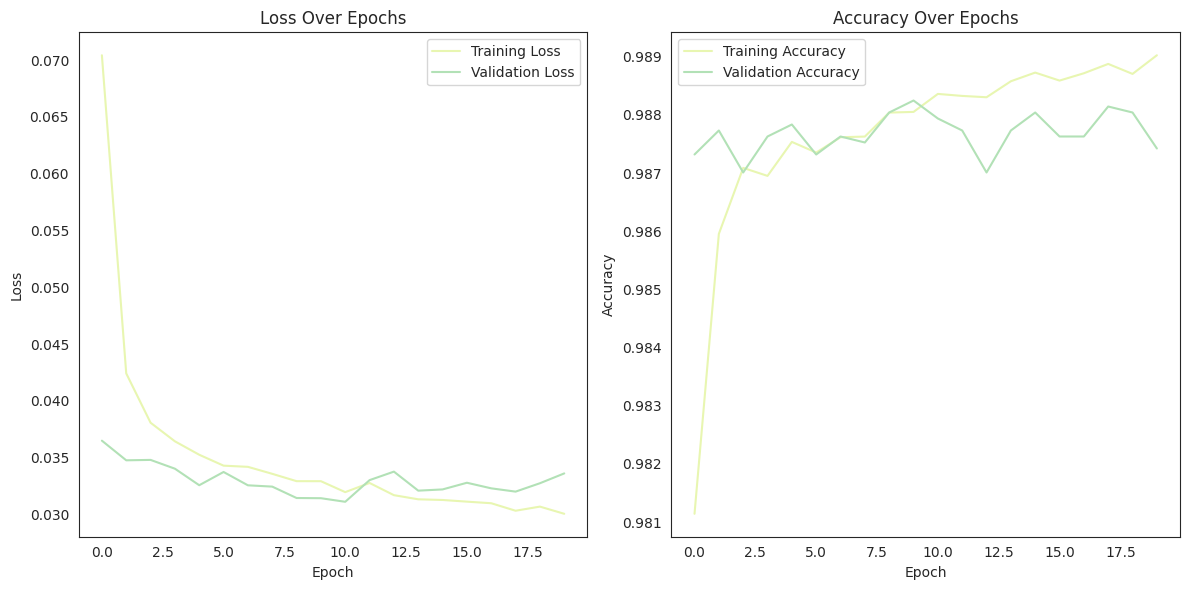

In [191]:
# Extract accuracy and loss from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training and validation loss
plt.figure(figsize=(12, 6))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()


In [192]:
from sklearn.metrics import accuracy_score

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions from one-hot encoded to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_one_hot, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f'Accuracy: {accuracy:.4f}')


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9874


In [193]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_test_labels, y_pred_labels)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9490
           1       0.48      0.51      0.49        75
           2       0.55      0.72      0.63       109
           3       0.00      0.00      0.00        25

    accuracy                           0.99      9699
   macro avg       0.51      0.56      0.53      9699
weighted avg       0.99      0.99      0.99      9699



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


304/304 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Confusion Matrix Shape: (4, 4)


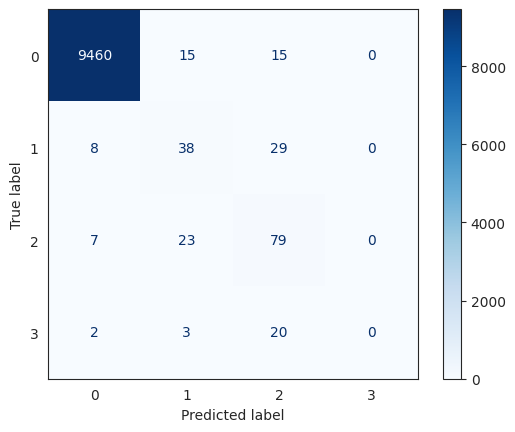

In [201]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Make predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test_one_hot, axis=1), y_pred_classes)

# Ensure the shape of the confusion matrix is correct
num_classes = conf_matrix.shape[0]
print(f"Confusion Matrix Shape: {conf_matrix.shape}")

# Display confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=[str(i) for i in range(num_classes)])
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [203]:
X_test[0:5]

array([[-0.51738407, -0.61263731,  0.38747846,  1.01874103, -0.35637273,
        -0.63125727, -0.38492   ,  0.31640825,  0.13549581,  0.57947885,
         0.79043566,  0.61886121, -0.52189639,  0.4571009 ,  0.62113846,
        -0.32791827, -0.45318401, -0.31396863,  0.72188252,  0.09233941],
       [ 0.04202748, -0.81977037,  0.36470702,  0.53679548,  1.11313213,
         0.42138083, -0.38492   ,  0.31640825,  0.71032313,  0.89575903,
         0.23542938,  0.05244776, -0.1820551 ,  0.4571009 , -0.74960601,
        -0.32791827, -0.45318401, -0.5093939 , -1.26031861,  0.09233941],
       [ 0.78790955, -0.92245171,  0.65953837,  1.16938679,  1.02128808,
        -0.63125727, -0.38492   ,  0.31640825,  0.39919547, -0.68184273,
        -1.68026732,  0.41289268,  1.2024835 ,  1.37328641,  0.62113846,
        -0.32791827, -0.45318401,  0.33744895, -1.26031861,  0.09233941],
       [ 0.41496852, -0.56129664,  0.08781371,  0.97952721, -0.08084057,
         0.63190845, -0.38492   ,  0.31640825,  

In [204]:
y_test[0:5]

2672394    0
2793954    0
2244110    0
4811896    0
2976531    0
Name: CANCELLED, dtype: int8

In [207]:
import numpy as np

# Convert the list to a NumPy array
x_input = np.array([[-0.51738407, -0.61263731,  0.38747846,  1.01874103, -0.35637273,
        -0.63125727, -0.38492   ,  0.31640825,  0.13549581,  0.57947885,
         0.79043566,  0.61886121, -0.52189639,  0.4571009 ,  0.62113846,
        -0.32791827, -0.45318401, -0.31396863,  0.72188252,  0.09233941]])

# Make predictions
y_pred = model.predict(x_input)

# Display the predictions
print(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
[[9.9997294e-01 3.8539797e-06 2.3056296e-05 1.9437486e-07 4.3754325e-22]]


In [209]:
predicted_class_index = np.argmax(y_pred[0])

# Display the index of the predicted class
print(predicted_class_index)

0


In [210]:
# Save the entire model to a HDF5 file
model.save('ann_model.h5')

## Streamlit Application

In [ ]:
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import load_model
from sklearn.pipeline import Pipeline

# Load the trained model and frequency-encoded values
#model = open("trained_model.pkl", "rb")
#rf = joblib.load(model)

frequency_path = open("frequency_encoded_values.pkl", "rb")
frequency_encoded_values = joblib.load(frequency_path)

# Load the saved model
model = load_model('ann_model.h5')


# Create input fields for user input
st.title("FLIGHT CANCELLATION PREDICTION PROJECT APP")
#Create input fields for user input
DEP_HOUR = st.sidebar.slider("Departure Hour", 0, 23, step=1)
DISTANCE = st.sidebar.number_input("Distance (miles)")
LATITUDE = st.sidebar.slider("Latitude", 18.0, 64.0, step=1.0)
LONGITUDE=st.sidebar.slider("Longitude", -150.0, -50.0, step=1.0)
TEMPERATURE = st.sidebar.slider("Temperature", -20.0, 42.0, step=1.0)
DEW_POINT = st.sidebar.slider("Dew point", -20.0, 30.0, step=1.0)
REL_HUMIDITY= st.sidebar.slider("Relative humidity", 2.0, 100.0, step=1.0)
LOWEST_CLOUD_LAYER=st.sidebar.slider("Lowest Cloud Layer", 0.0, 33000.0, step=100.0)
MONTH=st.sidebar.slider("Month", 1, 12, step=1)
WIND_SPD=st.sidebar.slider("Wind Speed", 0.0, 32.0, step=1.0)
WIND_GUST=st.sidebar.slider("Wind Gust", 0.0, 55.0, step=1.0)
VISIBILITY=st.sidebar.slider("Visibility", 0.0, 10.0, step=1.0)
ALTIMETER=st.sidebar.slider("Atmospheric Pressure", 25.0, 31.0, step=0.1)
ICAO_TYPE = st.sidebar.select_slider("ICAO Type", ['A321', 'B39M' ,'E75L', 'B737' ,
                                        'A320', 'A319' ,'B38M', 'B738' ,'CRJ2', 'A20N','CRJ7',
                                        'B712' ,'E145' ,'CRJ9', 'B739', 'B77W' ,'A21N',
                                        'B752' ,'B764' ,'E170','E190' ,'BCS3', 'B772', 'BCS1',
                                        'B789', 'DH8D', 'A332' ,'B753' ,'B763' ,'B78X','A333',
                                        'B788', 'A339', 'A359'])
ORIGIN_STATE_NAME = st.sidebar.select_slider("Origin State Name", ['Alaska', 'Alabama',
                                    'Arkansas', 'Arizona', 'California','Colorado',
                                    'Connecticut', 'Delaware', 'Florida', 'Georgia',
                                    'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
                                    'Kansas','Kentucky', 'Louisiana', 'Massachusetts',
                                    'Maryland', 'Maine','Michigan', 'Minnesota', 'Missouri',
                                    'Mississippi', 'Montana','North Carolina', 'North Dakota',
                                    'Nebraska', 'New Hampshire','New Jersey', 'New Mexico',
                                    'Nevada', 'New York', 'Ohio','Oklahoma', 'Oregon',
                                    'Pennsylvania', 'Puerto Rico','Rhode Island',
                                    'South Carolina', 'South Dakota', 'Tennessee',
                                    'U.S. Pacific Trust Territories and Possessions',
                                    'Texas', 'Utah','Virginia', 'U.S. Virgin Islands',
                                    'Vermont', 'Washington','Wisconsin', 'West Virginia',
                                    'Wyoming'])

RANGE = st.sidebar.select_slider("Range", ["Short Range", "Medium Range", "Long Range"])
WIDTH = st.sidebar.select_slider("Width", ["Narrow-body", "Wide-body"])
ACTIVE_WEATHER=st.sidebar.select_slider("Active Weather", [0.0, 1.0, 2.0])
CLOUD_COVER=st.sidebar.select_slider("Cloud Cover", [1.0, 2.0, 3.0, 4.0, 0.0])
N_CLOUD_LAYER=st.sidebar.select_slider("N_Cloud Layer", [1.0, 3.0, 0.0, 2.0, 4.0])


# Create and fit LabelEncoders for categorical features
LE_ICAO_TYPE = LabelEncoder()
LE_ICAO_TYPE.fit( ['A321', 'B39M' ,'E75L', 'B737' ,
                                        'A320', 'A319' ,'B38M', 'B738' ,'CRJ2', 'A20N','CRJ7',
                                        'B712' ,'E145' ,'CRJ9', 'B739', 'B77W' ,'A21N',
                                        'B752' ,'B764' ,'E170','E190' ,'BCS3', 'B772', 'BCS1',
                                        'B789', 'DH8D', 'A332' ,'B753' ,'B763' ,'B78X','A333',
                                        'B788', 'A339', 'A359'])

LE_ORIGIN_STATE_NAME = LabelEncoder()
LE_ORIGIN_STATE_NAME.fit(['Alaska', 'Alabama',
                                    'Arkansas', 'Arizona', 'California','Colorado',
                                    'Connecticut', 'Delaware', 'Florida', 'Georgia',
                                    'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana',
                                    'Kansas','Kentucky', 'Louisiana', 'Massachusetts',
                                    'Maryland', 'Maine','Michigan', 'Minnesota', 'Missouri',
                                    'Mississippi', 'Montana','North Carolina', 'North Dakota',
                                    'Nebraska', 'New Hampshire','New Jersey', 'New Mexico',
                                    'Nevada', 'New York', 'Ohio','Oklahoma', 'Oregon',
                                    'Pennsylvania', 'Puerto Rico','Rhode Island',
                                    'South Carolina', 'South Dakota', 'Tennessee',
                                    'U.S. Pacific Trust Territories and Possessions',
                                    'Texas', 'Utah','Virginia', 'U.S. Virgin Islands',
                                    'Vermont', 'Washington','Wisconsin', 'West Virginia',
                                    'Wyoming'])  # List all values from ORIGIN_STATE_NAME

# Create a function to predict cancellation
def predict_cancellation(DEP_HOUR, DISTANCE, LATITUDE, LONGITUDE, ICAO_TYPE_encoded,
                          WIND_SPD, WIND_GUST, VISIBILITY, TEMPERATURE, DEW_POINT,
                          REL_HUMIDITY, ALTIMETER, LOWEST_CLOUD_LAYER, N_CLOUD_LAYER,
                          CLOUD_COVER, ACTIVE_WEATHER, MONTH, ORIGIN_STATE_NAME_encoded,
                          RANGE, WIDTH):
    ICAO_TYPE_encoded = LE_ICAO_TYPE.transform([ICAO_TYPE])[0]
    ORIGIN_STATE_NAME_encoded = LE_ORIGIN_STATE_NAME.transform([ORIGIN_STATE_NAME])[0]
    # Create a DataFrame with user input
    input_data = pd.DataFrame({
        'DEP_HOUR': [DEP_HOUR],
        'DISTANCE': [DISTANCE],
        'LATITUDE': [LATITUDE],
        'LONGITUDE': [LONGITUDE],
        'ICAO_TYPE': [ICAO_TYPE_encoded],
        'WIND_SPD': [WIND_SPD],
        'WIND_GUST': [WIND_GUST],
        'VISIBILITY': [VISIBILITY],
        'TEMPERATURE': [TEMPERATURE],
        'DEW_POINT': [DEW_POINT],
        'REL_HUMIDITY': [REL_HUMIDITY],
        'ALTIMETER': [ALTIMETER],
        'LOWEST_CLOUD_LAYER': [LOWEST_CLOUD_LAYER],
        'N_CLOUD_LAYER': [N_CLOUD_LAYER],
        'CLOUD_COVER': [CLOUD_COVER],
        'ACTIVE_WEATHER': [ACTIVE_WEATHER],
        'MONTH': [MONTH],
        'ORIGIN_STATE_NAME': [ORIGIN_STATE_NAME_encoded],
        'RANGE': [RANGE],
        'WIDTH': [WIDTH]
    })

    # Apply frequency encoding to RANGE and WIDTH
    input_data['RANGE'] = input_data['RANGE'].map(frequency_encoded_values['RANGE'])
    input_data['WIDTH'] = input_data['WIDTH'].map(frequency_encoded_values['WIDTH'])

    # Scale the input data
    scaler = StandardScaler()
    input_data_scaled = scaler.fit_transform(input_data)

    # Make a prediction using the random forest classifier
    prediction = model.predict(input_data_scaled)
    prediction=np.argmax(prediction[0])
    return prediction

# Create a prediction button
prediction_button = st.sidebar.button("Predict Cancellation")

# Perform prediction when the button is clicked
if prediction_button:
    prediction = predict_cancellation(DEP_HOUR, DISTANCE, LATITUDE, LONGITUDE,ICAO_TYPE,
                                      WIND_SPD, WIND_GUST, VISIBILITY, TEMPERATURE,
                                      DEW_POINT, REL_HUMIDITY, ALTIMETER,
                                      LOWEST_CLOUD_LAYER, N_CLOUD_LAYER, CLOUD_COVER,
                                      ACTIVE_WEATHER, MONTH,ORIGIN_STATE_NAME,
                                      RANGE, WIDTH)
    input_data = pd.DataFrame(prediction, index=[0])

    # Display the prediction
    if prediction == 0:
        st.write('Flight Not Cancelled', font=('Arial', 24, 'bold'))
        st.image("not_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 1:
        st.write('Carrier Cancellation', font=('Arial', 24, 'bold'))
        st.image("Carrier_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 2:
        st.write('Weather Cancellation', font=('Arial', 24, 'bold'))
        st.image("Weather_cancelled_image.jpg")  # Display image for "Not Cancelled"
    elif prediction == 3:
        st.write('National Air System Cancellation', font=('Arial', 24, 'bold'))
        st.image("National_cancelled_image.jpg")  # Display image for "Not Cancelled"
    else:
        st.write('Security Cancellation', font=('Arial', 24, 'bold'))
        st.image("Security_cancelled_image.jpg")  # Display image for "Not Cancelled"

In [211]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
print("Keras is part of TensorFlow:", 'keras' in dir(tf))


TensorFlow version: 2.17.0
Keras is part of TensorFlow: True
